In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter
from scipy.signal import argrelextrema
from sklearn.metrics import mean_absolute_error

In [ ]:
pd.options.mode.chained_assignment = None


# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
df = pd.read_pickle('/home/sherwin/Projects/fitness_tracker/MetaMotion/data_resampled.pkl')

df = df[df["label"] != "rest"]


acc_r = df["acc_x"] ** 2 + df["acc_y"] ** 2 + df["acc_z"] ** 2
gyr_r = df["gyr_x"] ** 2 + df["gyr_y"] ** 2 + df["gyr_z"] ** 2


df["acc_r"] = np.sqrt(acc_r)
df["gyr_r"] = np.sqrt(gyr_r)

In [ ]:
df

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set     acc_r     gyr_r  
epoch (ms)                                                                    
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625  
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270  
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720  
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502  
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585  
...                             ...    ...      ...  ...       ...       ...  
2019-01-20 17:33:27.000           E    row   medium   90  1.045408  5.804424  
2019-01-20 17:33:27.200           E    row   medium   90  1.032376  3.611408  
2019-01-20 17:33:27.400           E    row   medium   90  1.035995  5.869377  
2019-01-20 17:33:27.600           E    row   medium   90  1.027367  1.173990  
2019-01-20 17:33:27.800           E    row   medium   90  1.036616  4.283778  

[7899 rows x 12 columns]

In [ ]:
bench_df = df[df["label"] == "bench"]
squat_df = df[df["label"] == "squat"]
row_df = df[df["label"] == "row"]
ohp_df = df[df["label"] == "ohp"]
dead_df = df[df["label"] == "dead"]

<Axes: xlabel='epoch (ms)'>

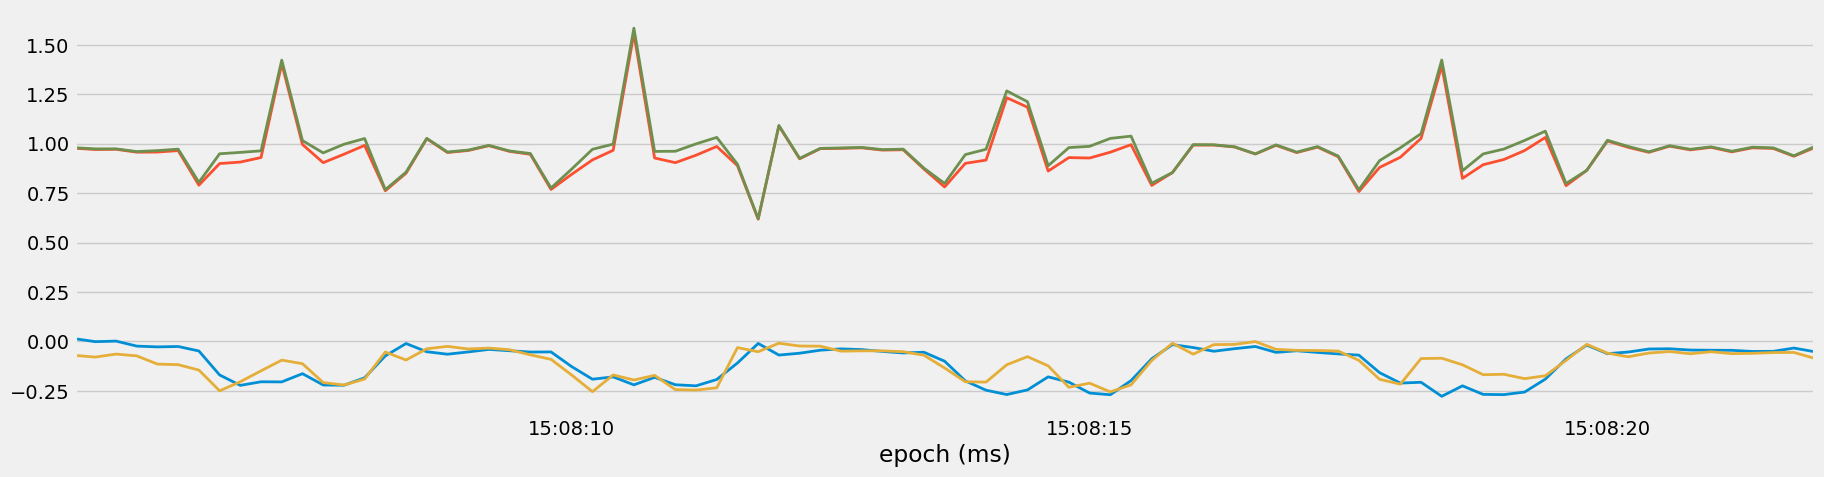

In [ ]:
plot_df = bench_df
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_x"].plot()
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_y"].plot()
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_z"].plot()
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_r"].plot()

<Axes: xlabel='epoch (ms)'>

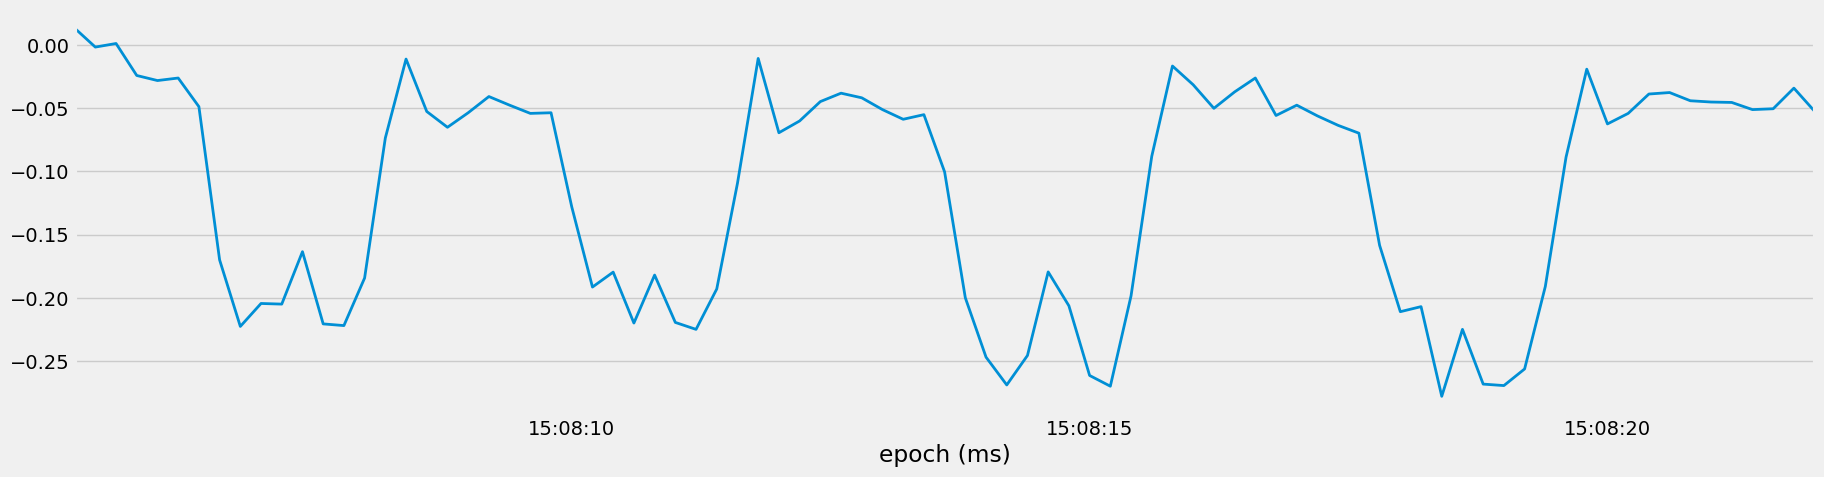

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_x"].plot()

In [ ]:
plot_df

acc_x     acc_y     acc_z     gyr_x     gyr_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.890400  2.439200   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.682600 -0.890400   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.560800 -0.256000   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.061000 -4.524400   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.439000 -1.548600   
...                           ...       ...       ...       ...       ...   
2019-01-19 17:24:41.800  0.013000  1.026667 -0.096333 -1.268400  2.841600   
2019-01-19 17:24:42.000  0.017500  0.955000 -0.075000  0.451200  0.024400   
2019-01-19 17:24:42.200  0.023667  0.964000 -0.086333  1.475600 -0.024200   
2019-01-19 17:24:42.400  0.026000  0.989000 -0.097000  2.756400 -3.121600   
2019-01-19 17:24:42.600  0.025000  0.978000 -0.092500  1.971333 -2.357667   

                          gyr_z participant  label category  set     acc_r  \
epoch (ms)                                                                   
2019-01-11 15:08:05.200  0.9388           B  bench    heavy   30  0.979669   
2019-01-11 15:08:05.400  2.1708           B  bench    heavy   30  0.973752   
2019-01-11 15:08:05.600 -1.4146           B  bench    heavy   30  0.973795   
2019-01-11 15:08:05.800 -2.0730           B  bench    heavy   30  0.960118   
2019-01-11 15:08:06.000 -3.6098           B  bench    heavy   30  0.964953   
...                         ...         ...    ...      ...  ...       ...   
2019-01-19 17:24:41.800  2.0610           E  bench   medium   71  1.031258   
2019-01-19 17:24:42.000  0.5242           E  bench   medium   71  0.958100   
2019-01-19 17:24:42.200  1.5974           E  bench   medium   71  0.968147   
2019-01-19 17:24:42.400 -0.8416           E  bench   medium   71  0.994086   
2019-01-19 17:24:42.600  1.8090           E  bench   medium   71  0.982683   

                            gyr_r  
epoch (ms)                         
2019-01-11 15:08:05.200  3.225625  
2019-01-11 15:08:05.400  2.887270  
2019-01-11 15:08:05.600  2.936720  
2019-01-11 15:08:05.800  9.473502  
2019-01-11 15:08:06.000  4.623585  
...                           ...  
2019-01-19 17:24:41.800  3.732459  
2019-01-19 17:24:42.000  0.692071  
2019-01-19 17:24:42.200  2.174780  
2019-01-19 17:24:42.400  4.248578  
2019-01-19 17:24:42.600  3.566122  

[1665 rows x 12 columns]

<Axes: xlabel='epoch (ms)'>

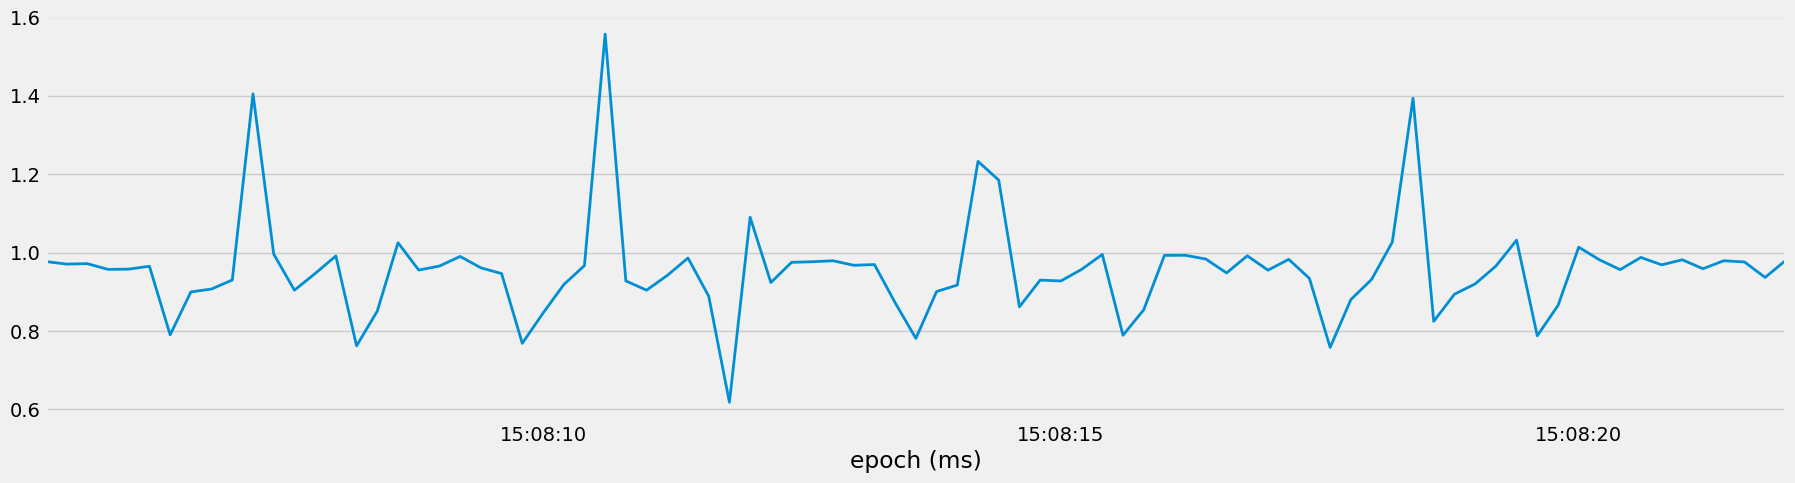

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_y"].plot()

<Axes: xlabel='epoch (ms)'>

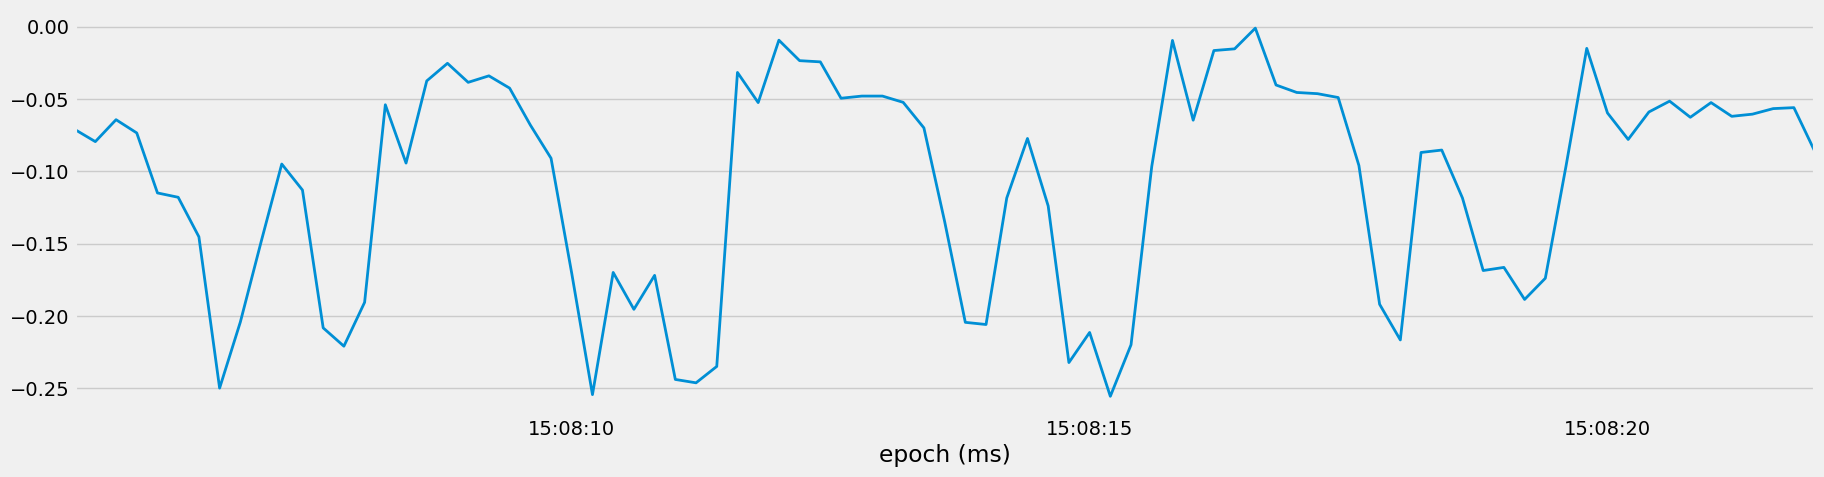

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_z"].plot()

<Axes: xlabel='epoch (ms)'>

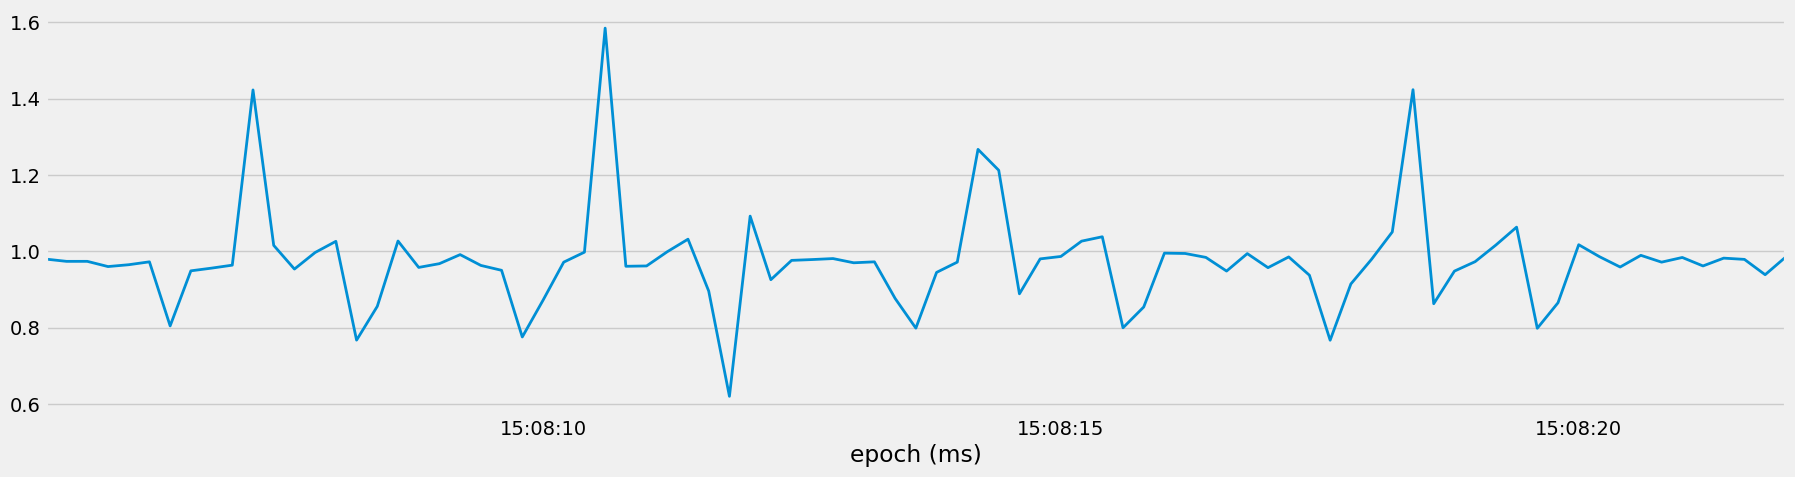

In [ ]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_r"].plot()

In [ ]:
fs = 100 /20
LowPass = LowPassFilter()

In [ ]:
bench_set = bench_df[bench_df["set"] == bench_df["set"].unique()[0]]
squat_set = squat_df[squat_df["set"] == squat_df["set"].unique()[0]]
row_set = row_df[row_df["set"] == row_df["set"].unique()[0]]
ohp_set = ohp_df[ohp_df["set"] == ohp_df["set"].unique()[0]]
dead_set = dead_df[dead_df["set"] == dead_df["set"].unique()[0]]

In [ ]:
bench_set

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-11 15:08:21.200 -0.045333  0.958667 -0.062000  0.2074 -3.4512 -0.7072   
2019-01-11 15:08:21.400 -0.051000  0.979000 -0.060500  1.5732 -2.0366  0.3170   
2019-01-11 15:08:21.600 -0.050333  0.976000 -0.056667  0.2076 -2.8660  0.9756   
2019-01-11 15:08:21.800 -0.034000  0.936500 -0.056000  5.5122 -2.3780  0.3904   
2019-01-11 15:08:22.000 -0.052333  0.980333 -0.086000 -1.8782 -1.6706  0.1584   

                        participant  label category  set     acc_r     gyr_r  
epoch (ms)                                                                    
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625  
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270  
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720  
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502  
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585  
...                             ...    ...      ...  ...       ...       ...  
2019-01-11 15:08:21.200           B  bench    heavy   30  0.961738  3.529012  
2019-01-11 15:08:21.400           B  bench    heavy   30  0.982193  2.592911  
2019-01-11 15:08:21.600           B  bench    heavy   30  0.978938  3.034609  
2019-01-11 15:08:21.800           B  bench    heavy   30  0.938789  6.015949  
2019-01-11 15:08:22.000           B  bench    heavy   30  0.985489  2.518656  

[85 rows x 12 columns]

In [ ]:
squat_set

acc_x     acc_y     acc_z    gyr_x    gyr_y  \
epoch (ms)                                                                
2019-01-11 16:05:44.600  0.135333  0.694667  0.735333   2.5366  -0.6220   
2019-01-11 16:05:44.800  0.097500  0.651500  0.658000   2.0854   0.0366   
2019-01-11 16:05:45.000  0.148667  0.719667  0.694333  -0.0364   1.2562   
2019-01-11 16:05:45.200  0.138000  0.692000  0.632000   5.9878  -4.5734   
2019-01-11 16:05:45.400  0.131667  0.716000  0.658000  -4.1586  -2.9636   
...                           ...       ...       ...      ...      ...   
2019-01-11 16:05:59.800  0.185333  0.694667  0.853667   2.7318   6.5366   
2019-01-11 16:06:00.000  0.172500  0.694500  0.824000  12.2806   1.1708   
2019-01-11 16:06:00.200  0.173667  0.760333  0.806667  24.5852   6.8902   
2019-01-11 16:06:00.400  0.088500  0.489500  0.436000  30.9636   0.4634   
2019-01-11 16:06:00.600  0.086500  0.323500  0.281000 -20.2745  25.8540   

                           gyr_z participant  label category  set     acc_r  \
epoch (ms)                                                                    
2019-01-11 16:05:44.600   1.6098           A  squat   medium   27  1.020584   
2019-01-11 16:05:44.800   0.1952           A  squat   medium   27  0.931087   
2019-01-11 16:05:45.000   0.0242           A  squat   medium   27  1.011000   
2019-01-11 16:05:45.200   1.0976           A  squat   medium   27  0.947276   
2019-01-11 16:05:45.400  -0.5852           A  squat   medium   27  0.981303   
...                          ...         ...    ...      ...  ...       ...   
2019-01-11 16:05:59.800   4.4998           A  squat   medium   27  1.116090   
2019-01-11 16:06:00.000   3.1710           A  squat   medium   27  1.091358   
2019-01-11 16:06:00.200   4.1584           A  squat   medium   27  1.122042   
2019-01-11 16:06:00.400  -8.5486           A  squat   medium   27  0.661467   
2019-01-11 16:06:00.600  10.7315           A  squat   medium   27  0.437145   

                             gyr_r  
epoch (ms)                          
2019-01-11 16:05:44.600   3.068009  
2019-01-11 16:05:44.800   2.094835  
2019-01-11 16:05:45.000   1.256960  
2019-01-11 16:05:45.200   7.614096  
2019-01-11 16:05:45.400   5.139975  
...                            ...  
2019-01-11 16:05:59.800   8.392739  
2019-01-11 16:06:00.000  12.737313  
2019-01-11 16:06:00.200  25.868885  
2019-01-11 16:06:00.400  32.125346  
2019-01-11 16:06:00.600  34.563706  

[81 rows x 12 columns]

In [ ]:
row_set

acc_x     acc_y     acc_z    gyr_x     gyr_y  \
epoch (ms)                                                                 
2019-01-14 14:01:40.000 -0.037000 -0.854000  0.271000 -31.8172 -1.683000   
2019-01-14 14:01:40.200 -0.042500 -0.884000  0.174000 -56.3416 -8.317200   
2019-01-14 14:01:40.400 -0.008333 -0.967667  0.030333 -31.4388 -3.073200   
2019-01-14 14:01:40.600 -0.018500 -1.046500 -0.042500  -4.5244 -4.963200   
2019-01-14 14:01:40.800 -0.031000 -1.098667 -0.062333   7.7318  1.963400   
...                           ...       ...       ...      ...       ...   
2019-01-14 14:01:54.800 -0.063000 -1.138000 -0.129333  -1.0244  1.927000   
2019-01-14 14:01:55.000 -0.046500 -1.150500 -0.147500  -5.9512 -7.097400   
2019-01-14 14:01:55.200 -0.060333 -1.095667 -0.107000  -5.8416 -8.951400   
2019-01-14 14:01:55.400 -0.061000 -1.028000 -0.118500  -5.0242  1.524400   
2019-01-14 14:01:55.600 -0.071000 -0.991000 -0.125000  -6.6260  5.040667   

                          gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                  
2019-01-14 14:01:40.000 -6.3660           C   row   medium   51  0.896731   
2019-01-14 14:01:40.200 -9.9388           C   row   medium   51  0.901964   
2019-01-14 14:01:40.400  0.9266           C   row   medium   51  0.968178   
2019-01-14 14:01:40.600  1.3536           C   row   medium   51  1.047526   
2019-01-14 14:01:40.800  4.4878           C   row   medium   51  1.100870   
...                         ...         ...   ...      ...  ...       ...   
2019-01-14 14:01:54.800 -0.2194           C   row   medium   51  1.147057   
2019-01-14 14:01:55.000  0.7318           C   row   medium   51  1.160848   
2019-01-14 14:01:55.200 -0.7438           C   row   medium   51  1.102531   
2019-01-14 14:01:55.400  0.5366           C   row   medium   51  1.036604   
2019-01-14 14:01:55.600  5.7110           C   row   medium   51  1.001373   

                             gyr_r  
epoch (ms)                          
2019-01-14 14:01:40.000  32.491424  
2019-01-14 14:01:40.200  57.812900  
2019-01-14 14:01:40.400  31.602236  
2019-01-14 14:01:40.600   6.850969  
2019-01-14 14:01:40.800   9.152924  
...                            ...  
2019-01-14 14:01:54.800   2.193367  
2019-01-14 14:01:55.000   9.291146  
2019-01-14 14:01:55.200  10.714714  
2019-01-14 14:01:55.400   5.277719  
2019-01-14 14:01:55.600  10.095926  

[79 rows x 12 columns]

In [ ]:
ohp_set

acc_x     acc_y     acc_z      gyr_x      gyr_y  \
epoch (ms)                                                                    
2019-01-11 15:38:55.000 -0.062500  0.901000  0.047000   0.439000  -6.500000   
2019-01-11 15:38:55.200 -0.080667  1.080667  0.060333   5.597600  -3.219600   
2019-01-11 15:38:55.400 -0.137500  1.314000  0.024000  20.853400   7.756200   
2019-01-11 15:38:55.600 -0.234667  0.910333 -0.007000  17.768400  11.488000   
2019-01-11 15:38:55.800 -0.337000  0.861000 -0.095500   2.377800   2.268200   
...                           ...       ...       ...        ...        ...   
2019-01-11 15:39:09.200 -0.062333  1.201000 -0.006000 -13.475600   0.841400   
2019-01-11 15:39:09.400  0.022500  1.036500  0.028500   3.097400  -2.256000   
2019-01-11 15:39:09.600  0.000000  0.953667  0.022333  -4.634200  -4.353600   
2019-01-11 15:39:09.800 -0.011000  0.986500  0.056500  -1.329200  -3.707400   
2019-01-11 15:39:10.000 -0.039000  0.977000  0.068000  -7.215333  -3.922667   

                             gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                     
2019-01-11 15:38:55.000  -0.085400           A   ohp    heavy    9  0.904387   
2019-01-11 15:38:55.200  -1.426600           A   ohp    heavy    9  1.085351   
2019-01-11 15:38:55.400 -44.134000           A   ohp    heavy    9  1.321393   
2019-01-11 15:38:55.600 -35.000200           A   ohp    heavy    9  0.940119   
2019-01-11 15:38:55.800  -4.622000           A   ohp    heavy    9  0.929522   
...                            ...         ...   ...      ...  ...       ...   
2019-01-11 15:39:09.200  27.244000           A   ohp    heavy    9  1.202631   
2019-01-11 15:39:09.400  -3.670600           A   ohp    heavy    9  1.037136   
2019-01-11 15:39:09.600  -3.378200           A   ohp    heavy    9  0.953928   
2019-01-11 15:39:09.800  -5.122000           A   ohp    heavy    9  0.988178   
2019-01-11 15:39:10.000  -9.390333           A   ohp    heavy    9  0.980140   

                             gyr_r  
epoch (ms)                          
2019-01-11 15:38:55.000   6.515368  
2019-01-11 15:38:55.200   6.613179  
2019-01-11 15:38:55.400  49.425023  
2019-01-11 15:38:55.600  40.898706  
2019-01-11 15:38:55.800   5.671115  
...                            ...  
2019-01-11 15:39:09.200  30.406172  
2019-01-11 15:39:09.400   5.306291  
2019-01-11 15:39:09.600   7.200130  
2019-01-11 15:39:09.800   6.461151  
2019-01-11 15:39:10.000  12.475043  

[76 rows x 12 columns]

In [ ]:
dead_set

acc_x     acc_y     acc_z      gyr_x    gyr_y  \
epoch (ms)                                                                  
2019-01-11 16:24:24.800  0.056500 -1.027000 -0.165500   3.231667  -2.6830   
2019-01-11 16:24:25.000  0.073333 -1.025000 -0.155333  12.853600 -30.9024   
2019-01-11 16:24:25.200  0.059000 -1.022000 -0.125500   2.073200  -1.2316   
2019-01-11 16:24:25.400  0.030667 -1.031667 -0.114667  -0.329600   3.1098   
2019-01-11 16:24:25.600  0.046500 -1.025500 -0.124500  -0.975600   9.7682   
...                           ...       ...       ...        ...      ...   
2019-01-11 16:24:54.800  0.039000 -1.337500 -0.105500 -19.000000  18.5000   
2019-01-11 16:24:55.000  0.081667 -1.006000 -0.094667 -15.719600  24.2926   
2019-01-11 16:24:55.200  0.033500 -1.052000 -0.185000  -0.060800  -4.8294   
2019-01-11 16:24:55.400 -0.003000 -1.019333 -0.176333   0.951000   5.3048   
2019-01-11 16:24:55.600  0.010000 -1.018500 -0.172000  -3.439200  -1.7560   

                             gyr_z participant label category  set     acc_r  \
epoch (ms)                                                                     
2019-01-11 16:24:24.800   2.418667           A  dead   medium    6  1.041783   
2019-01-11 16:24:25.000   4.487800           A  dead   medium    6  1.039294   
2019-01-11 16:24:25.200   3.170800           A  dead   medium    6  1.031366   
2019-01-11 16:24:25.400   1.817000           A  dead   medium    6  1.038472   
2019-01-11 16:24:25.600  -2.219400           A  dead   medium    6  1.034076   
...                            ...         ...   ...      ...  ...       ...   
2019-01-11 16:24:54.800  -3.829400           A  dead   medium    6  1.342221   
2019-01-11 16:24:55.000  13.695200           A  dead   medium    6  1.013739   
2019-01-11 16:24:55.200   7.317200           A  dead   medium    6  1.068668   
2019-01-11 16:24:55.400   3.670600           A  dead   medium    6  1.034477   
2019-01-11 16:24:55.600   2.768200           A  dead   medium    6  1.032970   

                             gyr_r  
epoch (ms)                          
2019-01-11 16:24:24.800   4.846866  
2019-01-11 16:24:25.000  33.768531  
2019-01-11 16:24:25.200   3.983588  
2019-01-11 16:24:25.400   3.616764  
2019-01-11 16:24:25.600  10.064555  
...                            ...  
2019-01-11 16:24:54.800  26.793923  
2019-01-11 16:24:55.000  32.012415  
2019-01-11 16:24:55.200   8.767452  
2019-01-11 16:24:55.400   6.520629  
2019-01-11 16:24:55.600   4.751270  

[144 rows x 12 columns]

<Axes: xlabel='epoch (ms)'>

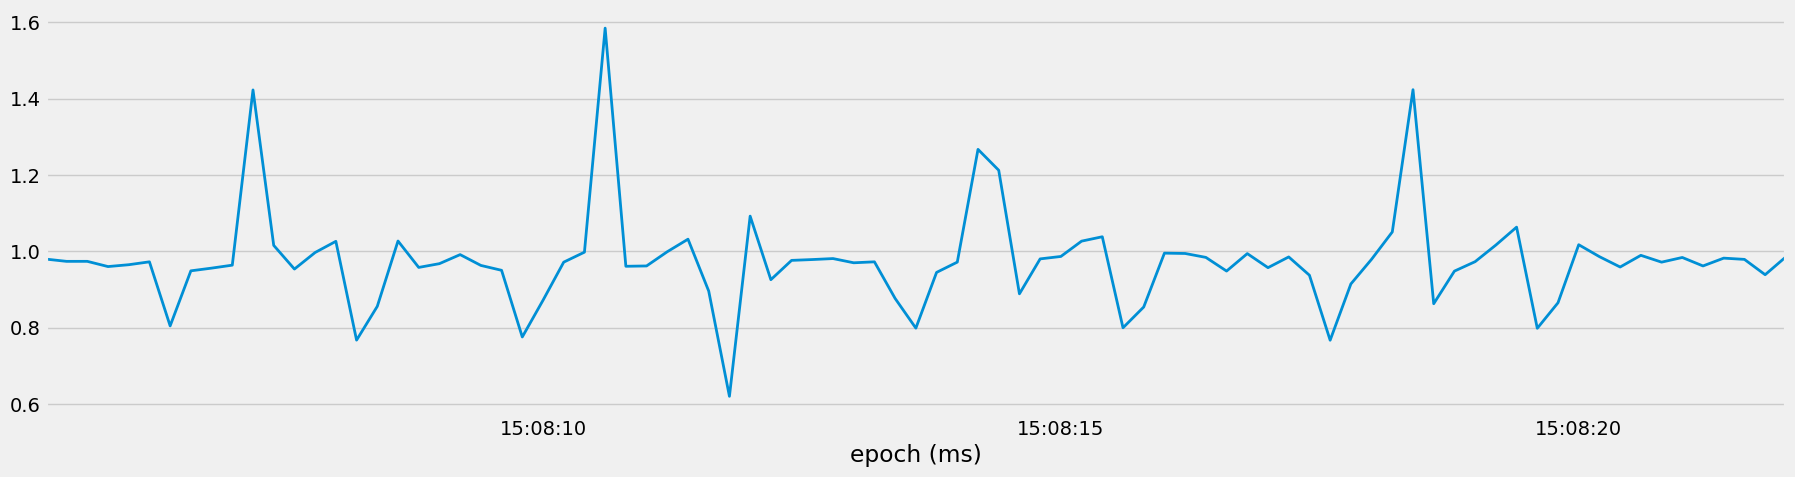

In [ ]:
bench_set["acc_r"].plot()

In [ ]:
column = "acc_r"
LowPass.low_pass_filter(bench_set,col = column,sampling_frequency=fs,cutoff_frequency=0.4,order=5)

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-11 15:08:21.200 -0.045333  0.958667 -0.062000  0.2074 -3.4512 -0.7072   
2019-01-11 15:08:21.400 -0.051000  0.979000 -0.060500  1.5732 -2.0366  0.3170   
2019-01-11 15:08:21.600 -0.050333  0.976000 -0.056667  0.2076 -2.8660  0.9756   
2019-01-11 15:08:21.800 -0.034000  0.936500 -0.056000  5.5122 -2.3780  0.3904   
2019-01-11 15:08:22.000 -0.052333  0.980333 -0.086000 -1.8782 -1.6706  0.1584   

                        participant  label category  set     acc_r     gyr_r  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625   
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270   
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720   
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502   
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585   
...                             ...    ...      ...  ...       ...       ...   
2019-01-11 15:08:21.200           B  bench    heavy   30  0.961738  3.529012   
2019-01-11 15:08:21.400           B  bench    heavy   30  0.982193  2.592911   
2019-01-11 15:08:21.600           B  bench    heavy   30  0.978938  3.034609   
2019-01-11 15:08:21.800           B  bench    heavy   30  0.938789  6.015949   
2019-01-11 15:08:22.000           B  bench    heavy   30  0.985489  2.518656   

                         acc_r_lowpass  
epoch (ms)                              
2019-01-11 15:08:05.200       0.981060  
2019-01-11 15:08:05.400       0.961606  
2019-01-11 15:08:05.600       0.945699  
2019-01-11 15:08:05.800       0.936613  
2019-01-11 15:08:06.000       0.936412  
...                                ...  
2019-01-11 15:08:21.200       0.980293  
2019-01-11 15:08:21.400       0.983985  
2019-01-11 15:08:21.600       0.986107  
2019-01-11 15:08:21.800       0.987137  
2019-01-11 15:08:22.000       0.987620  

[85 rows x 13 columns]

<Axes: xlabel='epoch (ms)'>

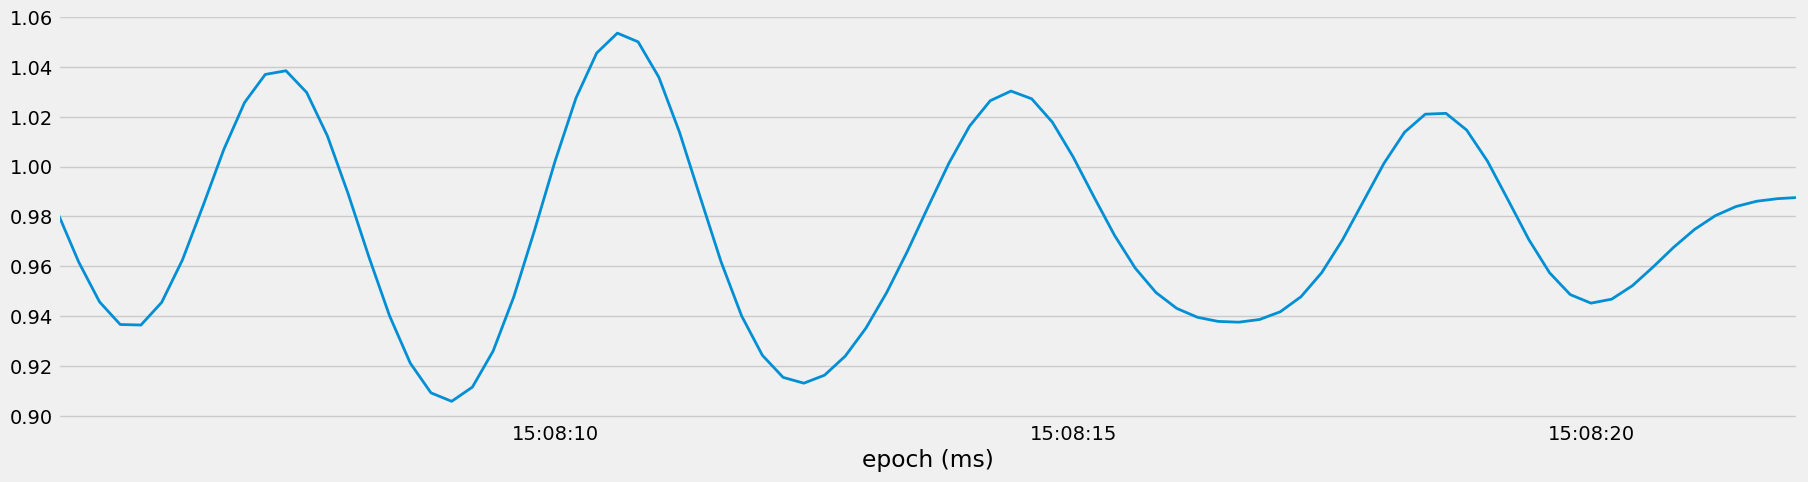

In [ ]:
column = "acc_r"
LowPass.low_pass_filter(bench_set,col = column,sampling_frequency=fs,cutoff_frequency=0.4,order=5)[column + "_lowpass"].plot()

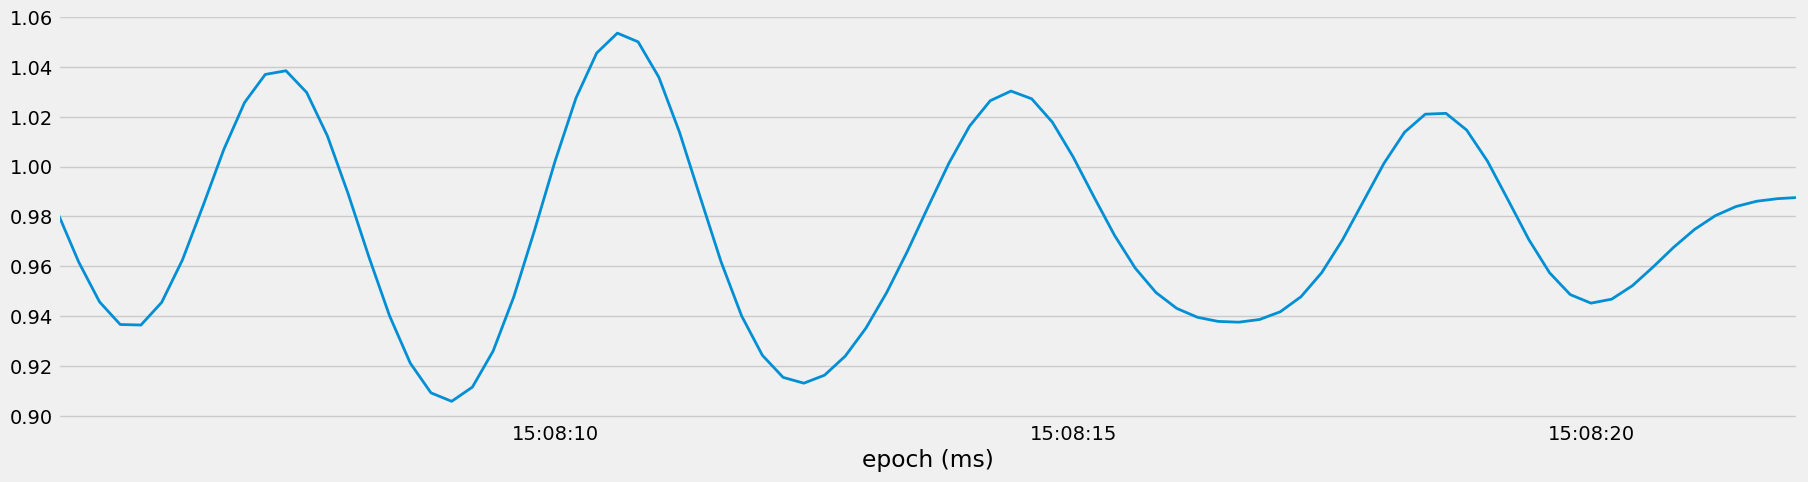

In [ ]:
column = "acc_r"
data = LowPass.low_pass_filter(bench_set,col = column,sampling_frequency=fs,cutoff_frequency=0.4,order=5)[column + "_lowpass"].plot()

In [ ]:
argrelextrema(bench_set["acc_r"].values ,np.greater)

(array([ 2,  5, 10, 14, 17, 20, 27, 31, 34, 38, 40, 45, 51, 54, 58, 60, 66,
        71, 74, 77, 79, 81]),)

In [ ]:
column = "acc_r"
data = LowPass.low_pass_filter(bench_set,col = column,sampling_frequency=fs,cutoff_frequency=0.4,order=5)


argrelextrema(data[column + "_lowpass"].values ,np.greater)

(array([11, 27, 46, 67]),)

In [ ]:
argrelextrema(data[column + "_lowpass"].values ,np.greater)

(array([11, 27, 46, 67]),)

In [ ]:
column = "acc_r"
data = LowPass.low_pass_filter(bench_set,col = column,sampling_frequency=fs,cutoff_frequency=0.4,order=10)


argrelextrema(data[column + "_lowpass"].values ,np.greater)

(array([11, 27, 46, 66, 82]),)

In [ ]:
indexes = argrelextrema(data[column + "_lowpass"].values ,np.greater)
peaks = df.iloc[indexes]

In [ ]:
def count_reps(dataset,cutoff = 0.4 ,order=10 , column = "acc_r"):
    data = LowPass.low_pass_filter(dataset,col = column,sampling_frequency=fs,cutoff_frequency=cutoff,order=order)
    indexes = argrelextrema(data[column + "_lowpass"].values ,np.greater)
    peaks = data.iloc[indexes]

    return len(peaks)


count_reps(squat_set)

6

In [ ]:
def count_reps(dataset,cutoff = 0.4 ,order=10 , column = "acc_r"):
    data = LowPass.low_pass_filter(dataset,col = column,sampling_frequency=fs,cutoff_frequency=cutoff,order=order)
    indexes = argrelextrema(data[column + "_lowpass"].values ,np.greater)
    peaks = data.iloc[indexes]

    fig,ax = plt.subplots()
    plt.plot(dataset[f"{column}_lowpass"])
    plt.plot(peaks[f"{column}_lowpass"],"o",color = "red")
    #ax.set_y_label(f"{column}_lowpass")
    exercise = dataset["label"].iloc[0].title()
    category = dataset["category"].iloc[0].title()
    plt.title(f"{exercise} {category} : {len(peaks)} Reps")
    plt.show()

    return len(peaks)

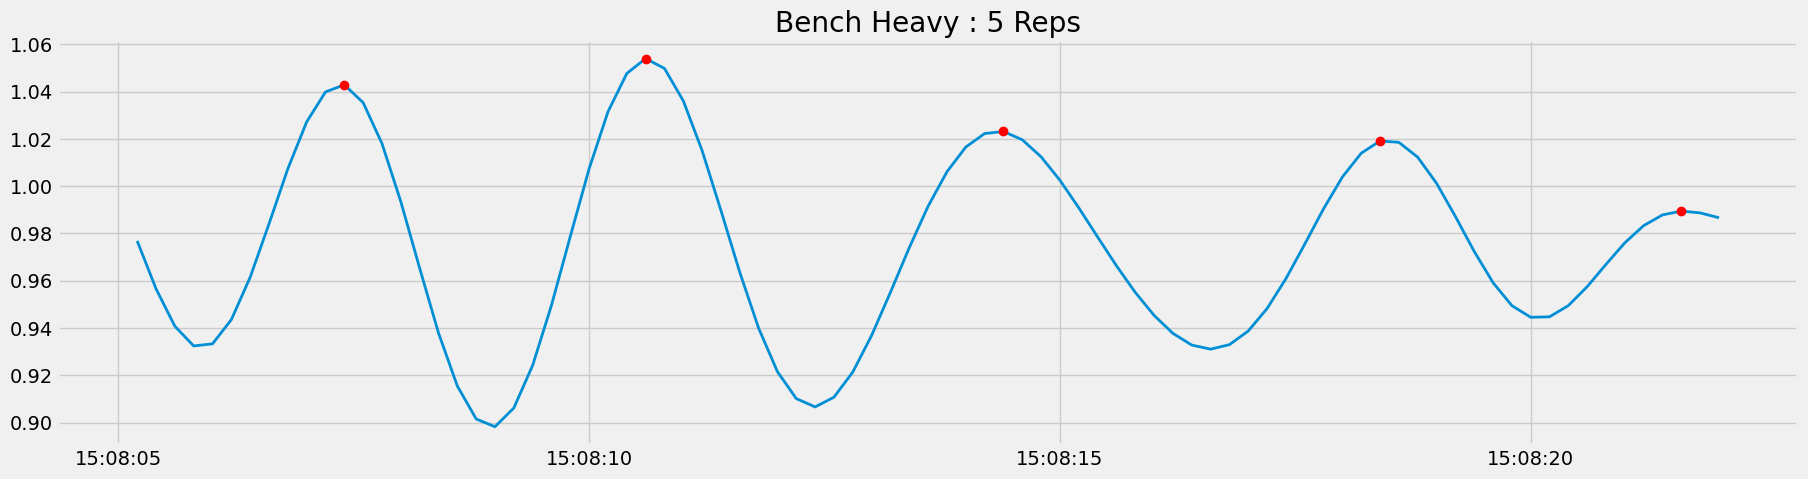

5

In [ ]:
count_reps(bench_set)

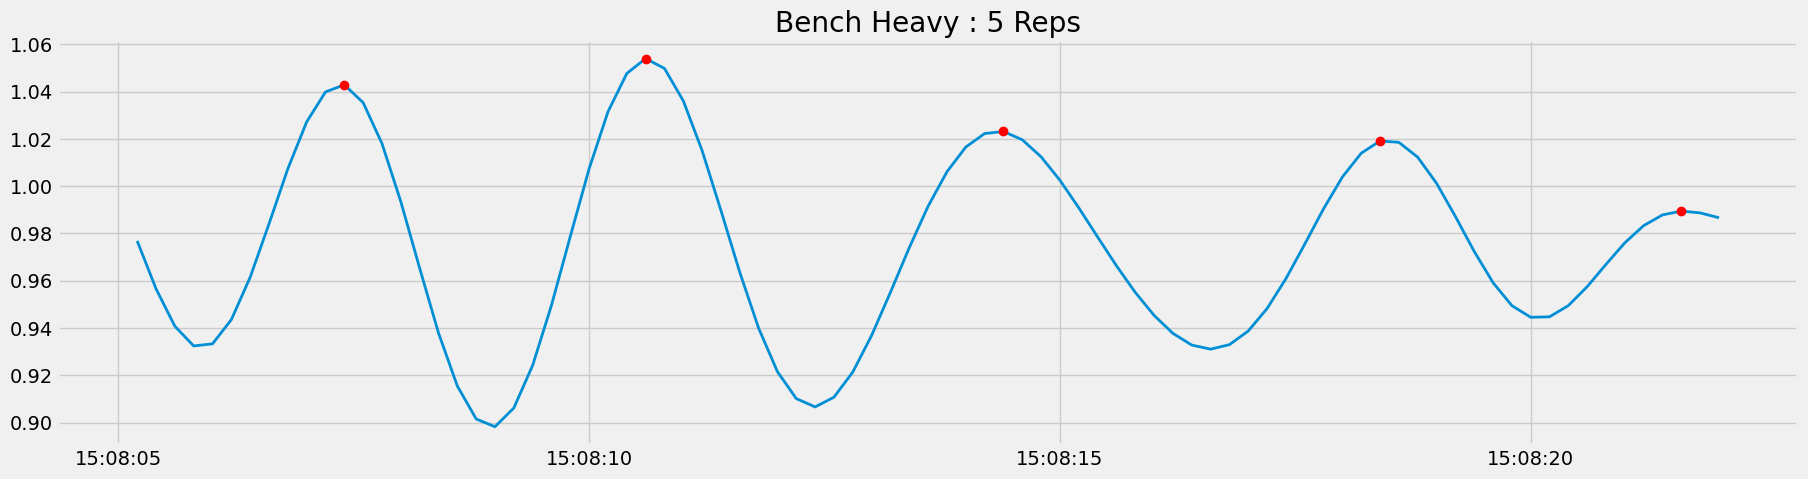

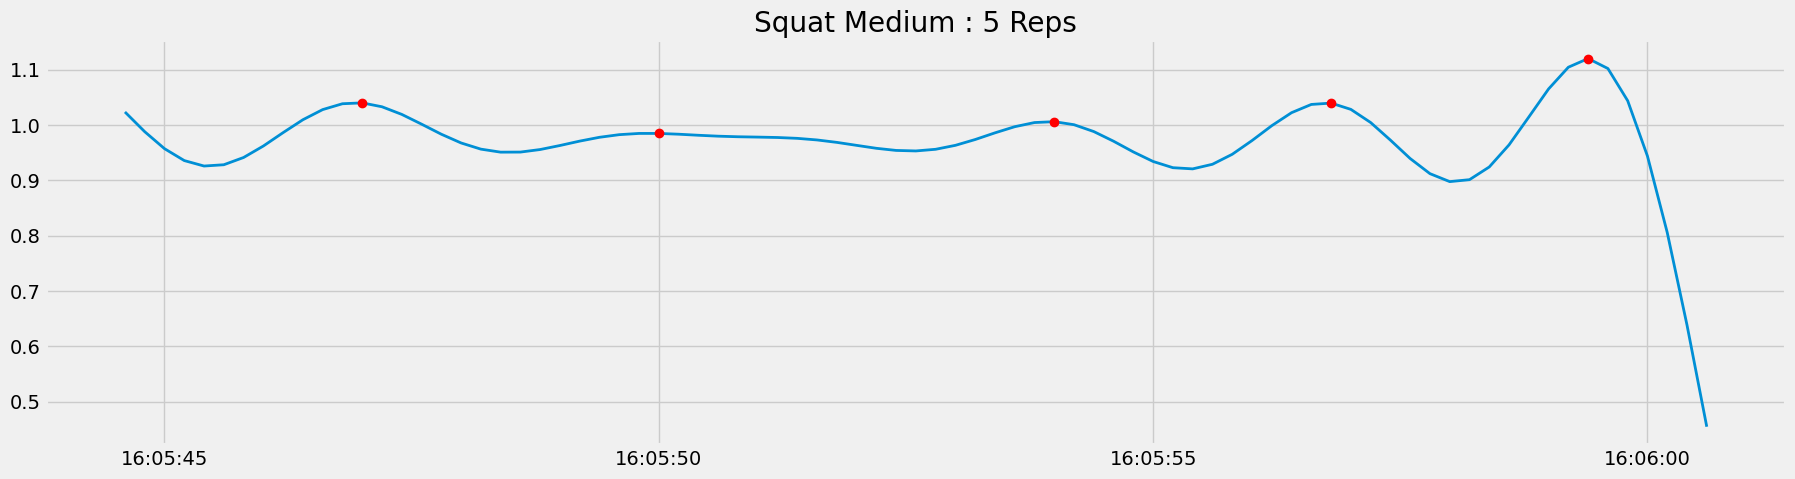

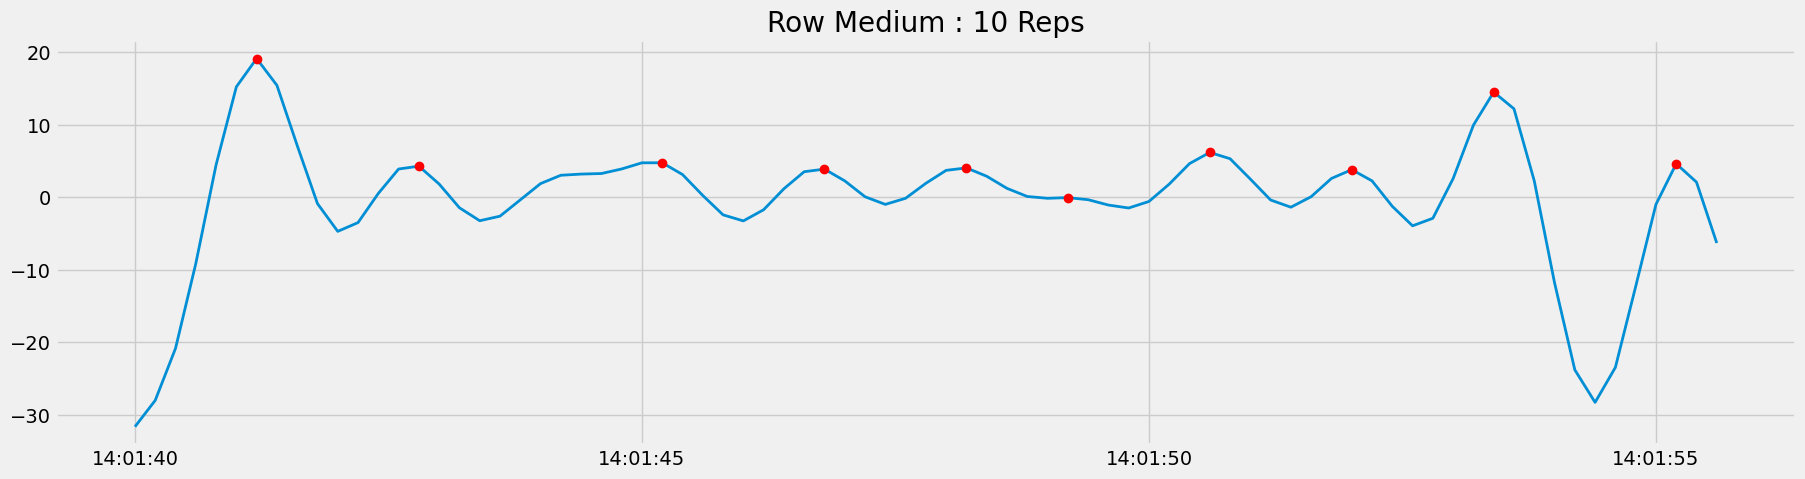

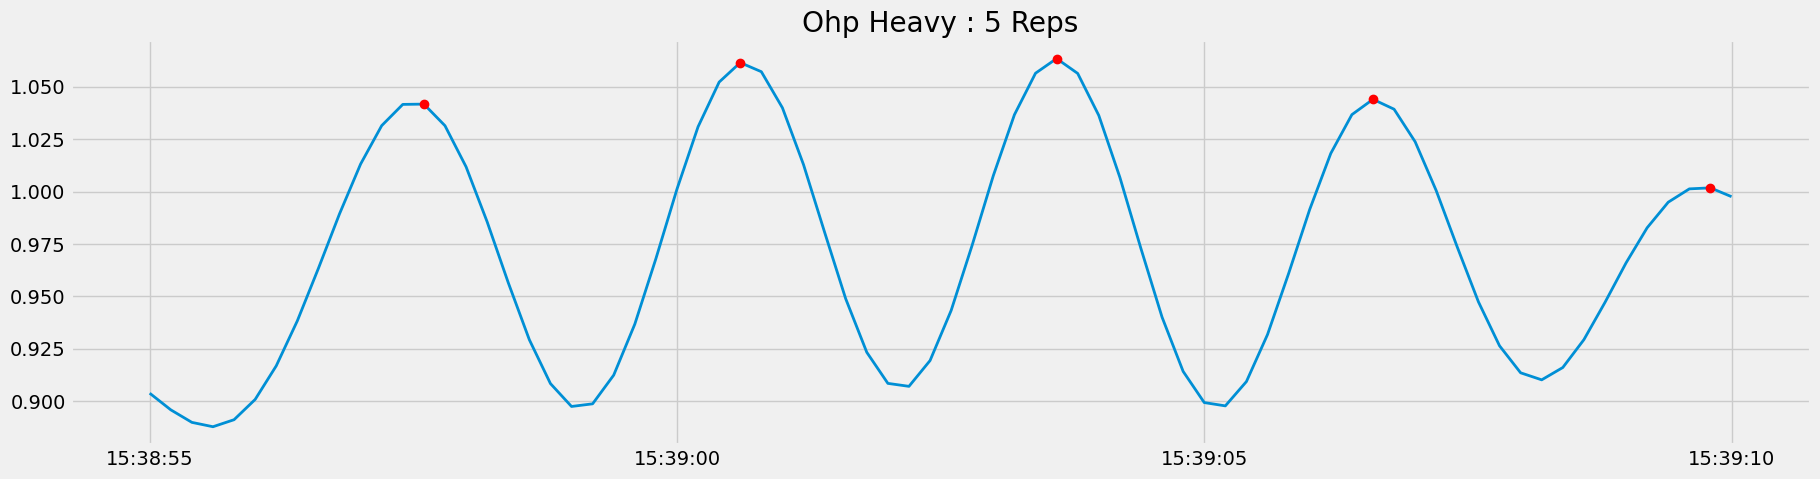

TypeError: count_reps() got an unexpected keyword argument 'cuttoff'

In [ ]:
count_reps(bench_set, cutoff =0.4)
count_reps(squat_set,cutoff=0.35)
count_reps(row_set,cutoff = 0.65 , column ="gyr_x")
count_reps(ohp_set,cutoff = 0.35)
count_reps(dead_set, cuttoff =0.4)

In [ ]:
df["reps"] = df["category"].apply(lambda x:5 if x == "heavy" else 10)
rep_df = df.groupby(["label","category","set"])["reps"].max().reset_index()

In [ ]:
rep_df

label category  set  reps
0   bench    heavy    1     5
1   bench    heavy    2     5
2   bench    heavy    3     5
3   bench    heavy    4     5
4   bench    heavy   30     5
..    ...      ...  ...   ...
80  squat   medium   28    10
81  squat   medium   29    10
82  squat   medium   38    10
83  squat   medium   63    10
84  squat   medium   64    10

[85 rows x 4 columns]

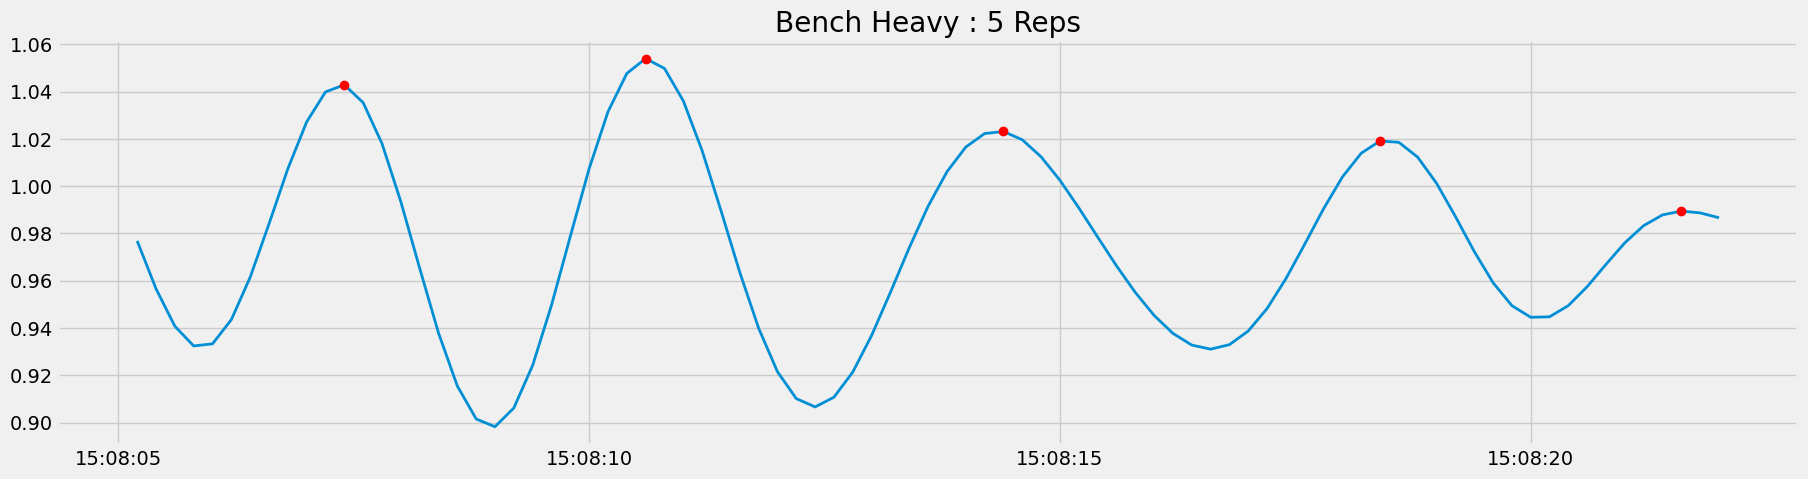

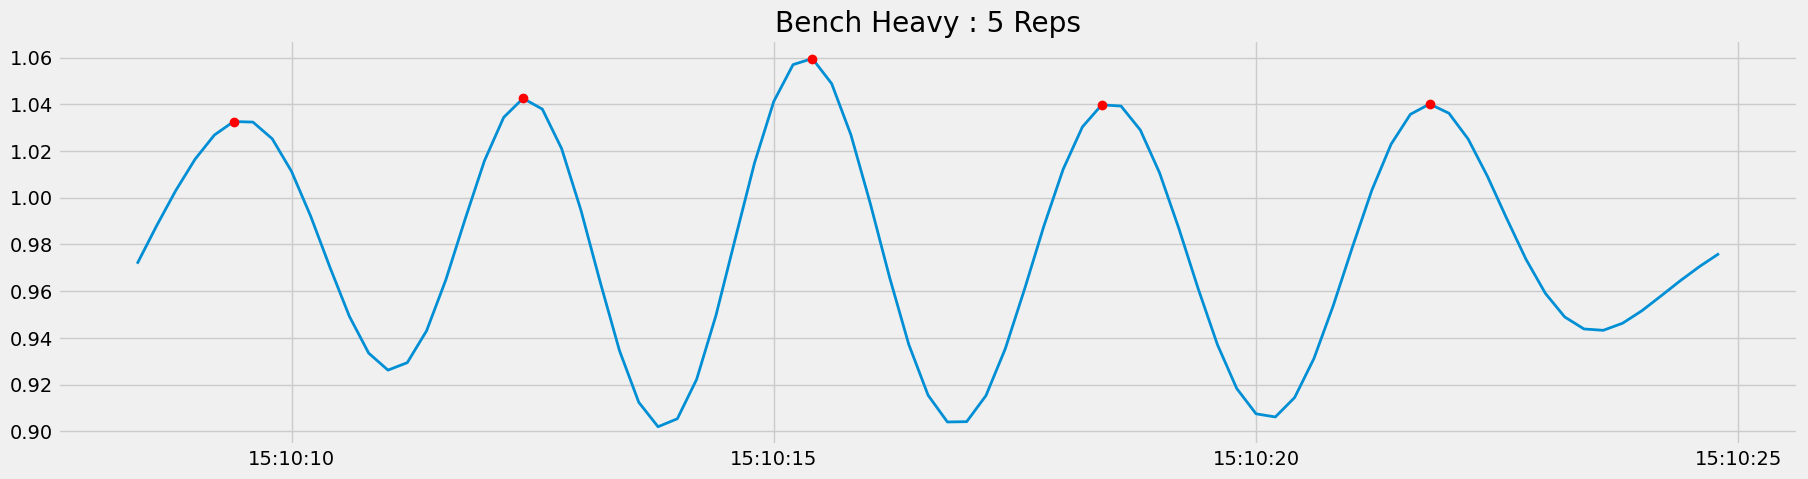

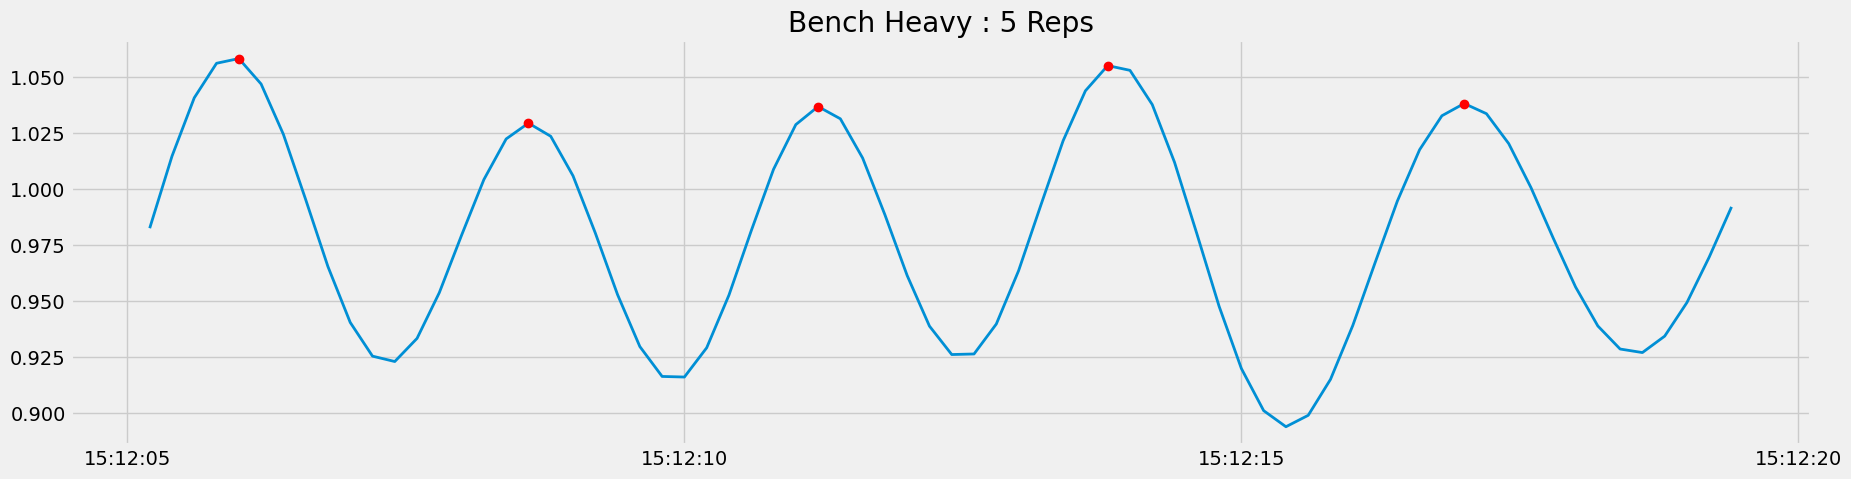

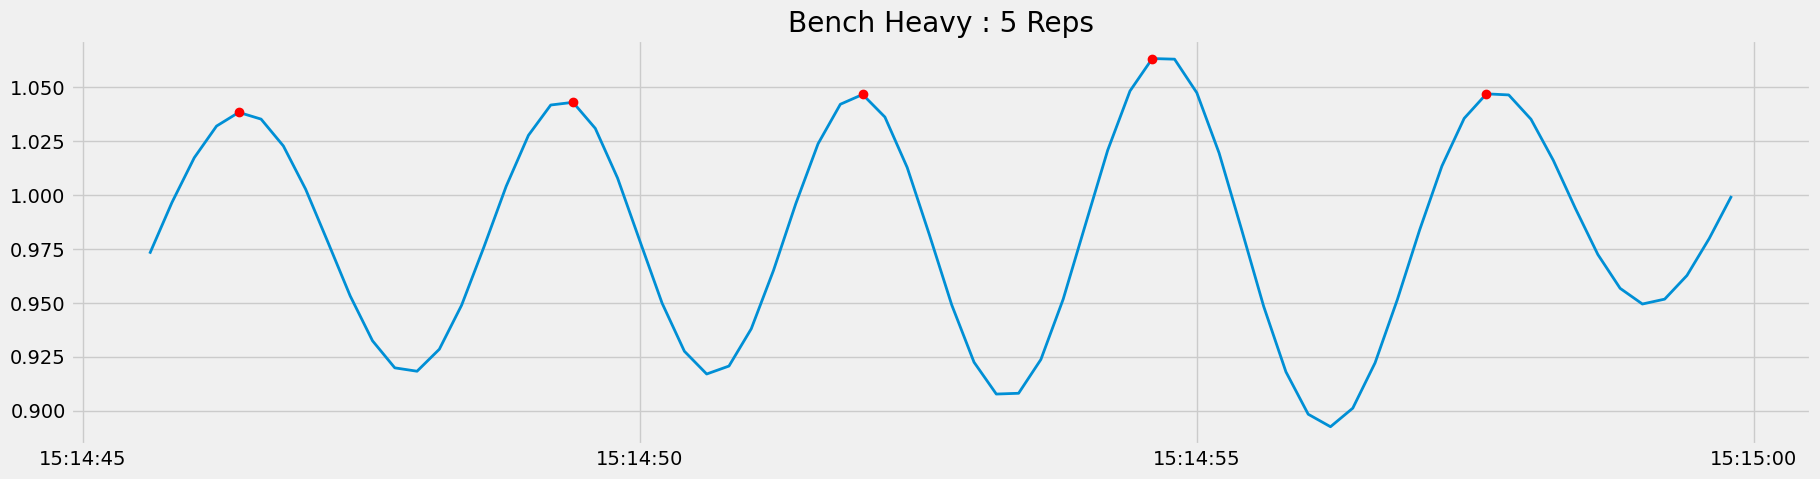

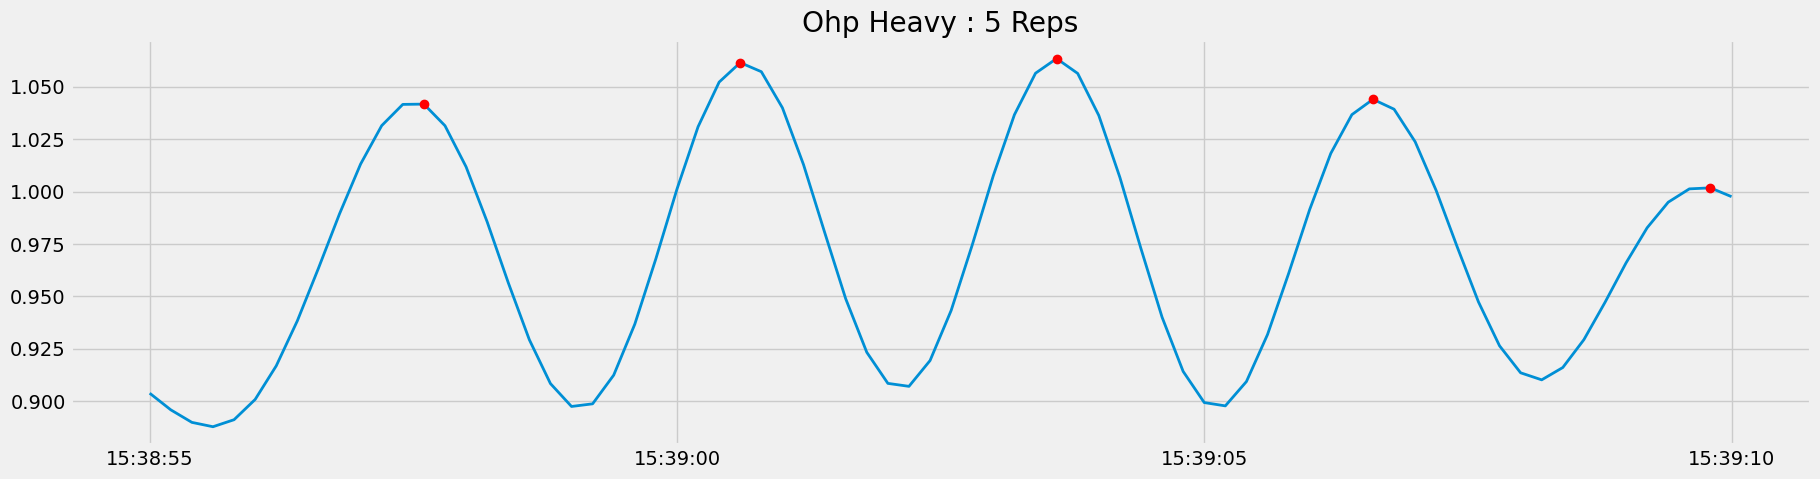

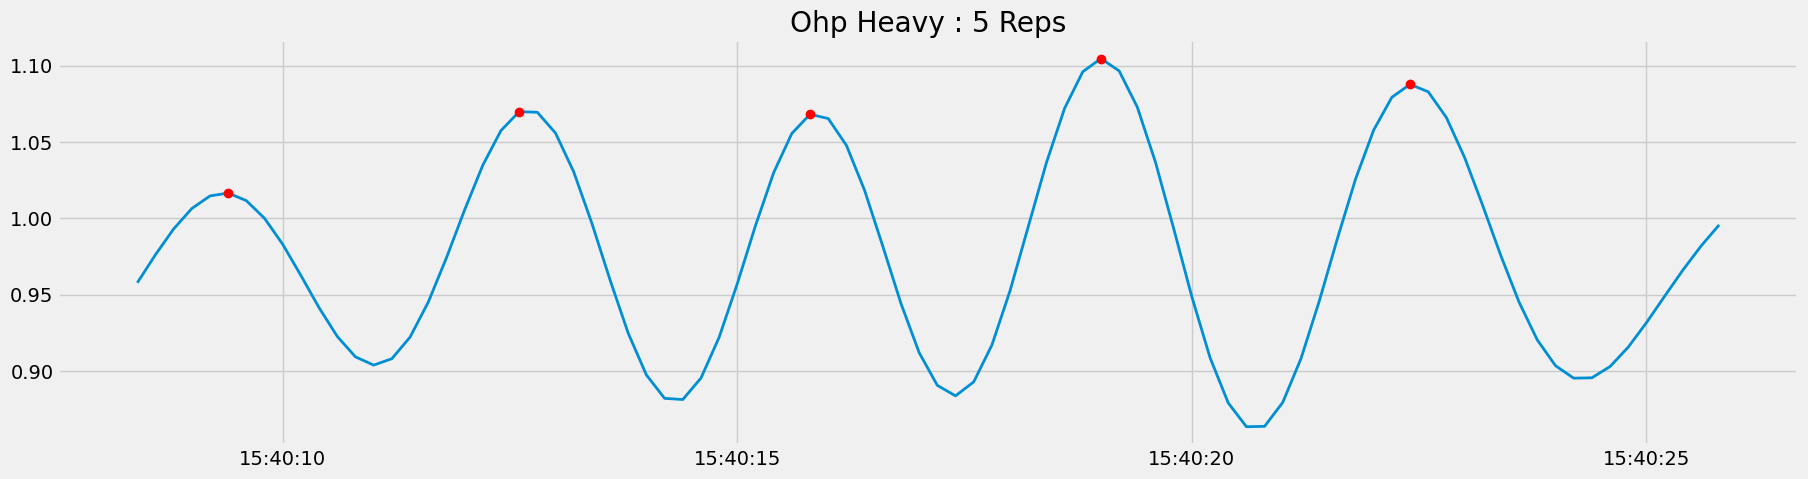

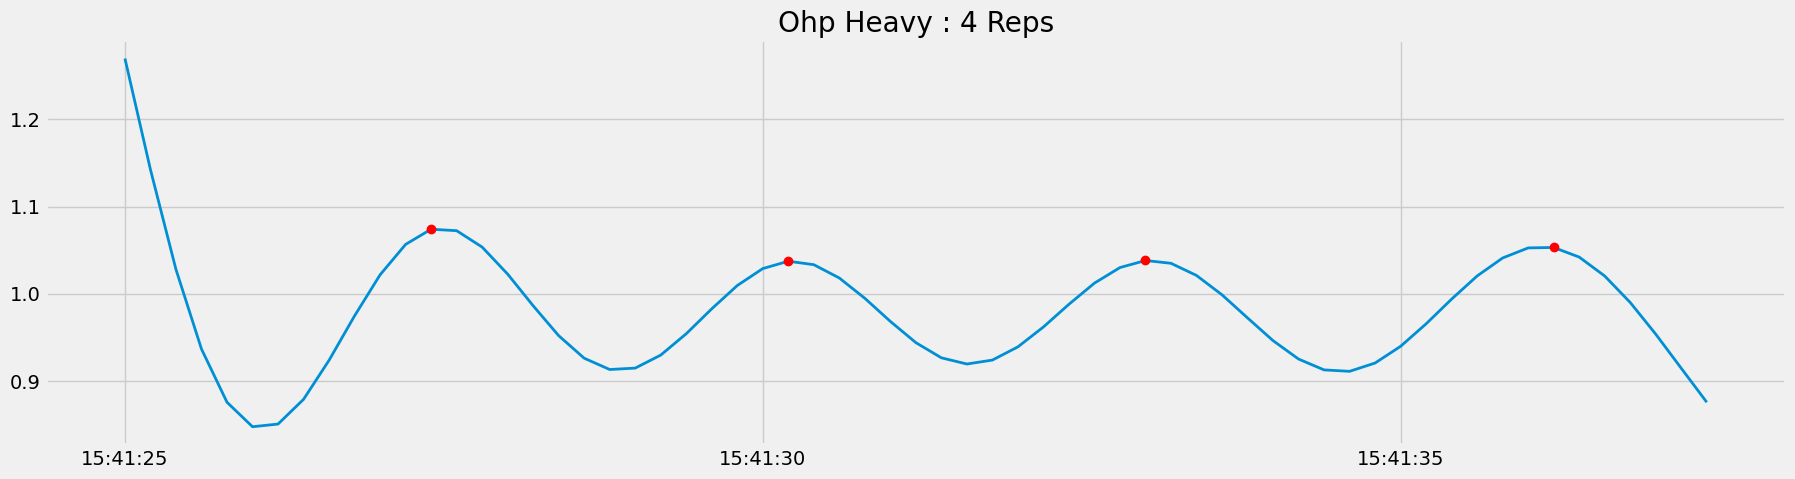

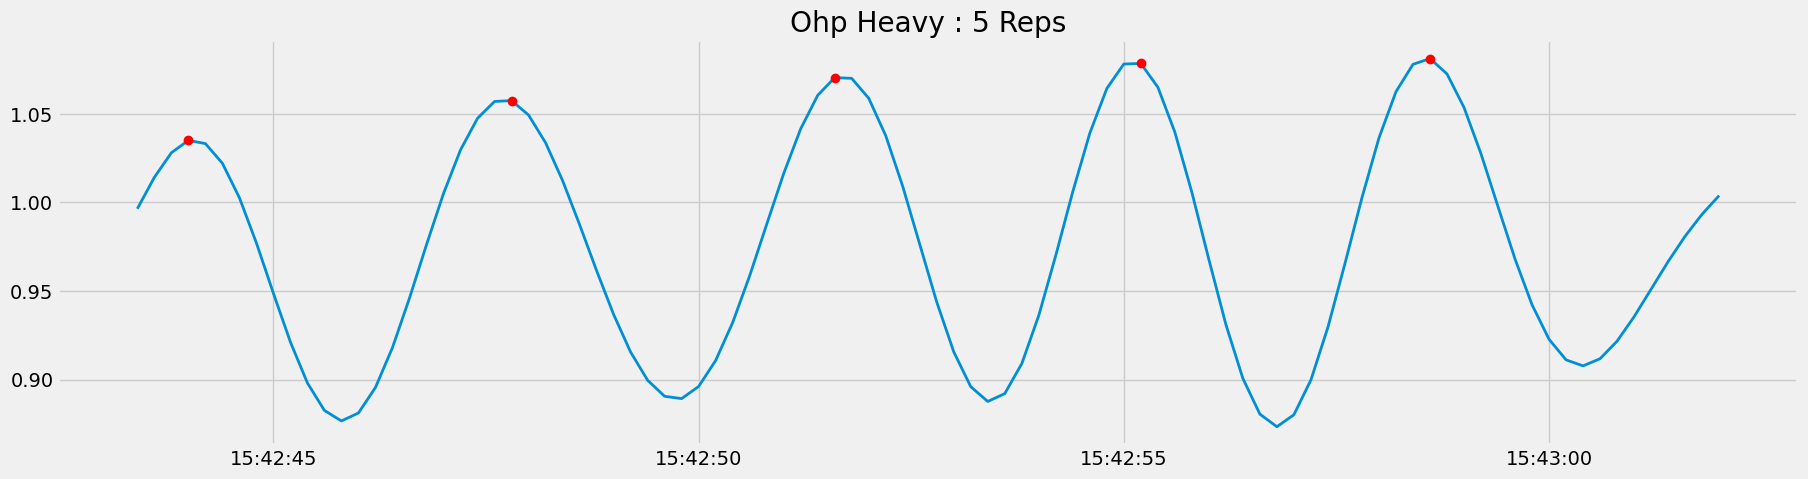

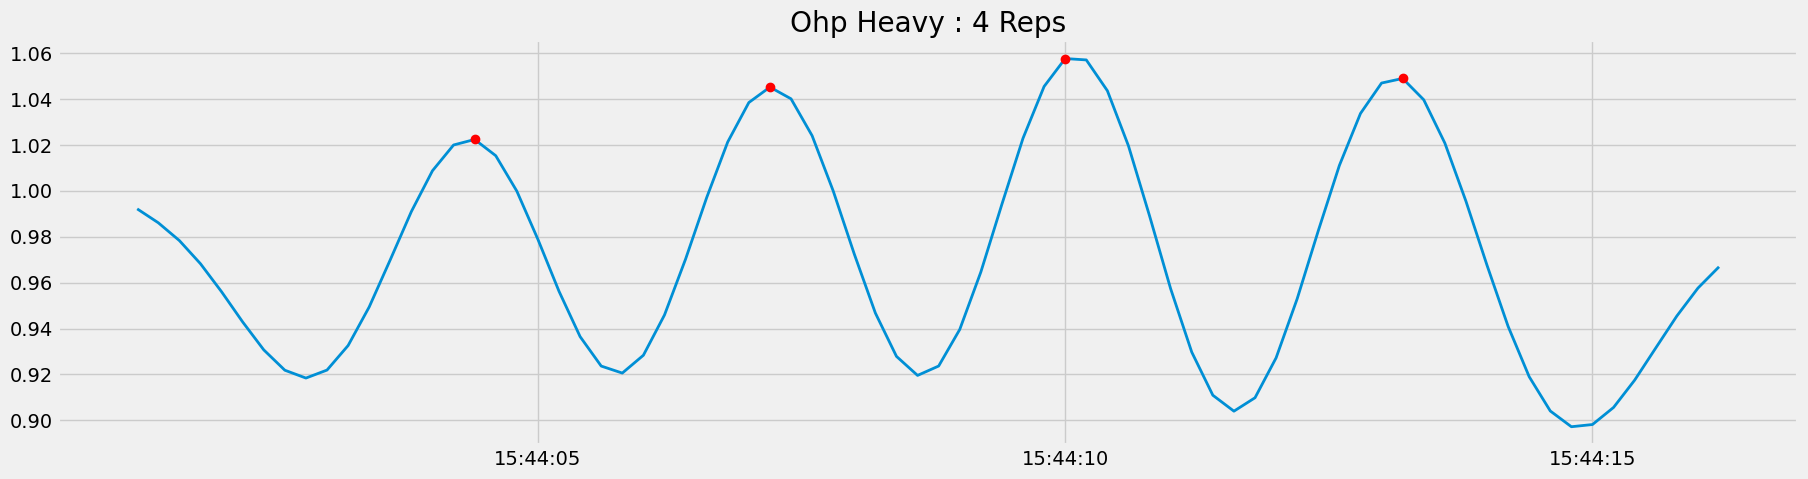

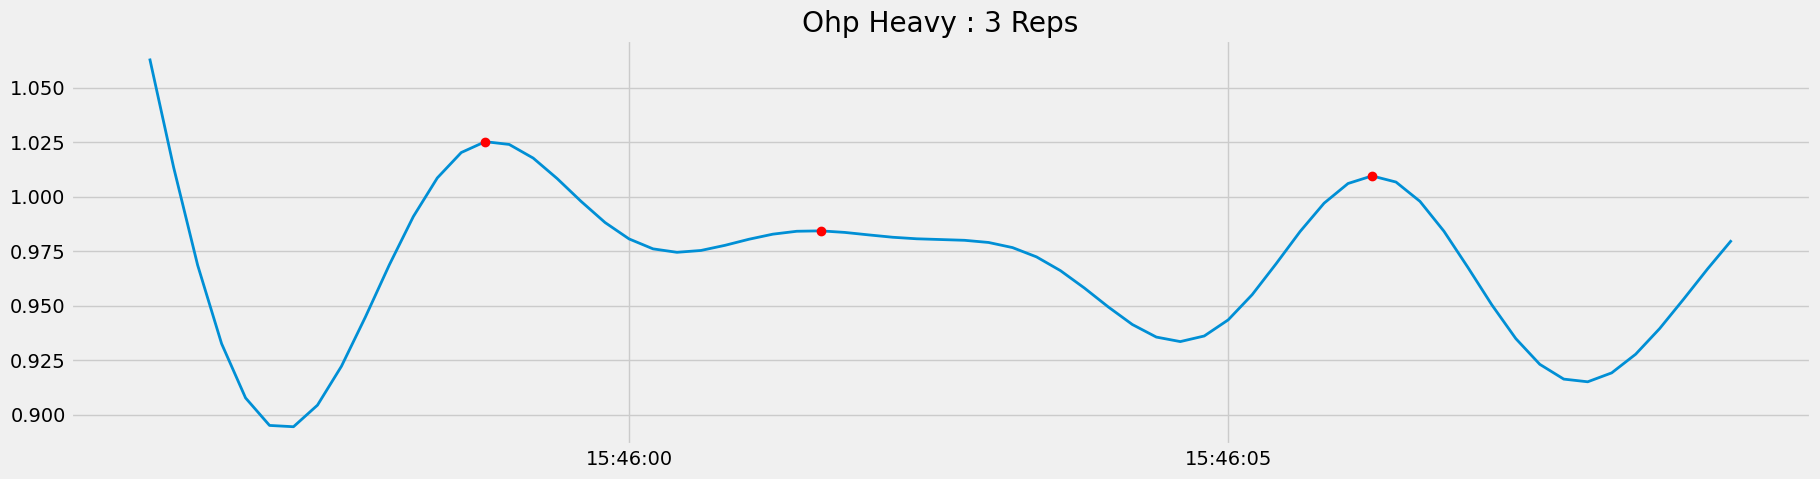

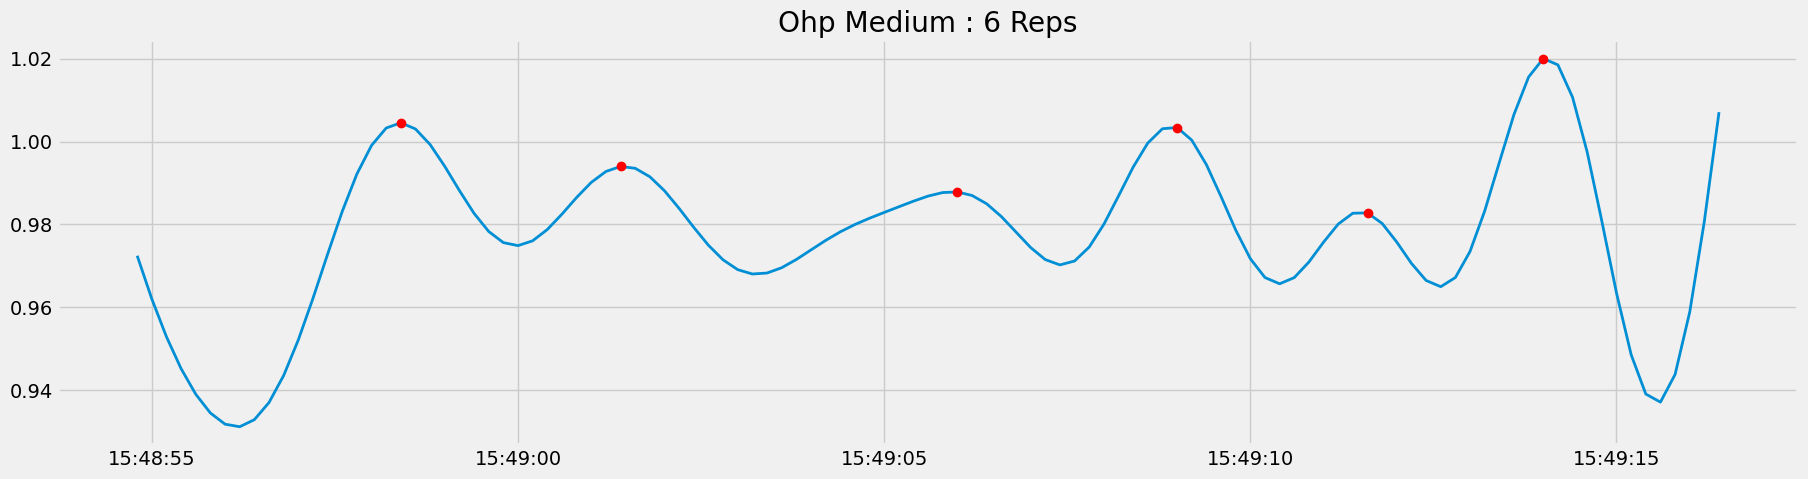

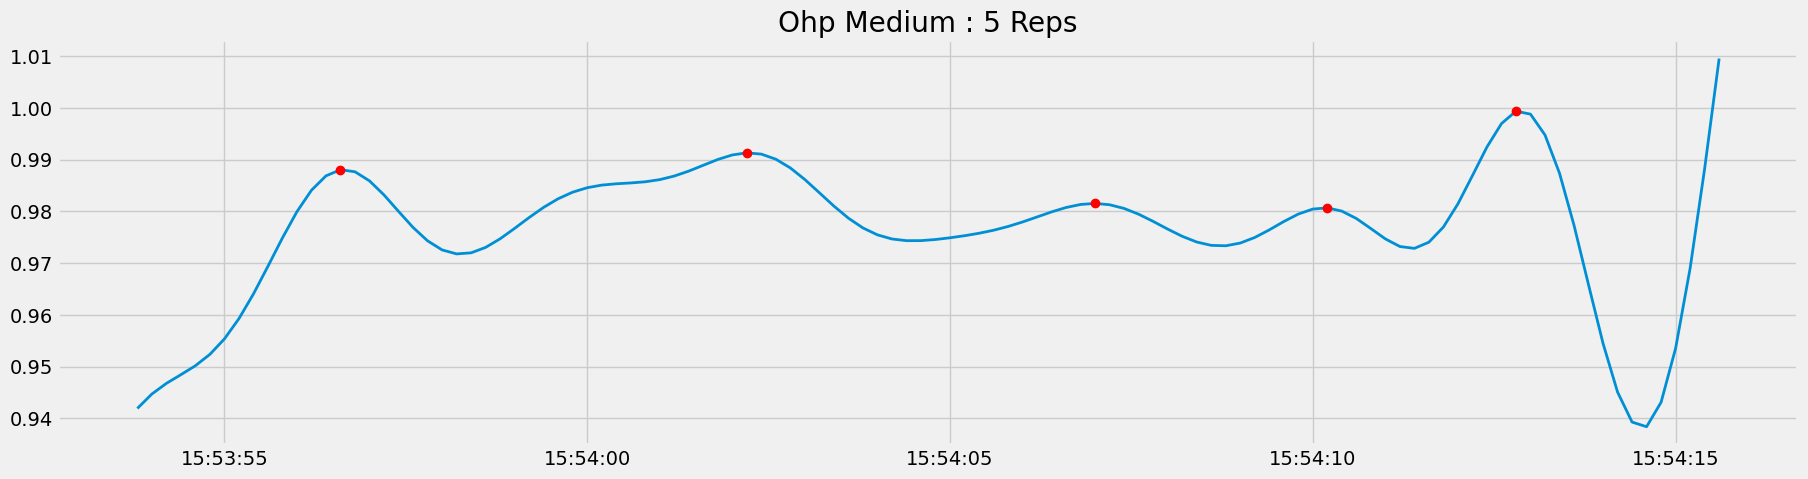

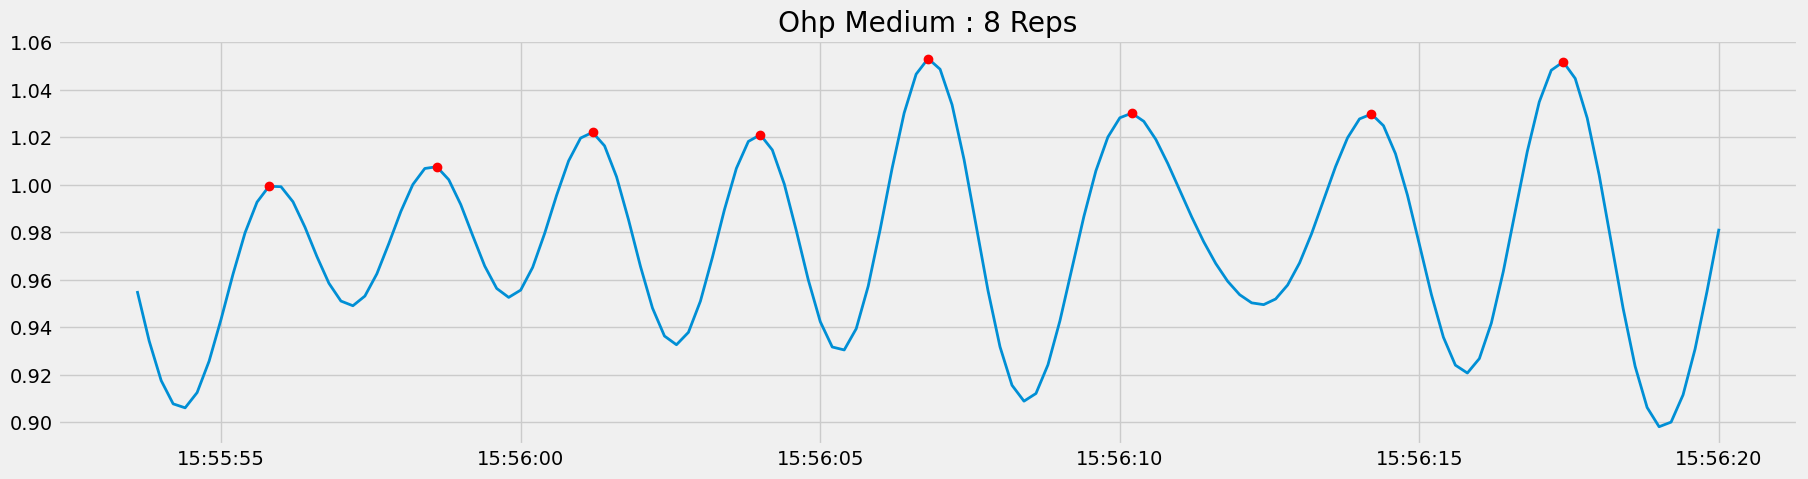

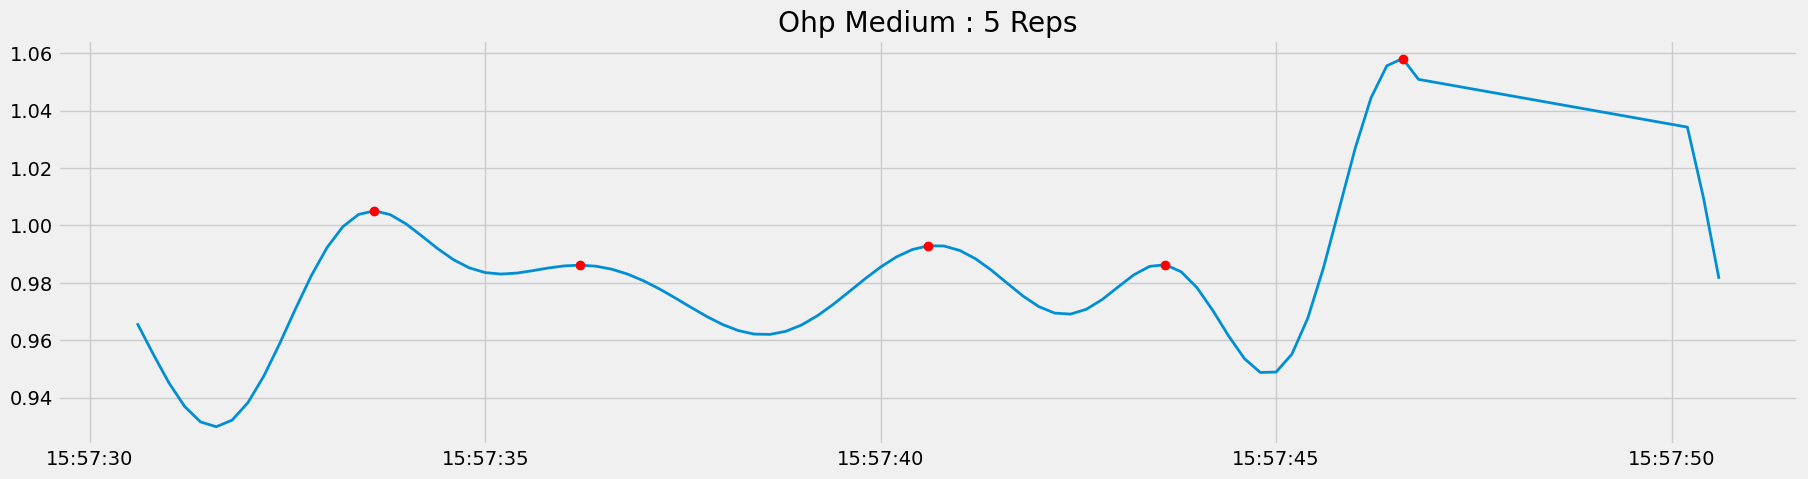

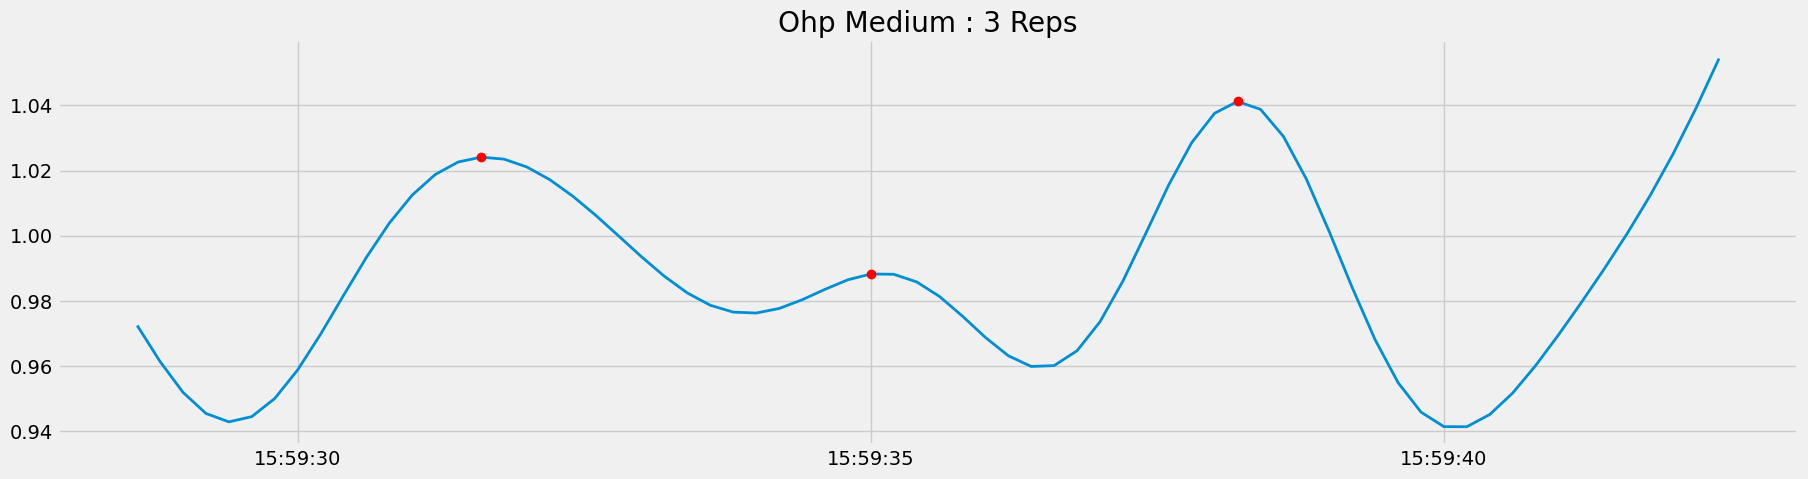

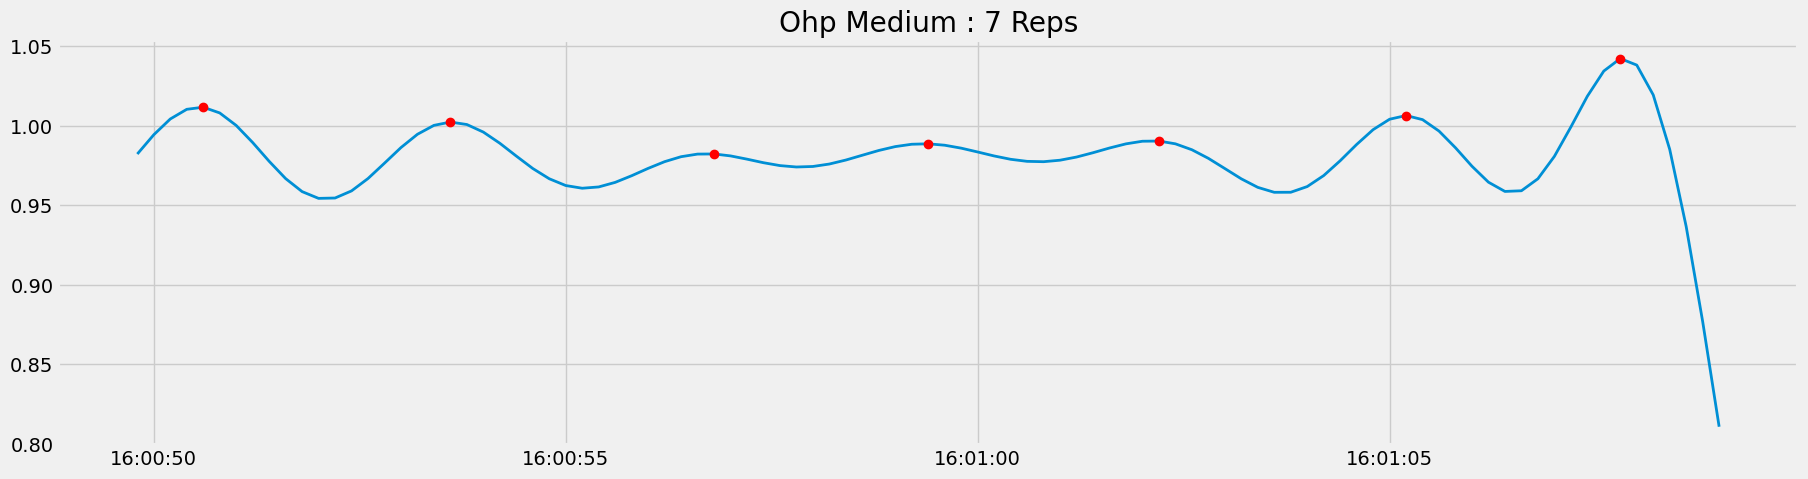

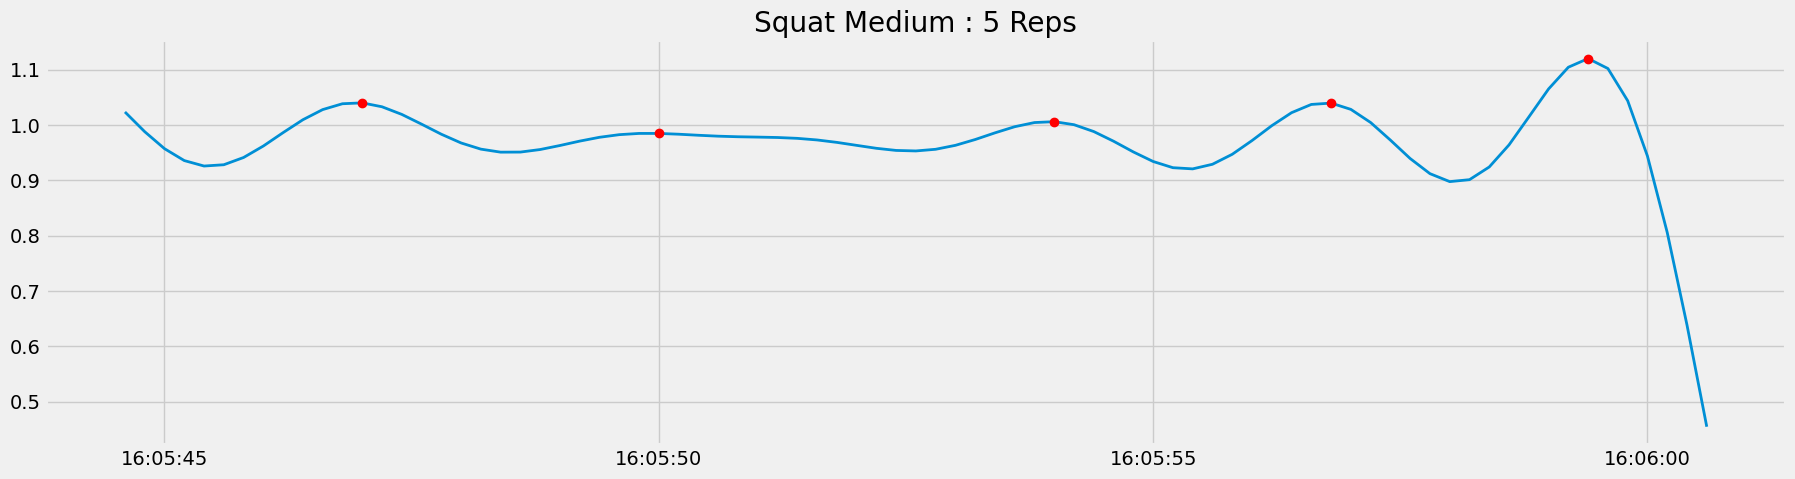

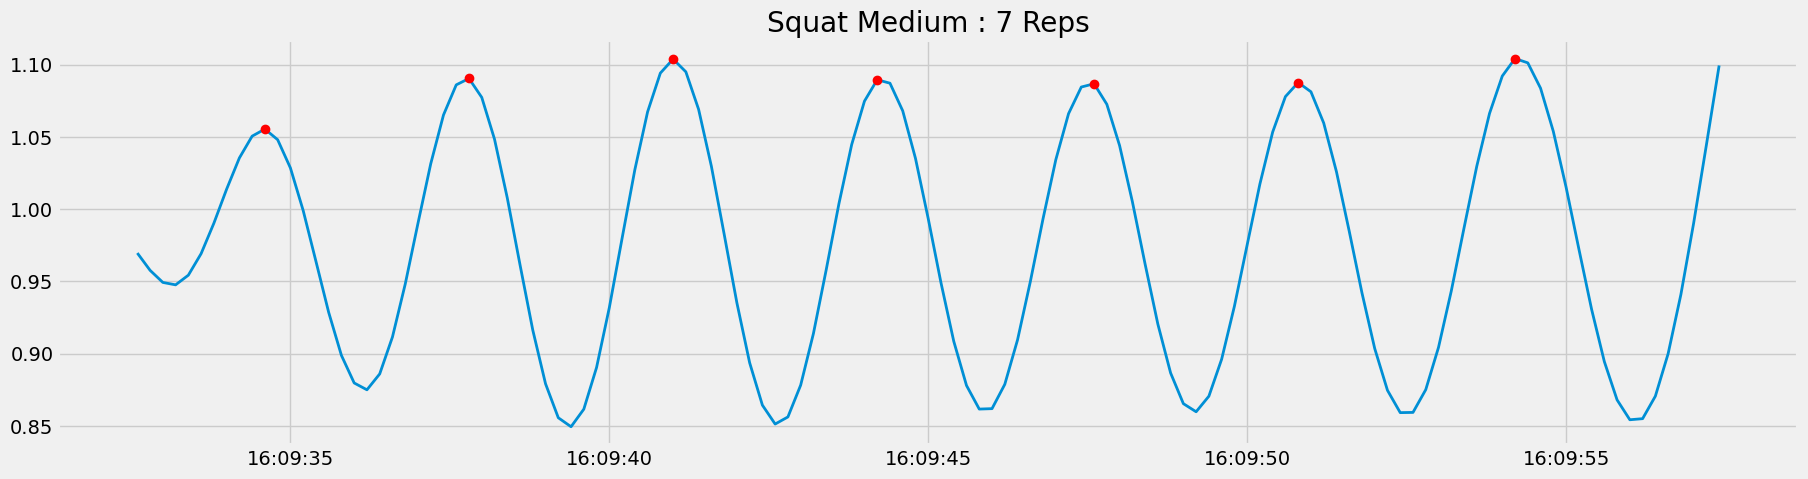

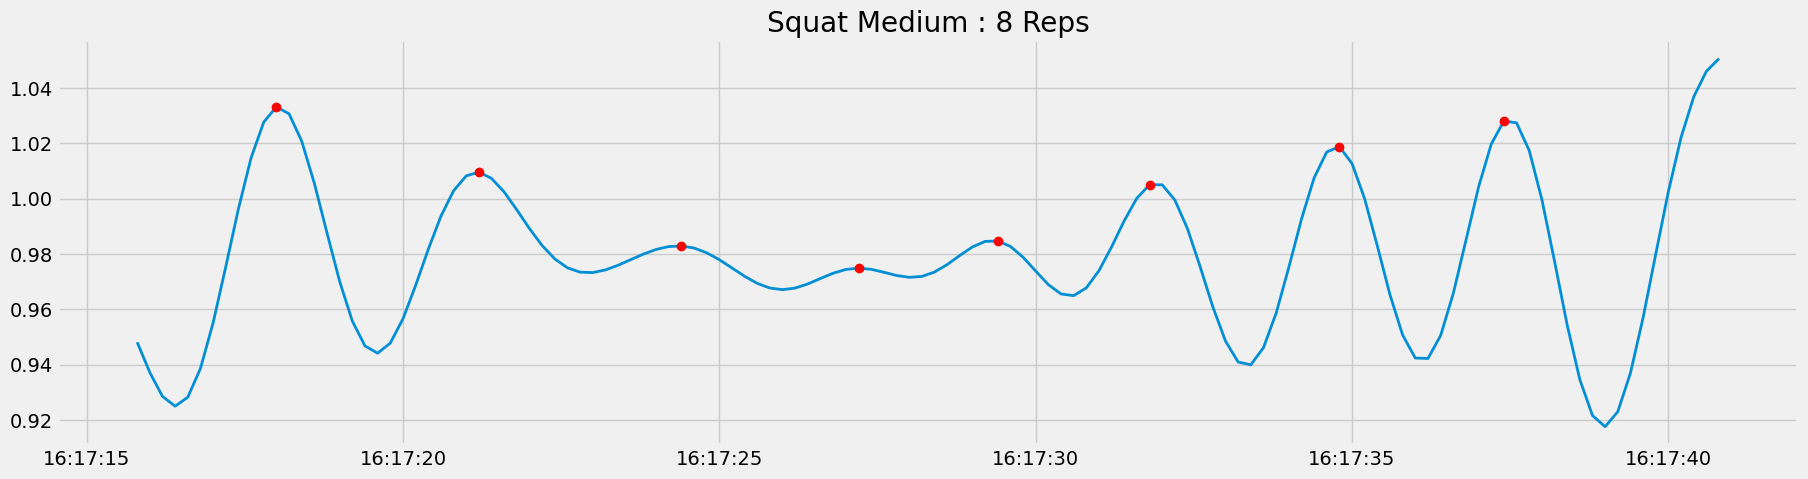

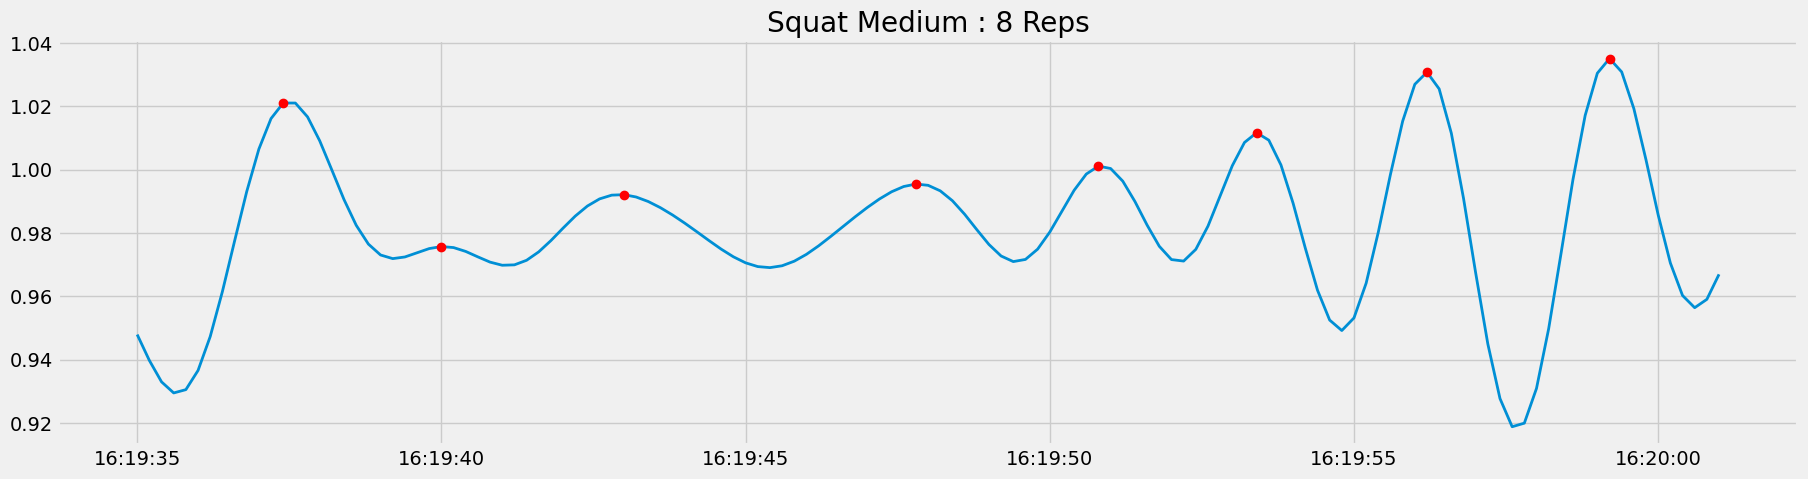

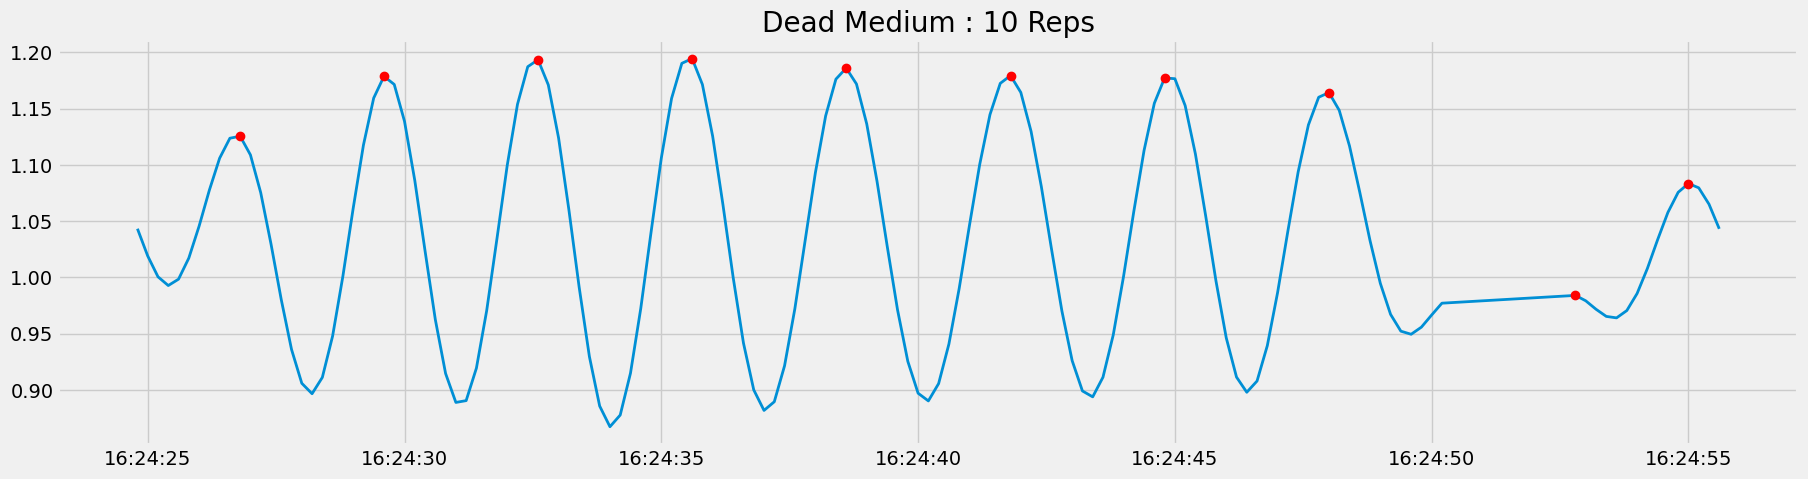

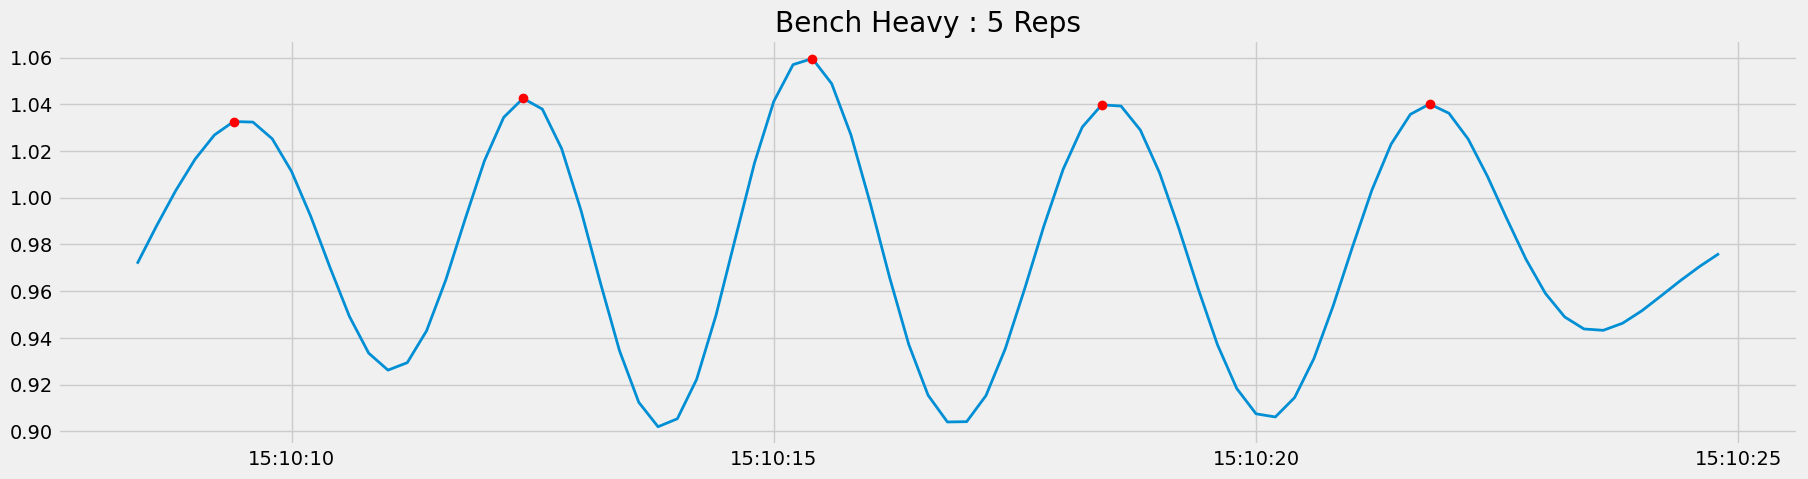

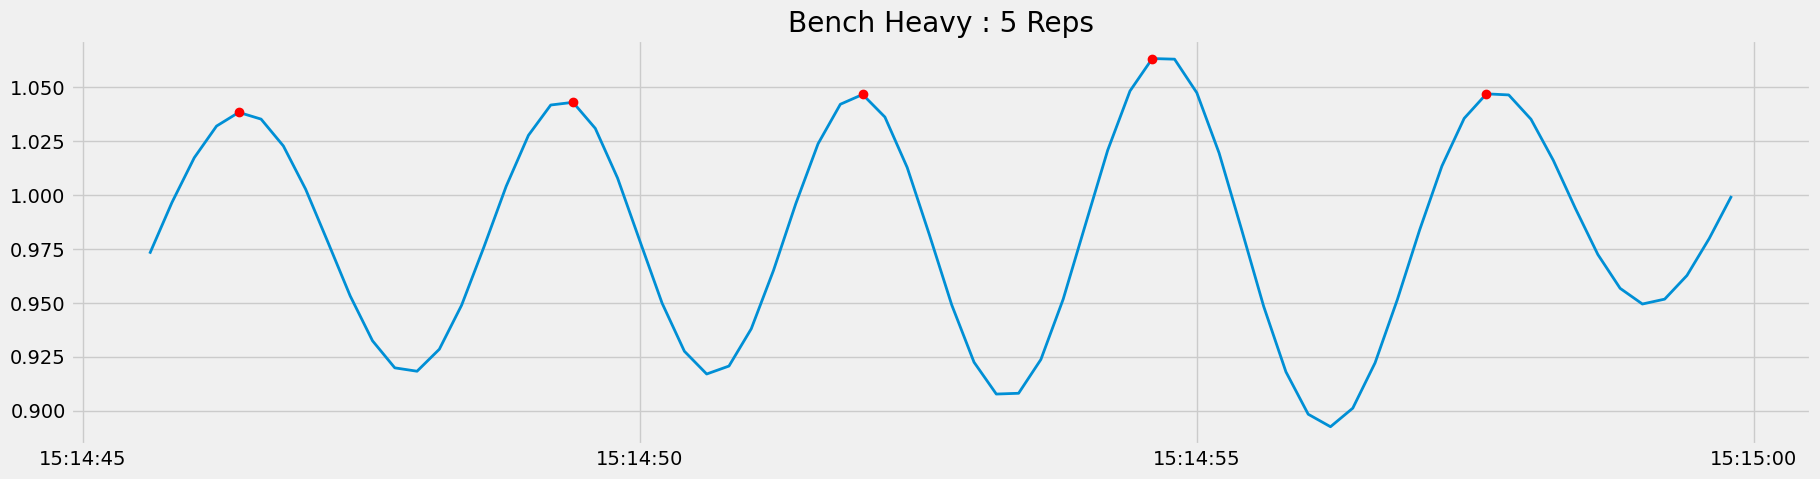

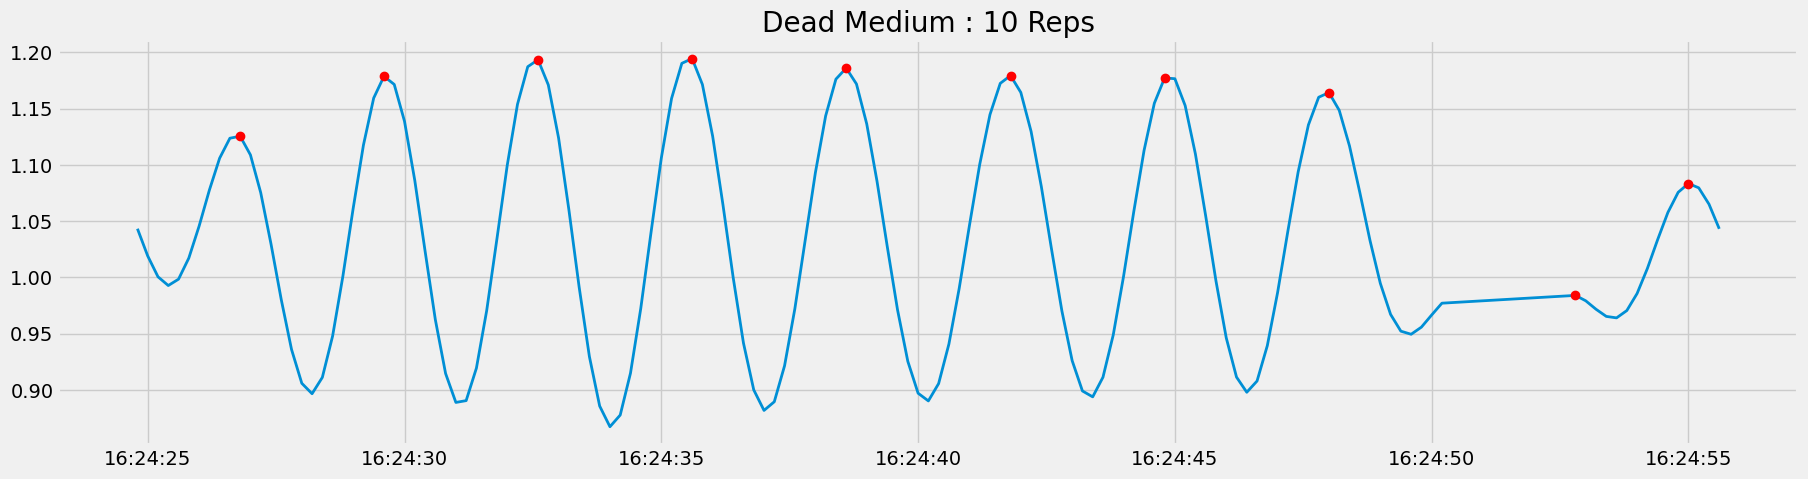

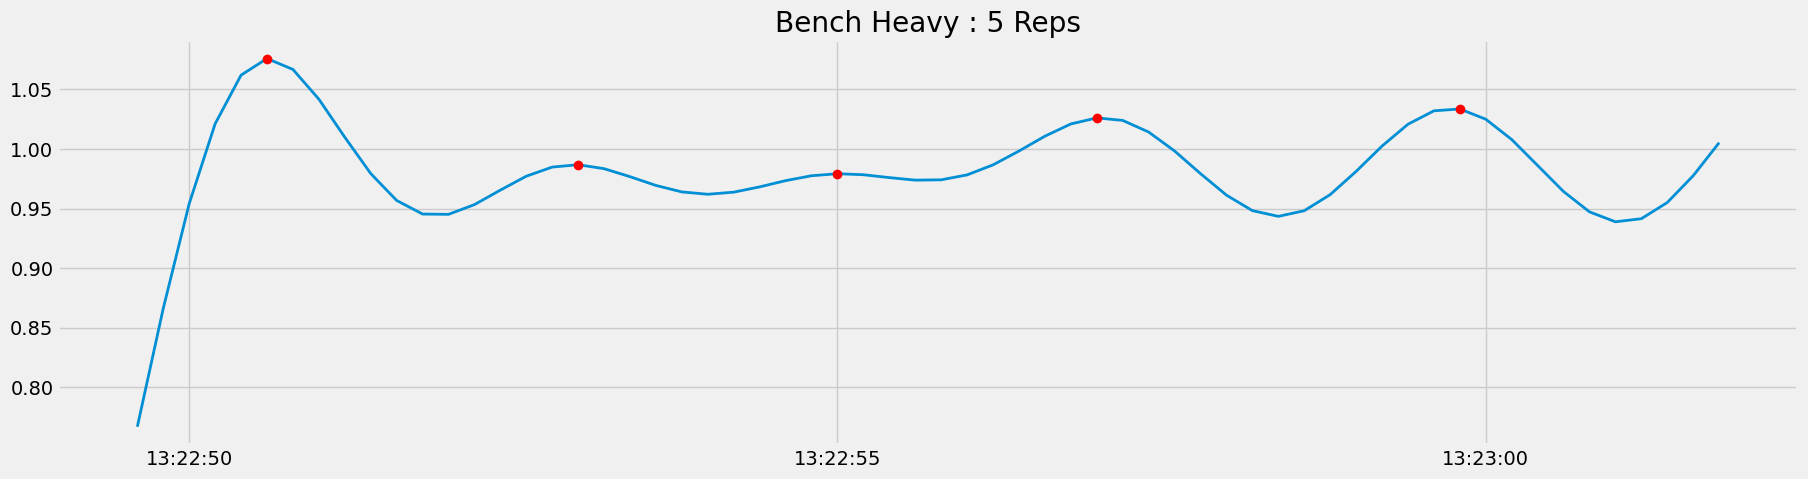

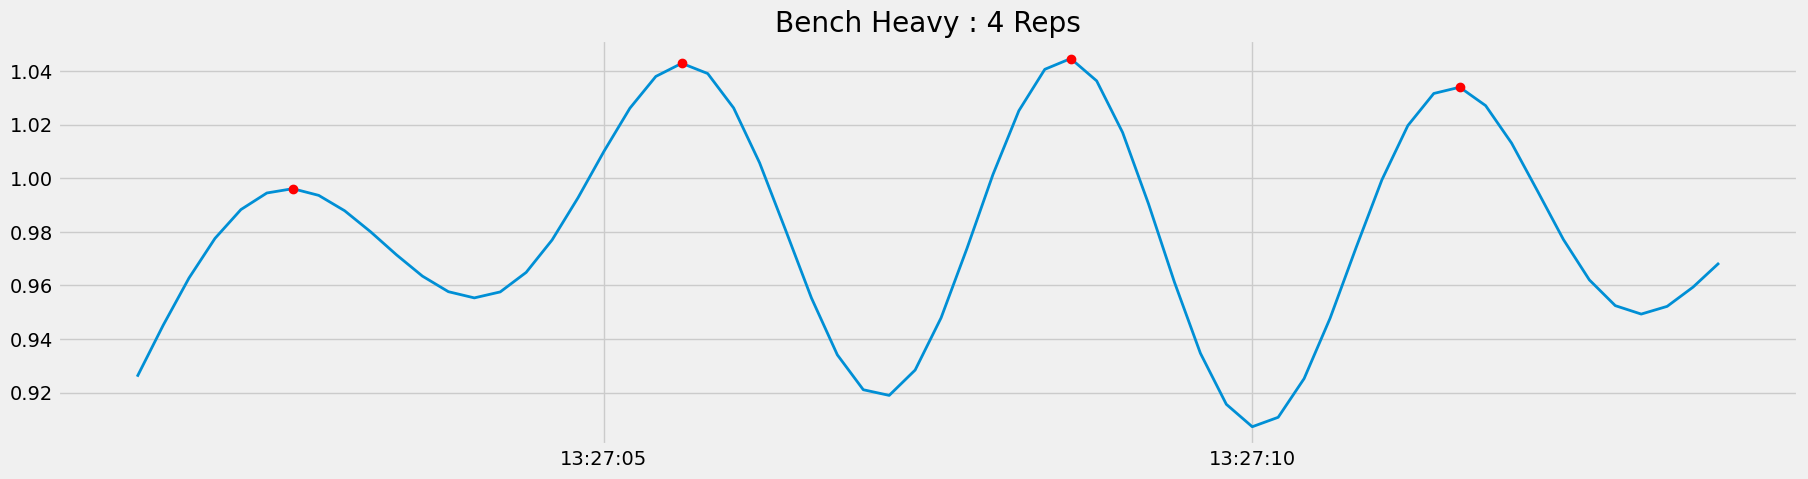

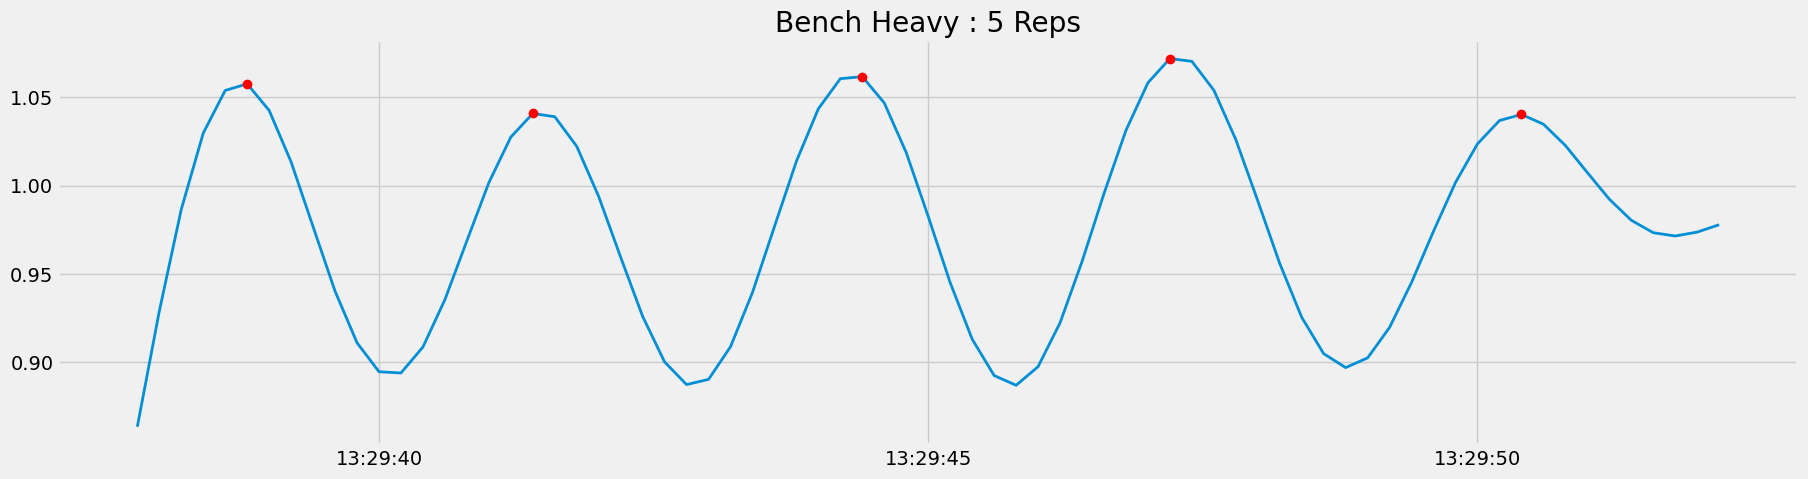

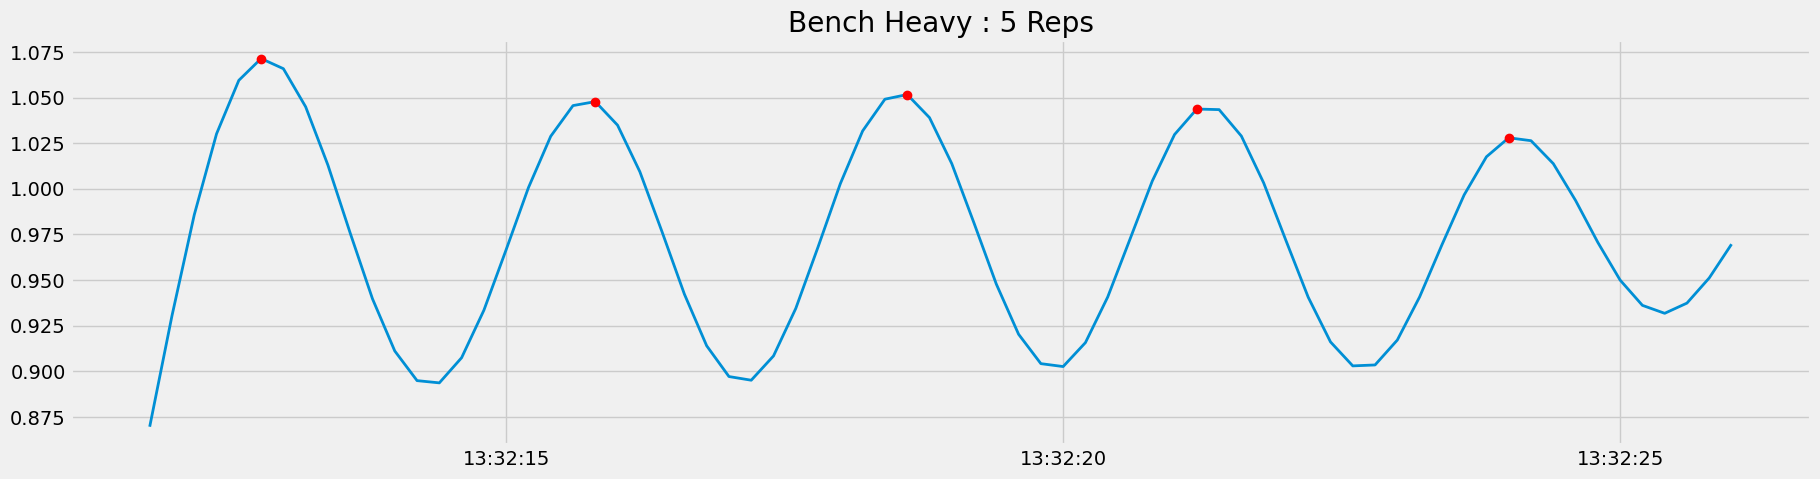

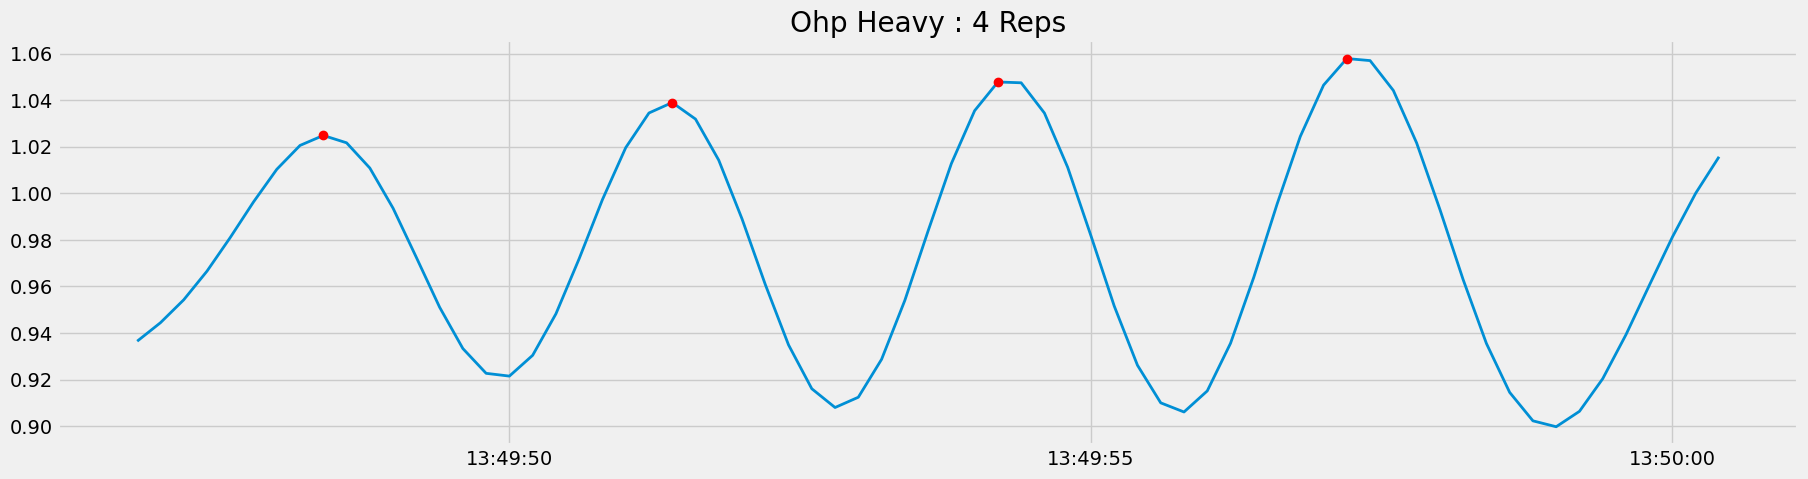

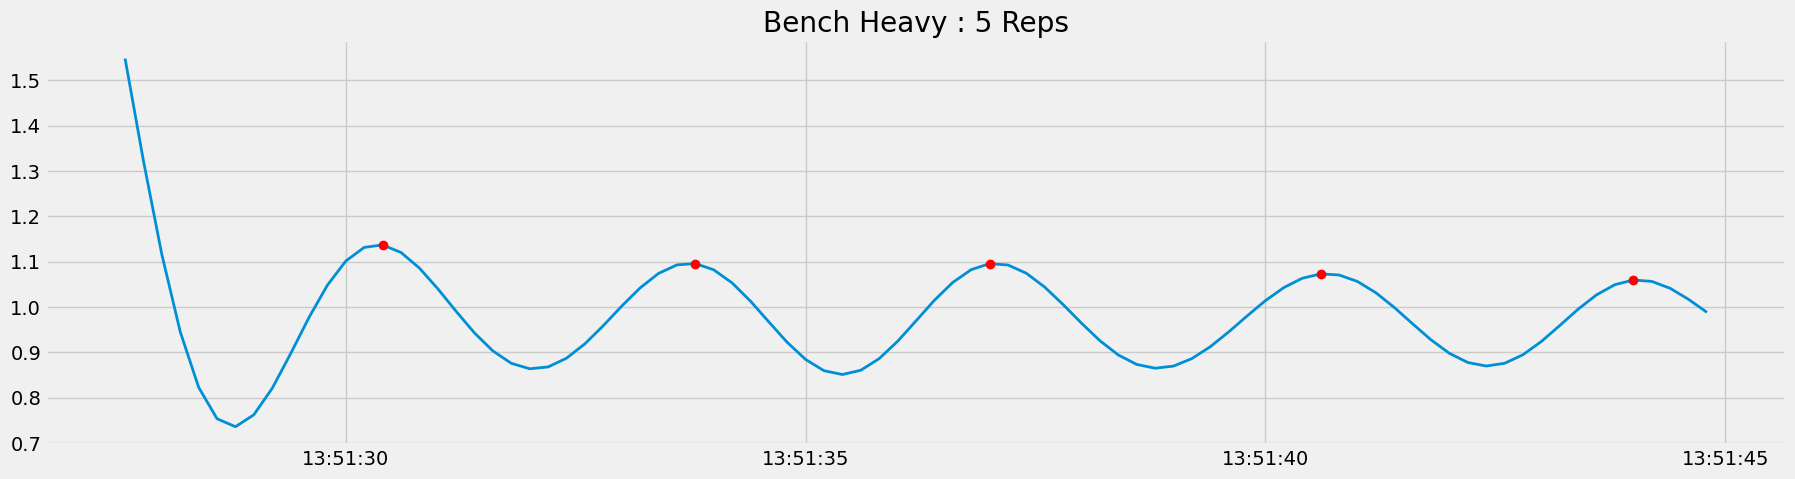

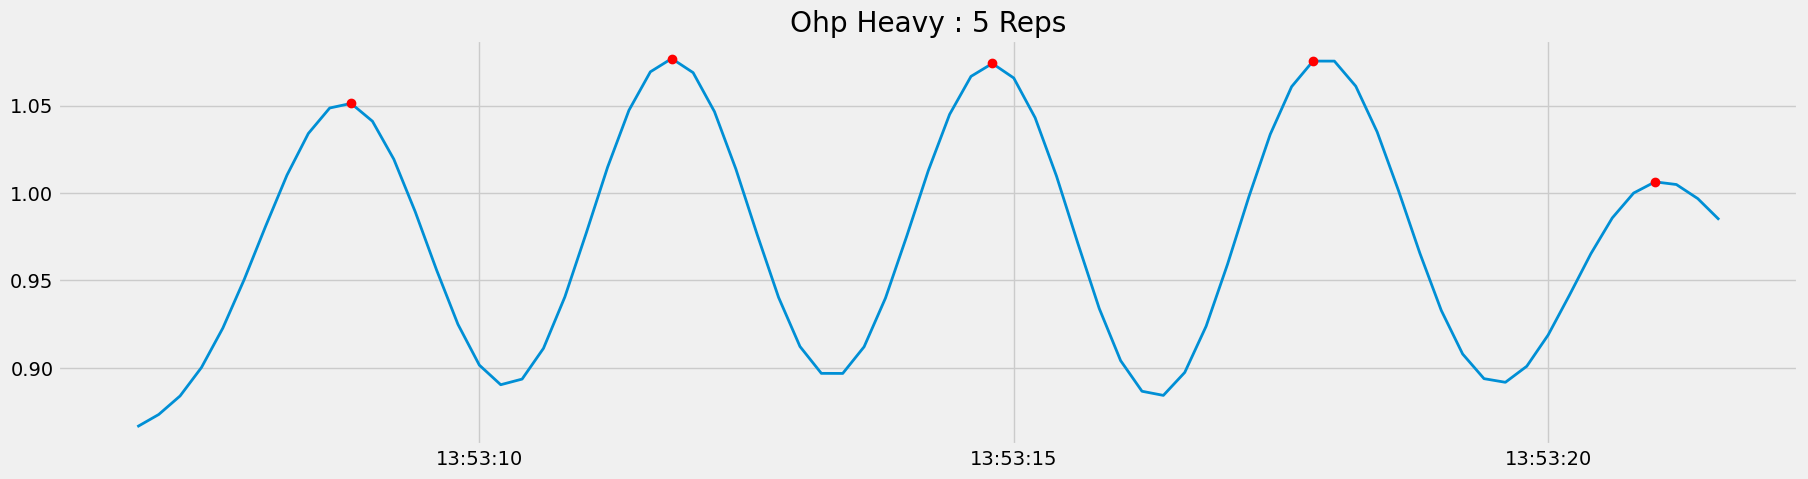

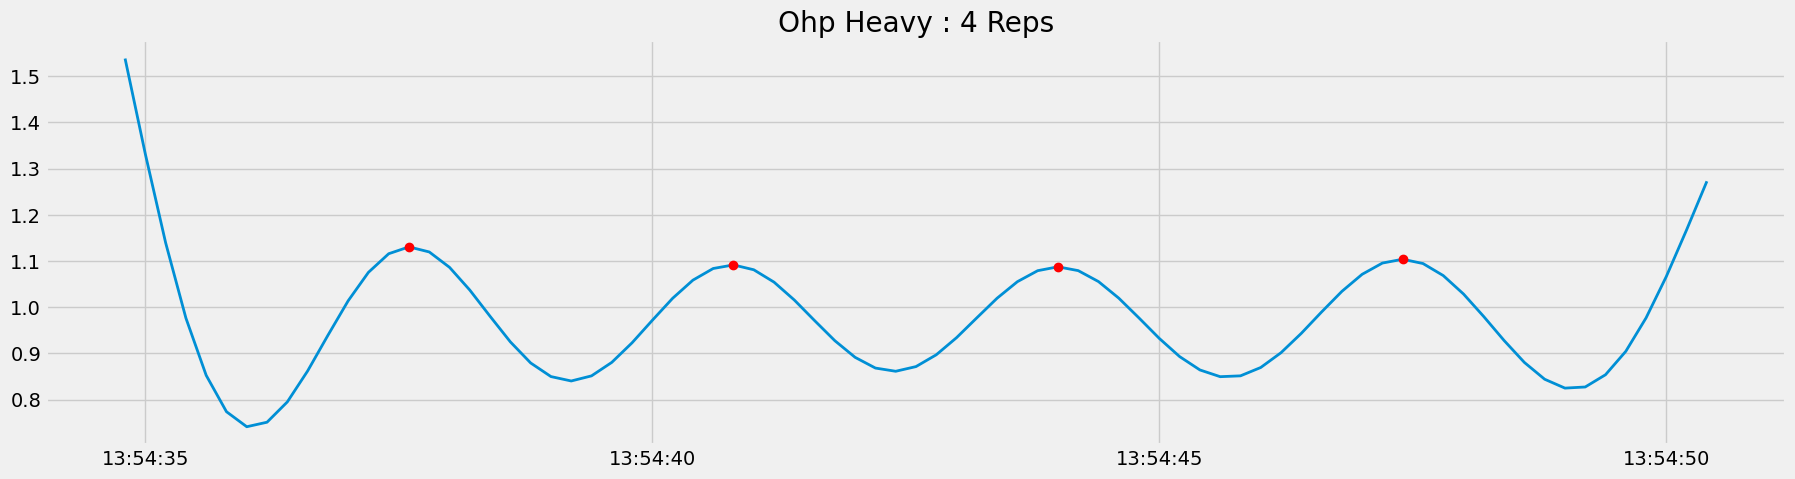

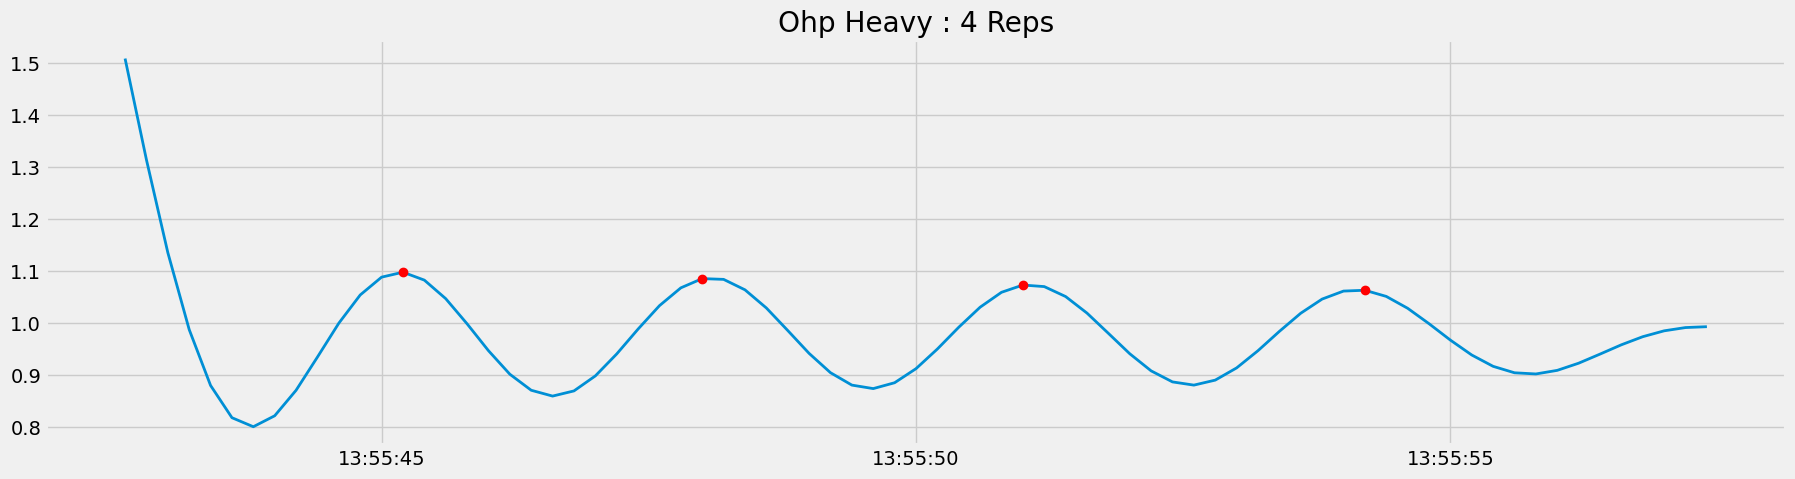

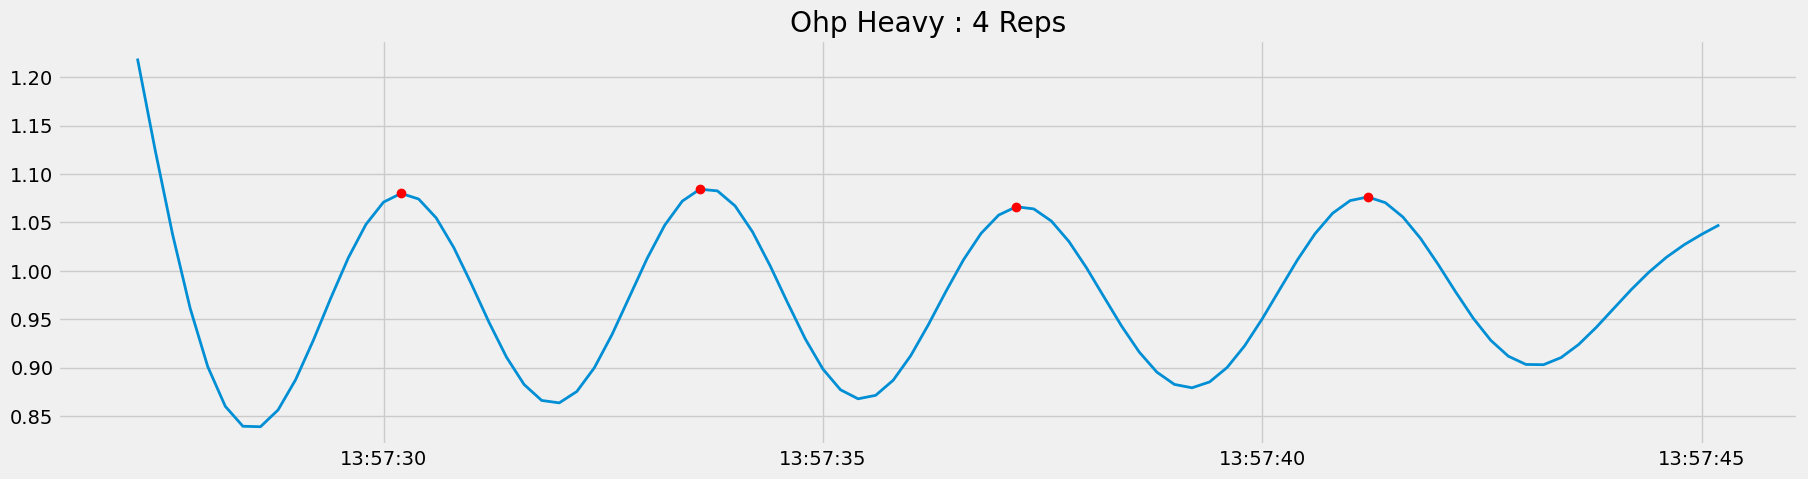

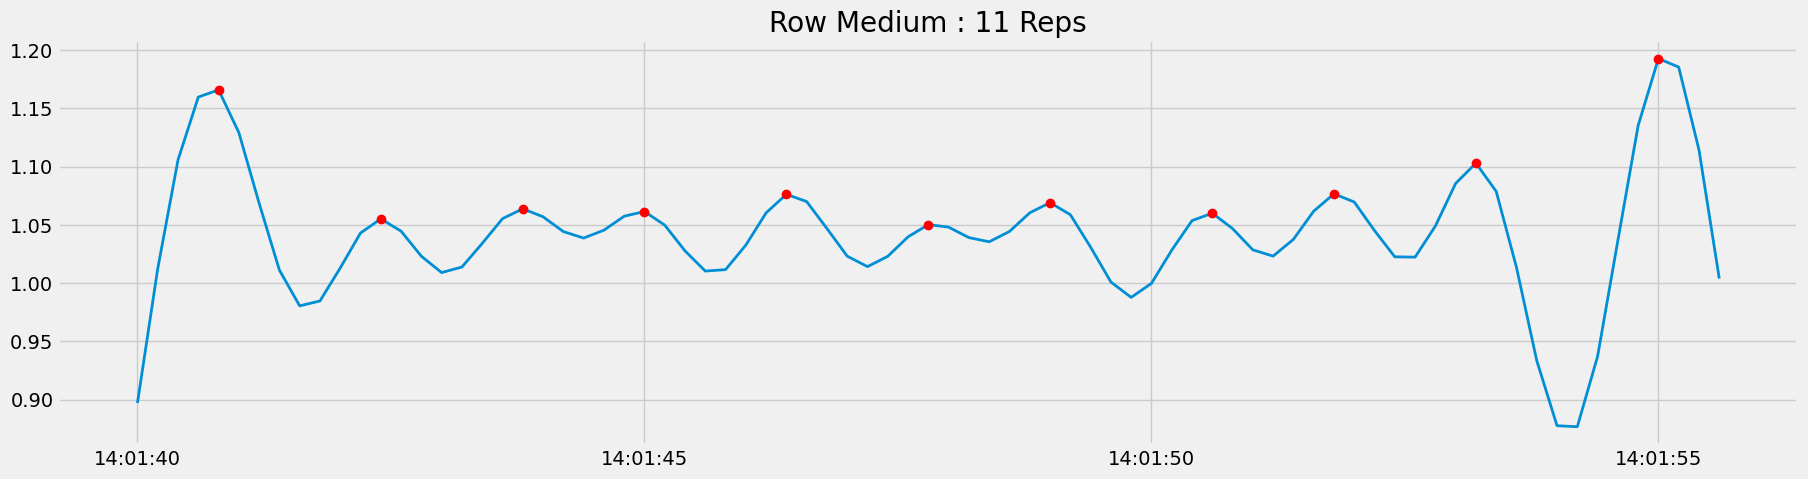

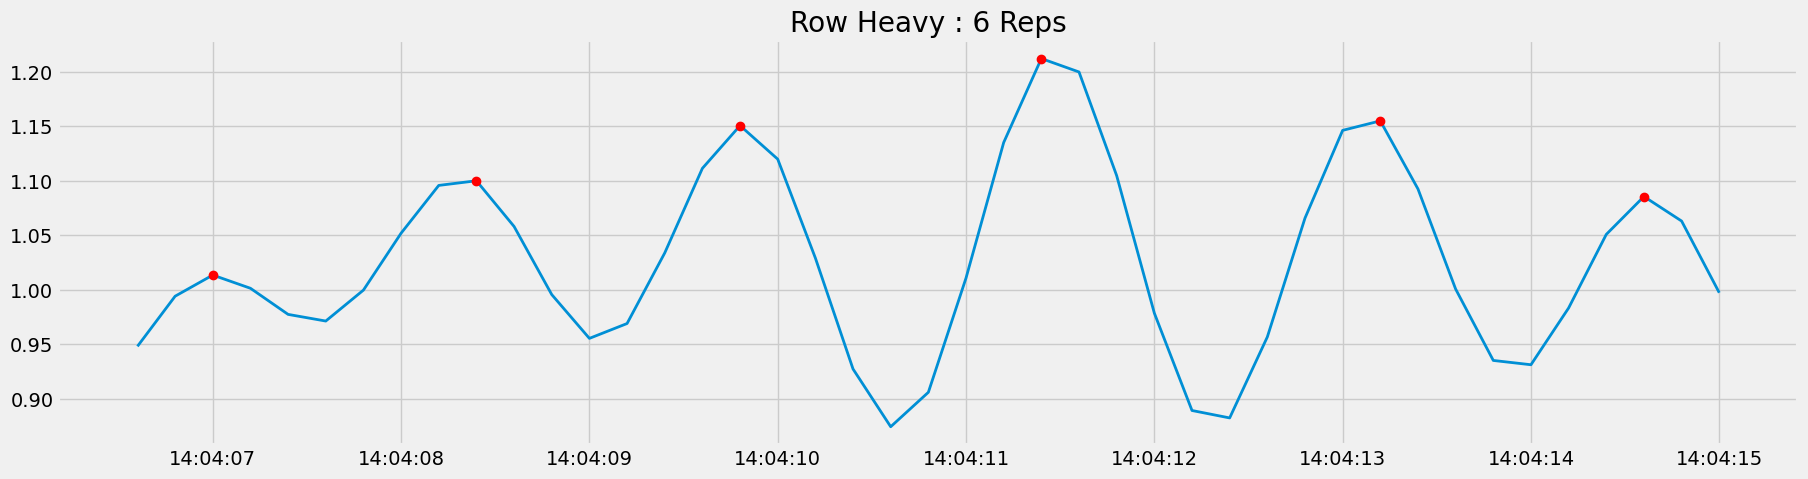

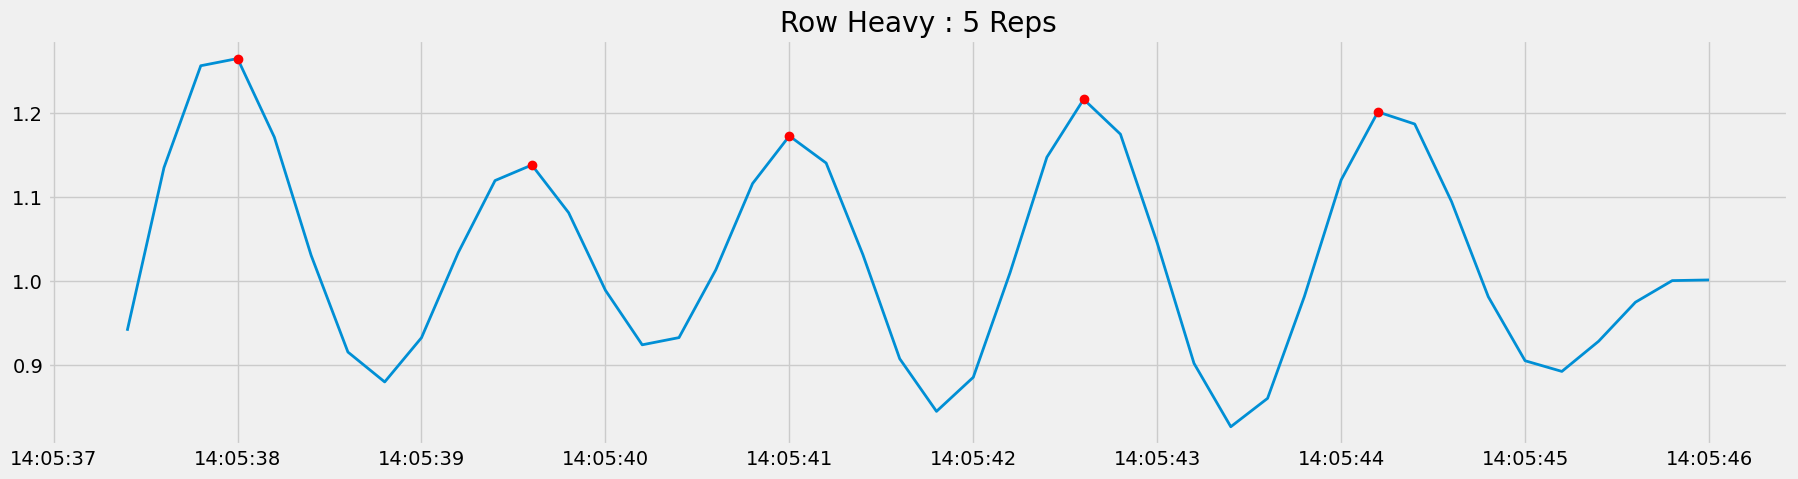

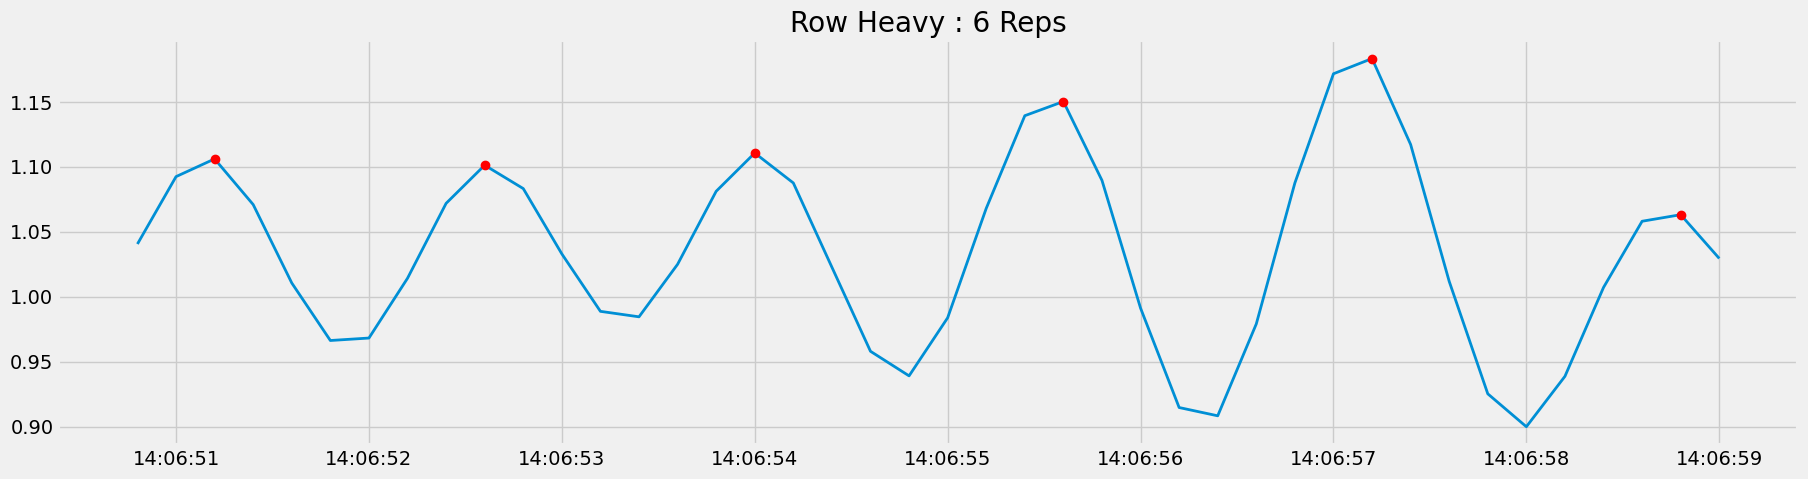

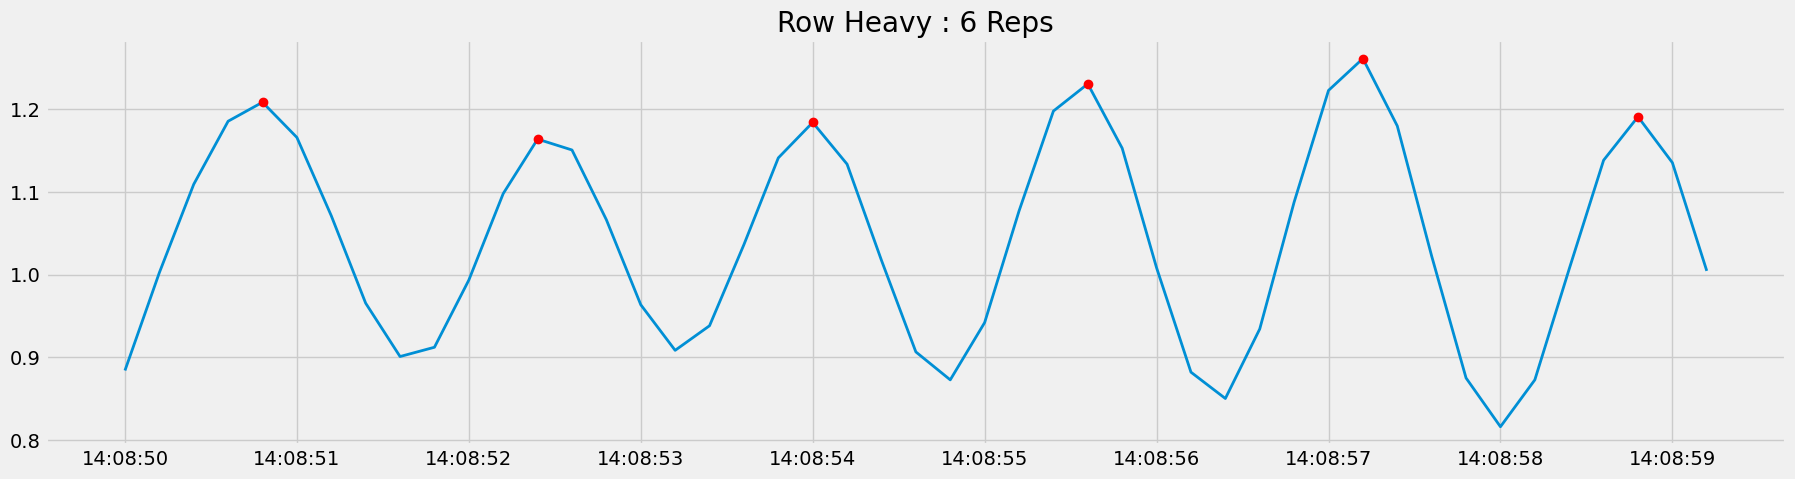

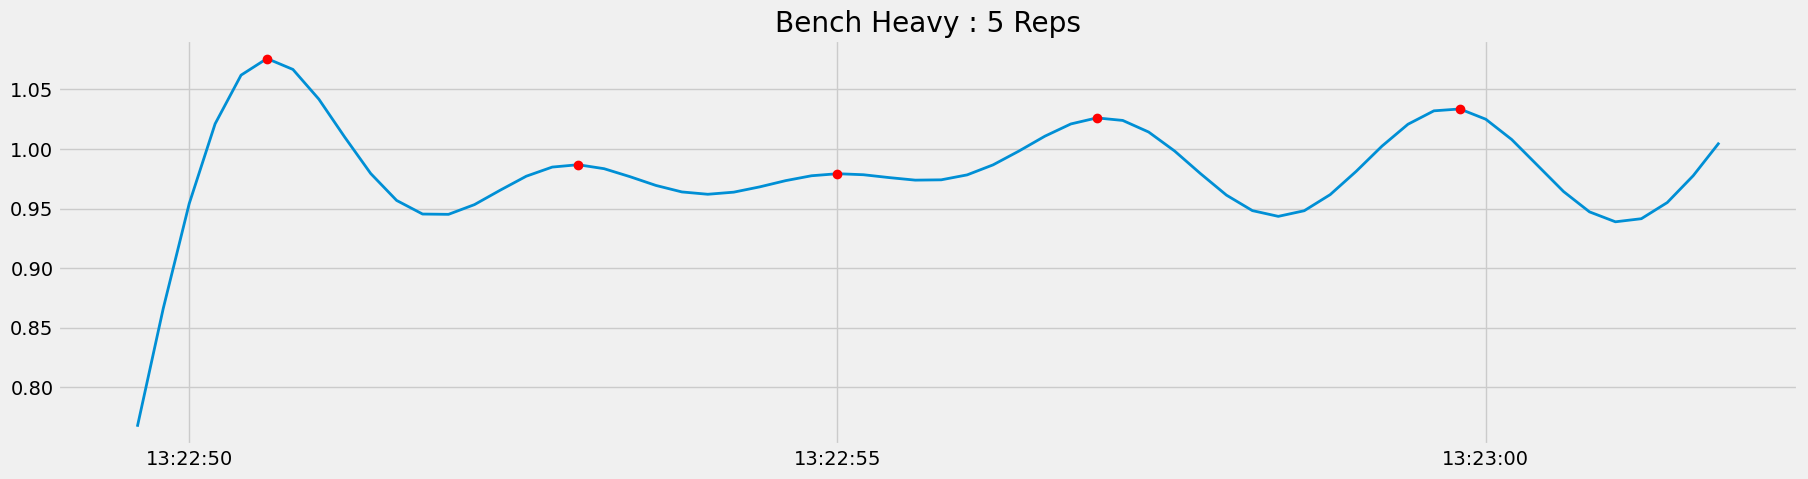

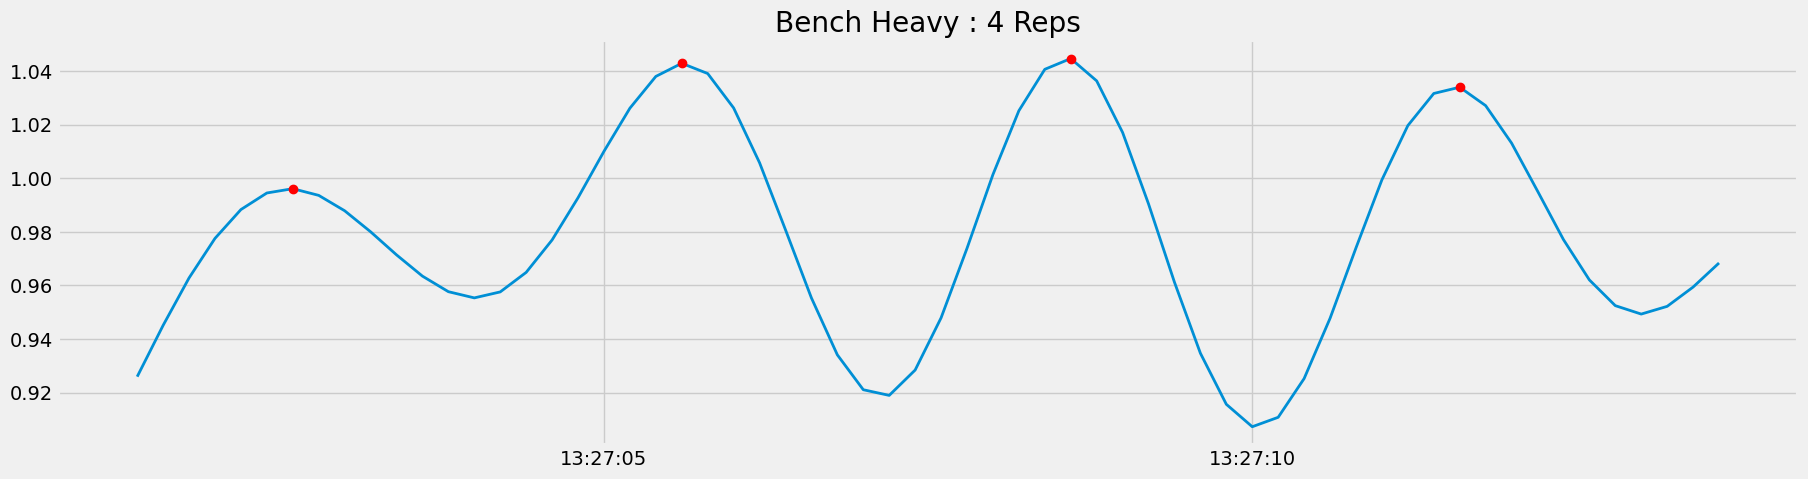

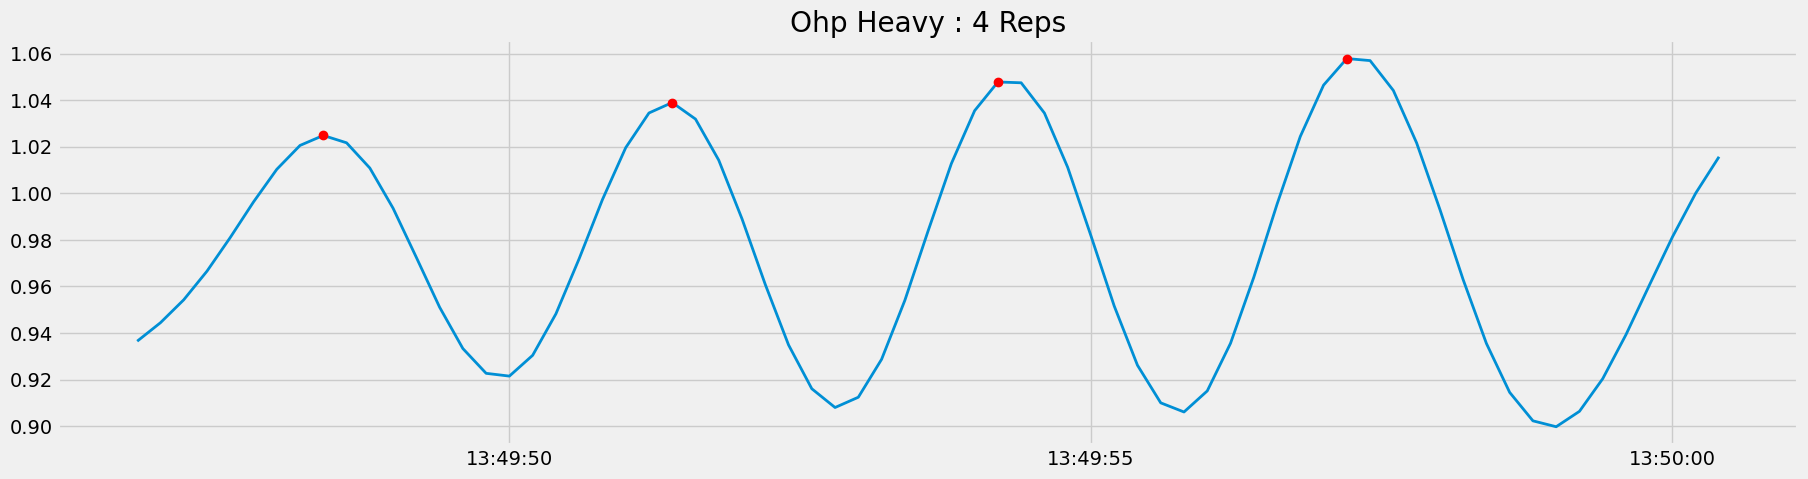

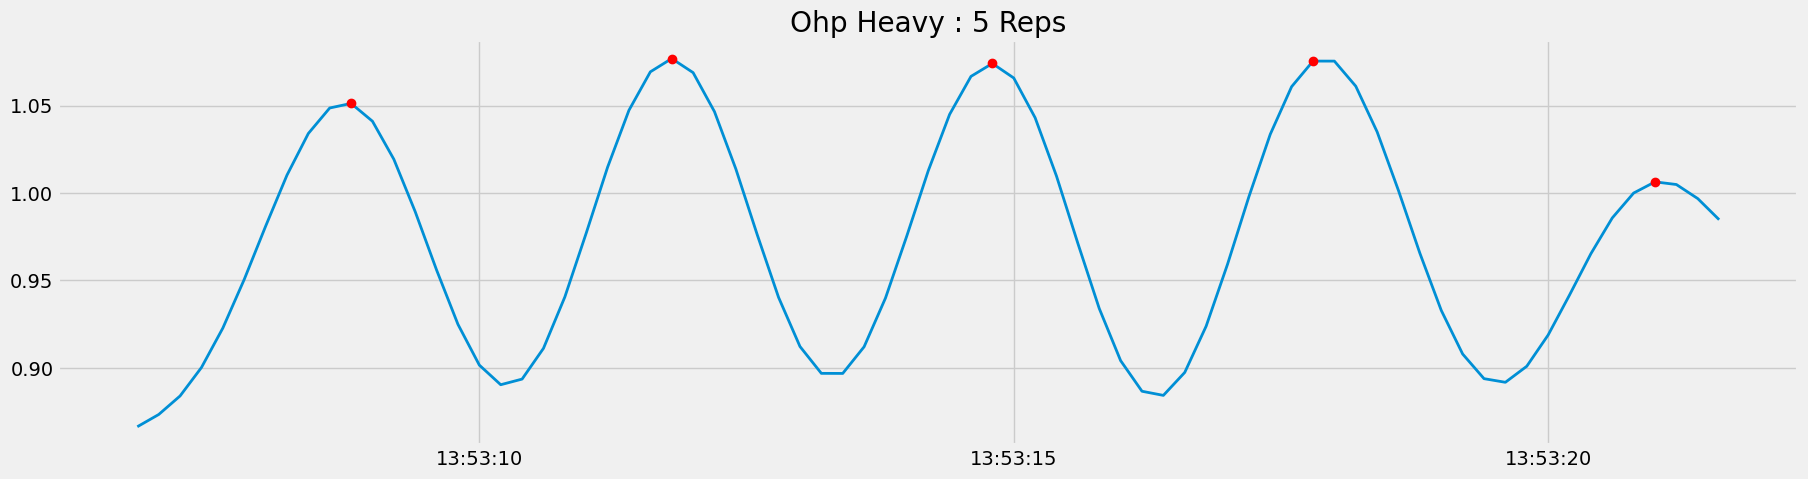

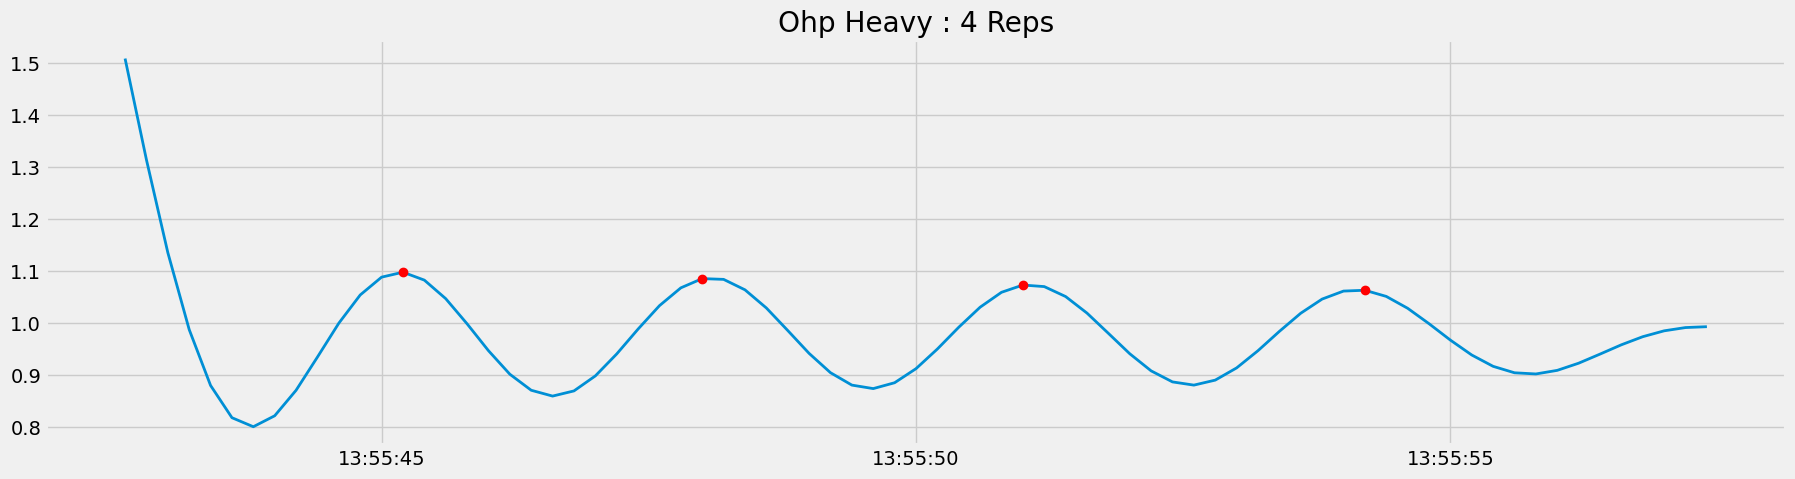

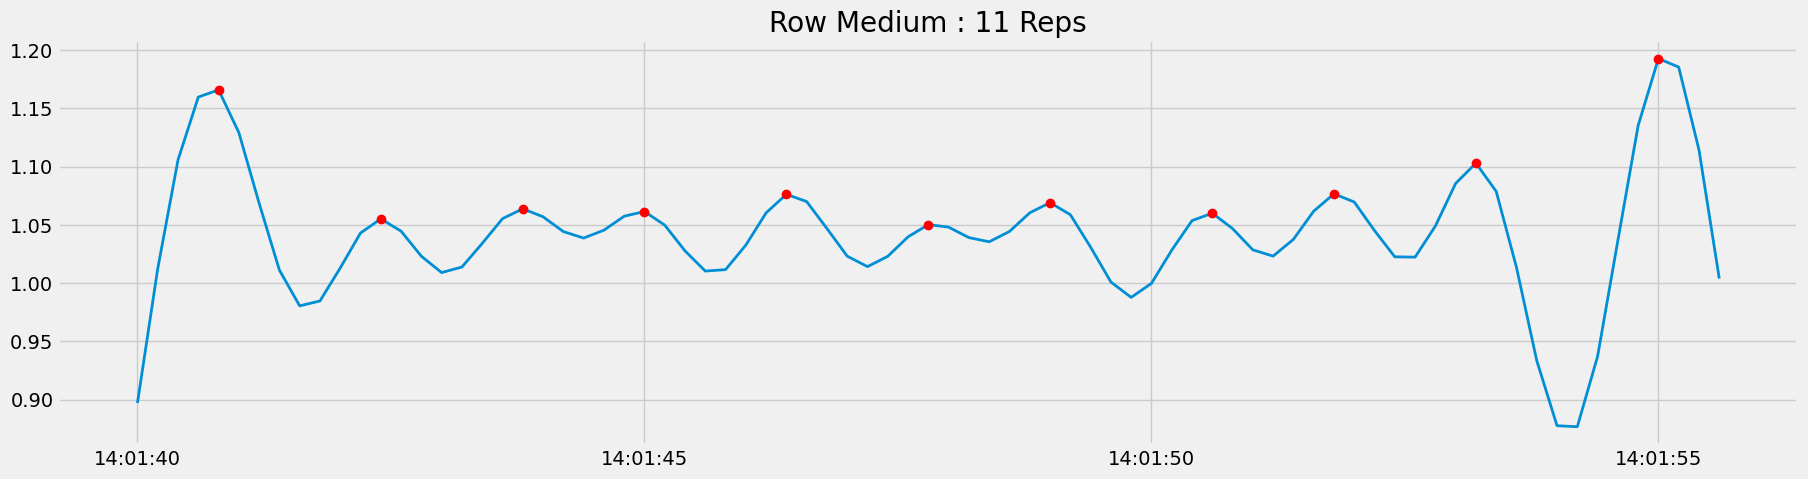

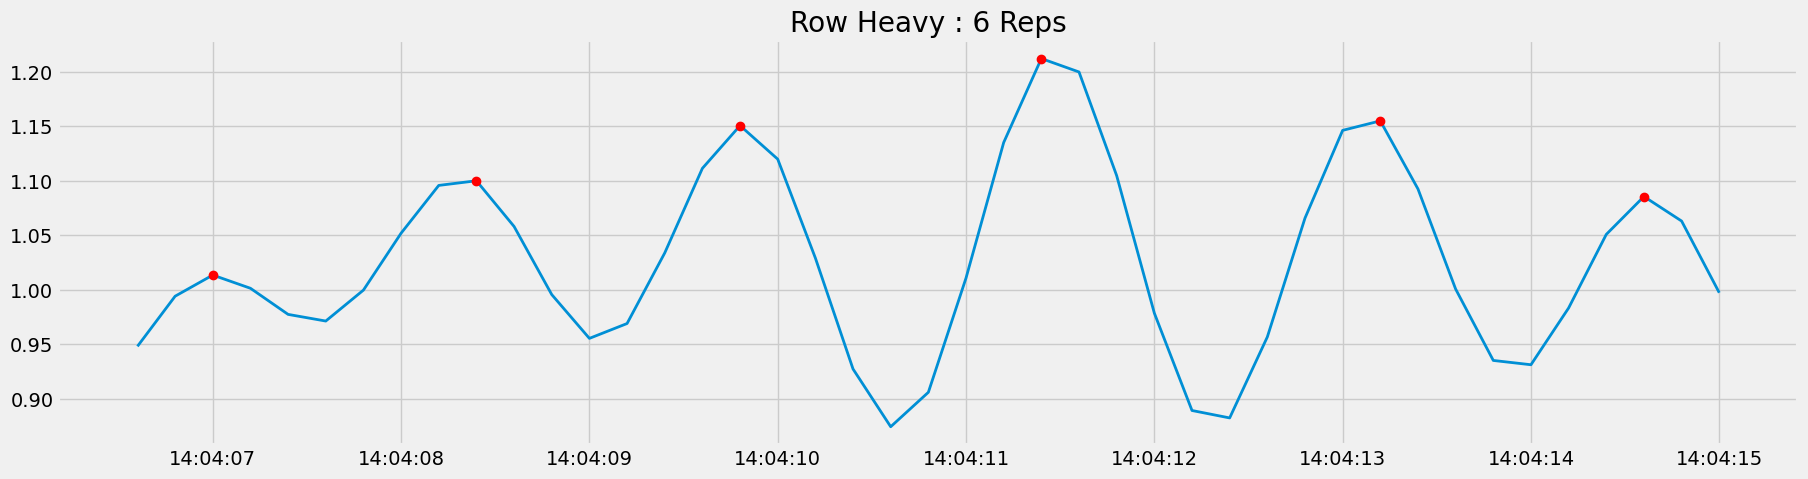

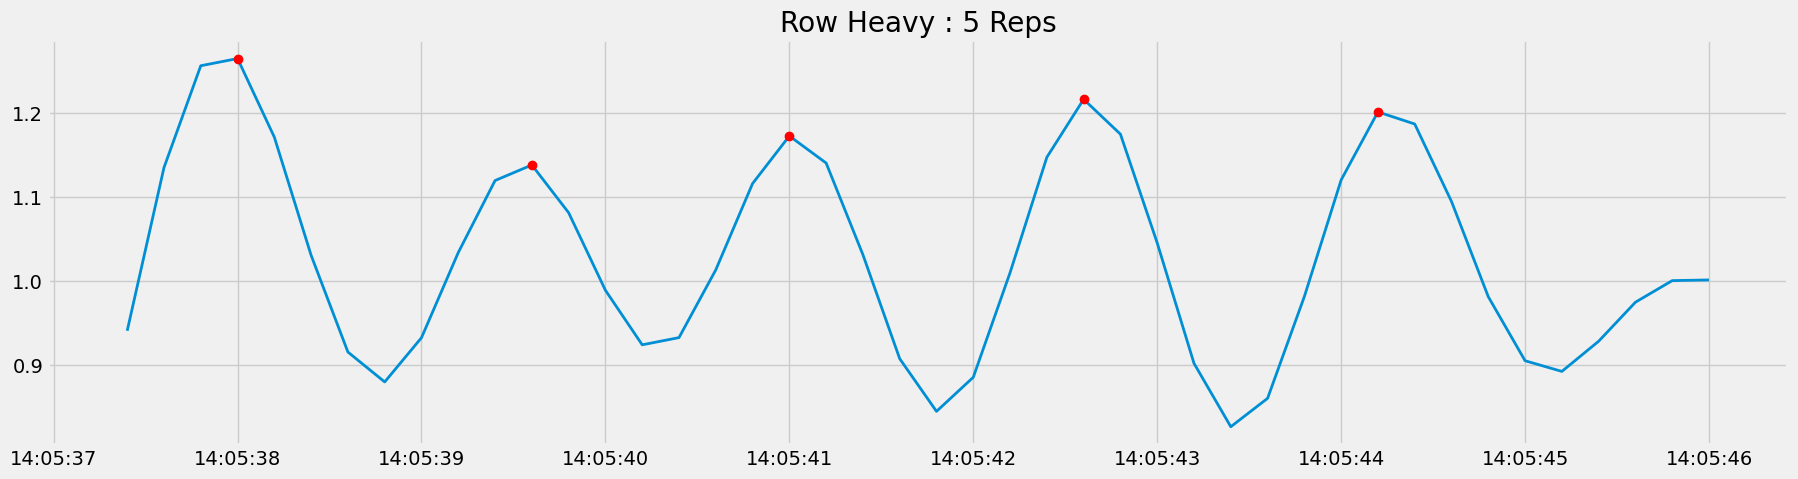

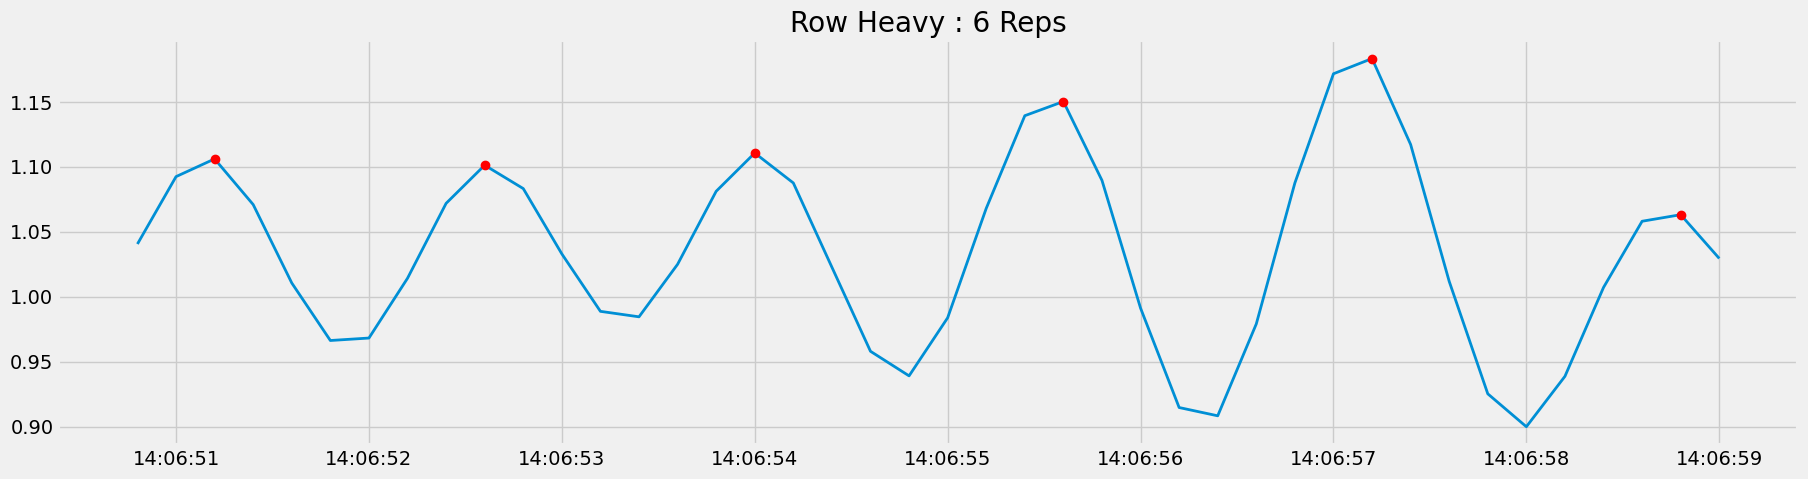

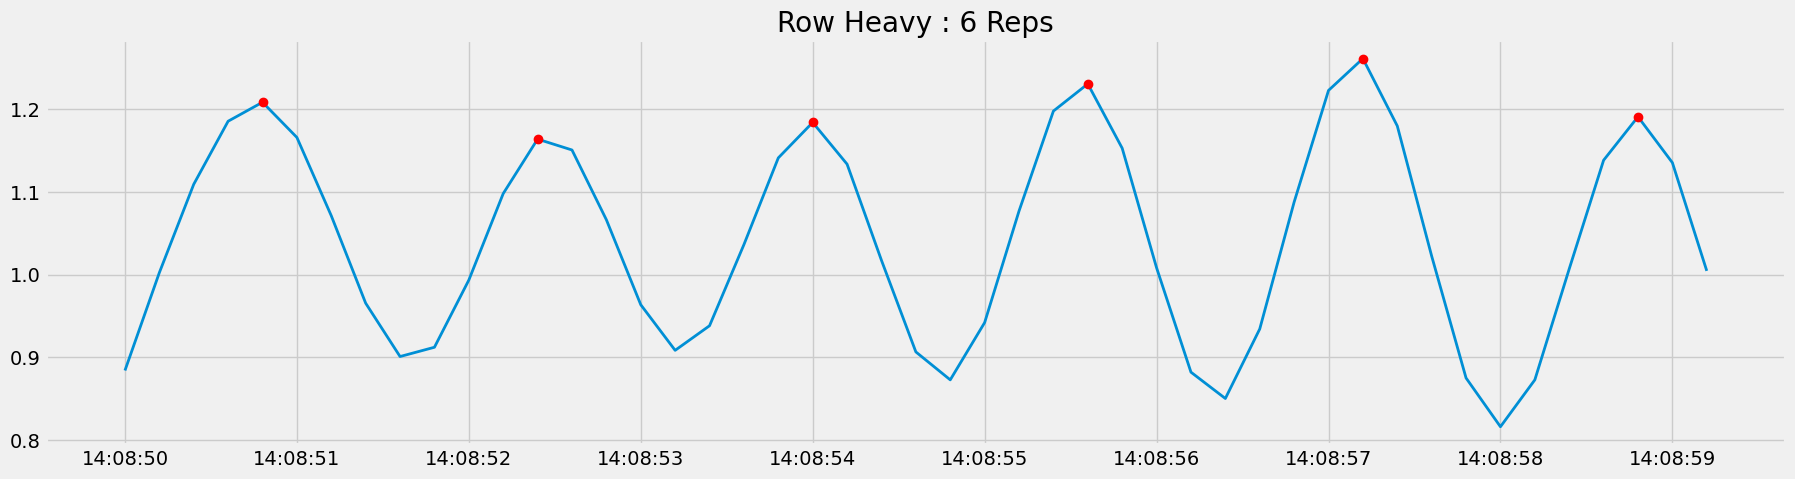

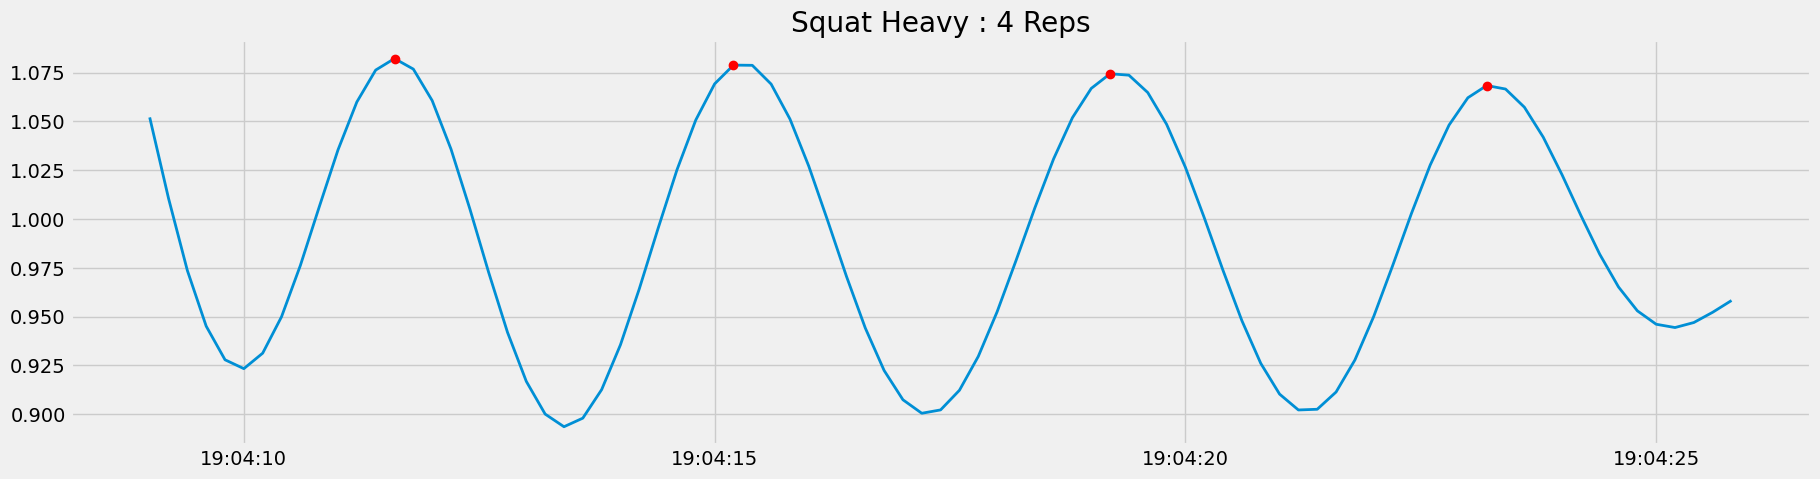

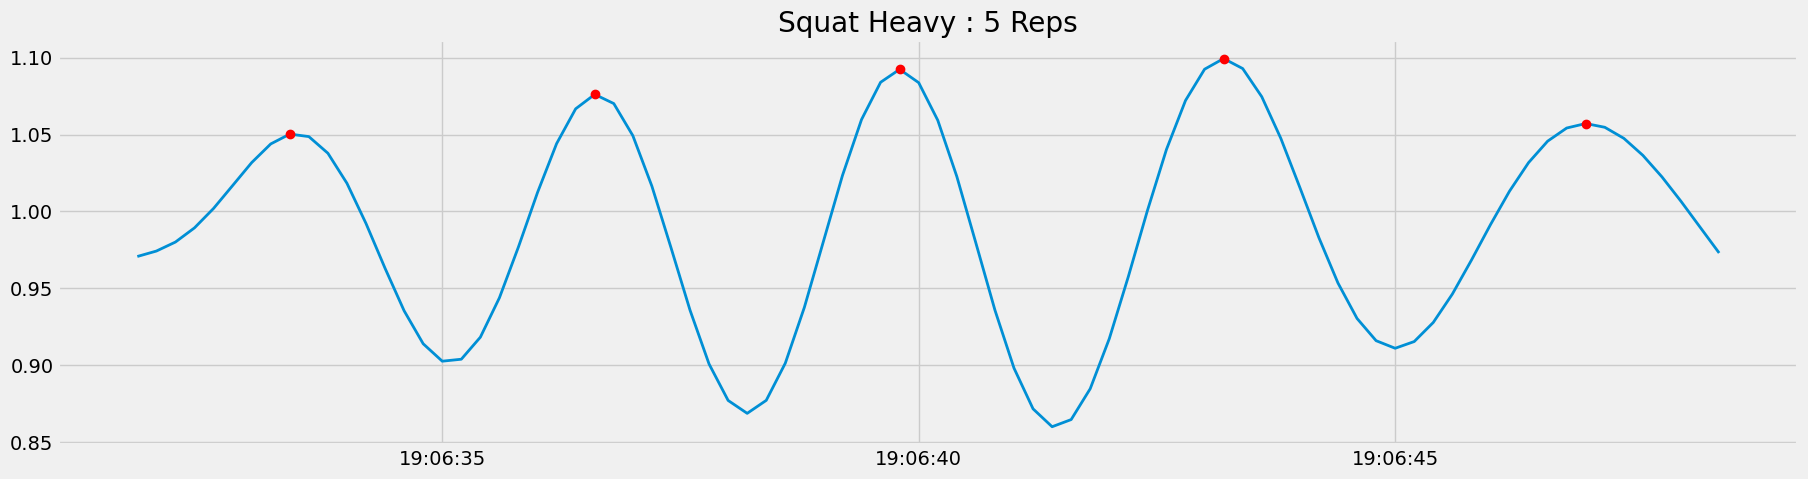

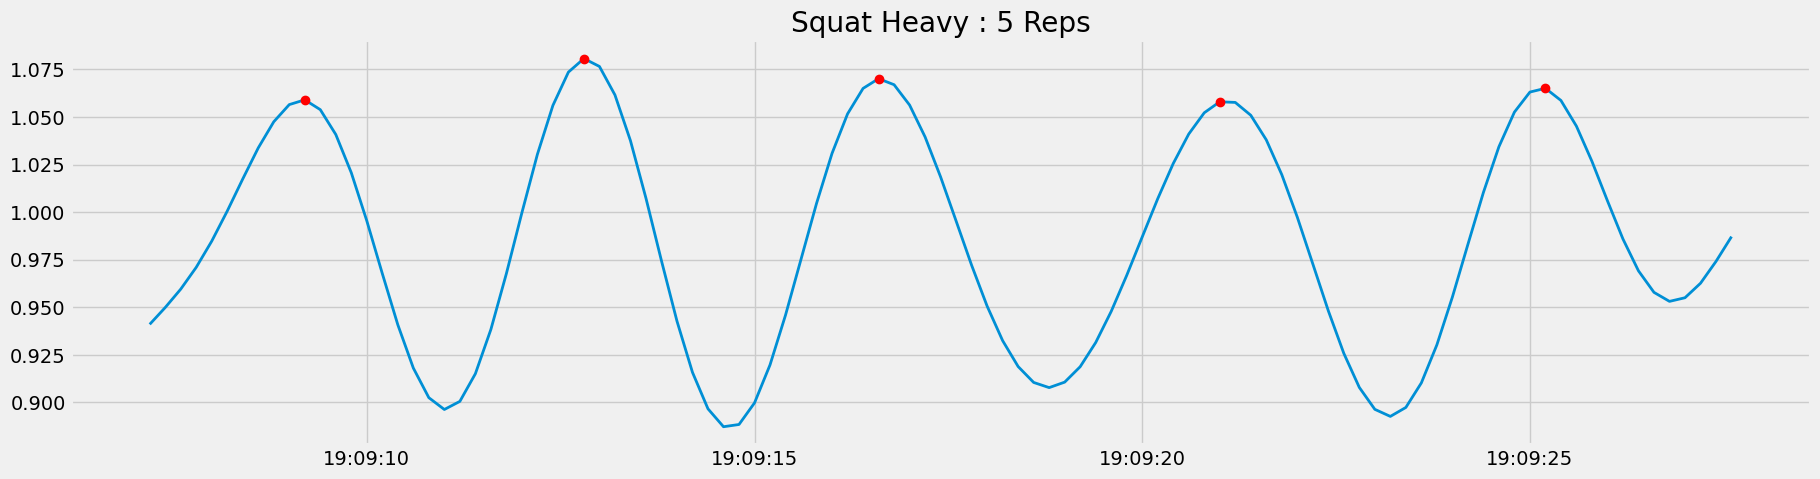

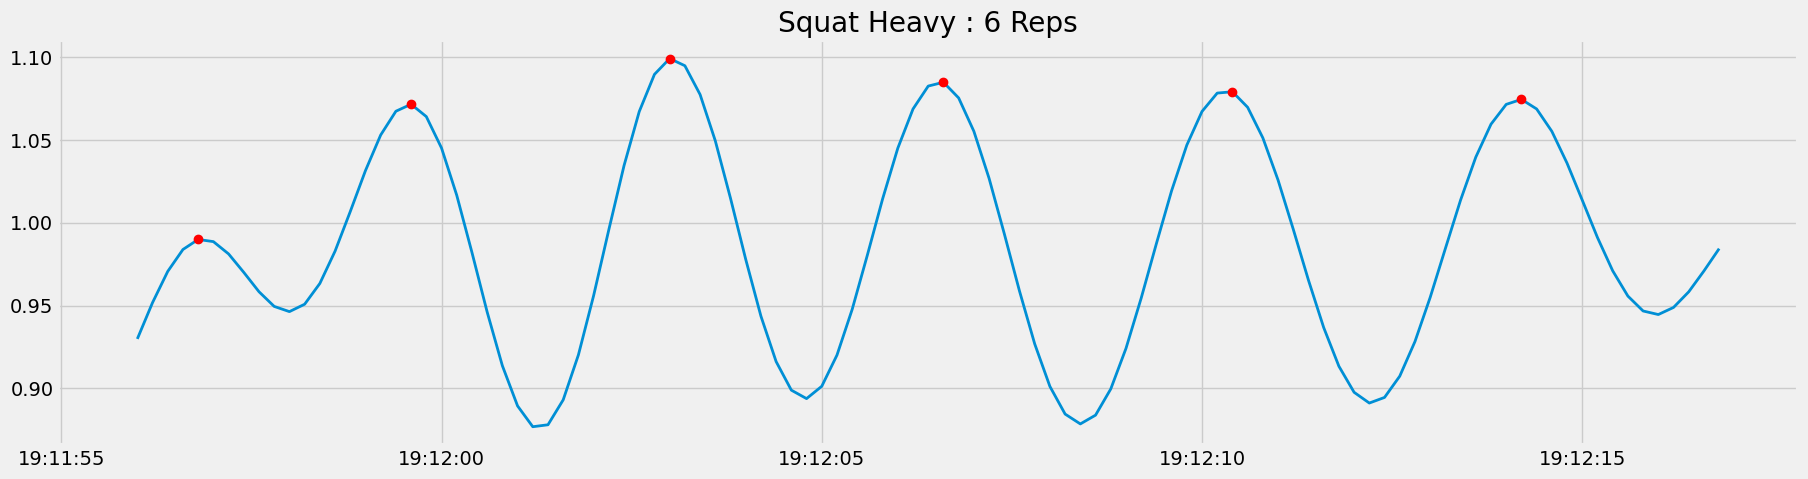

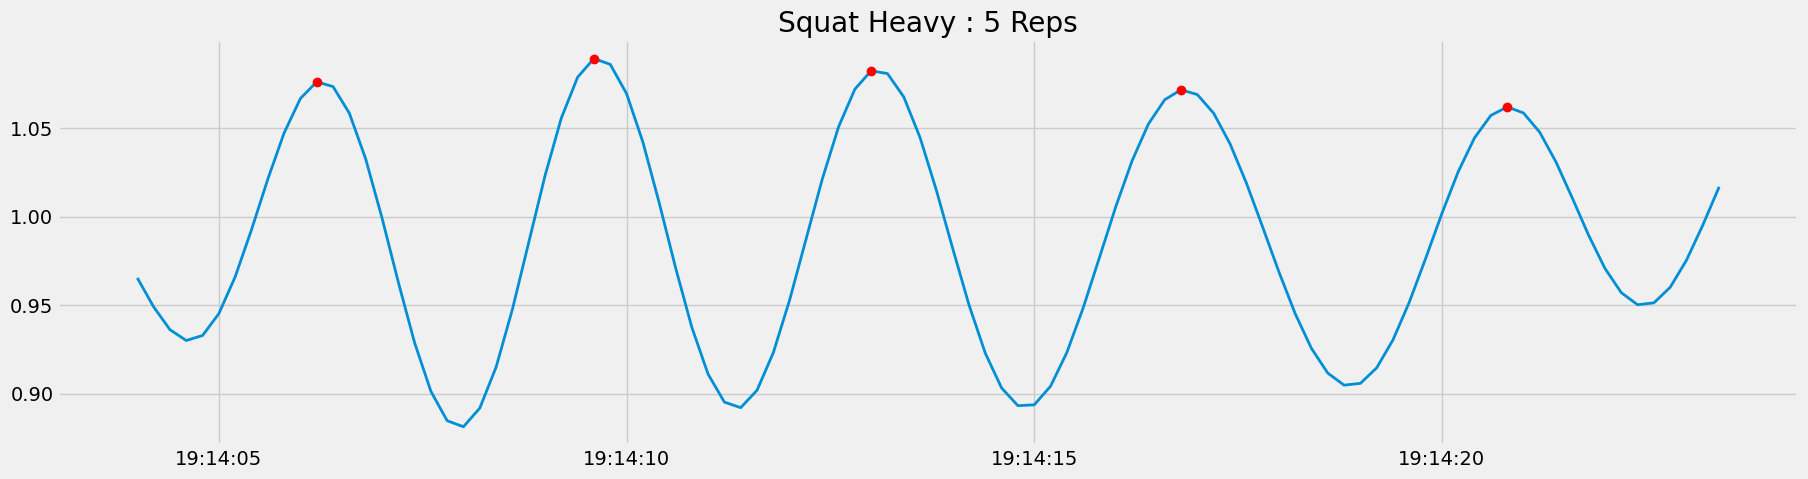

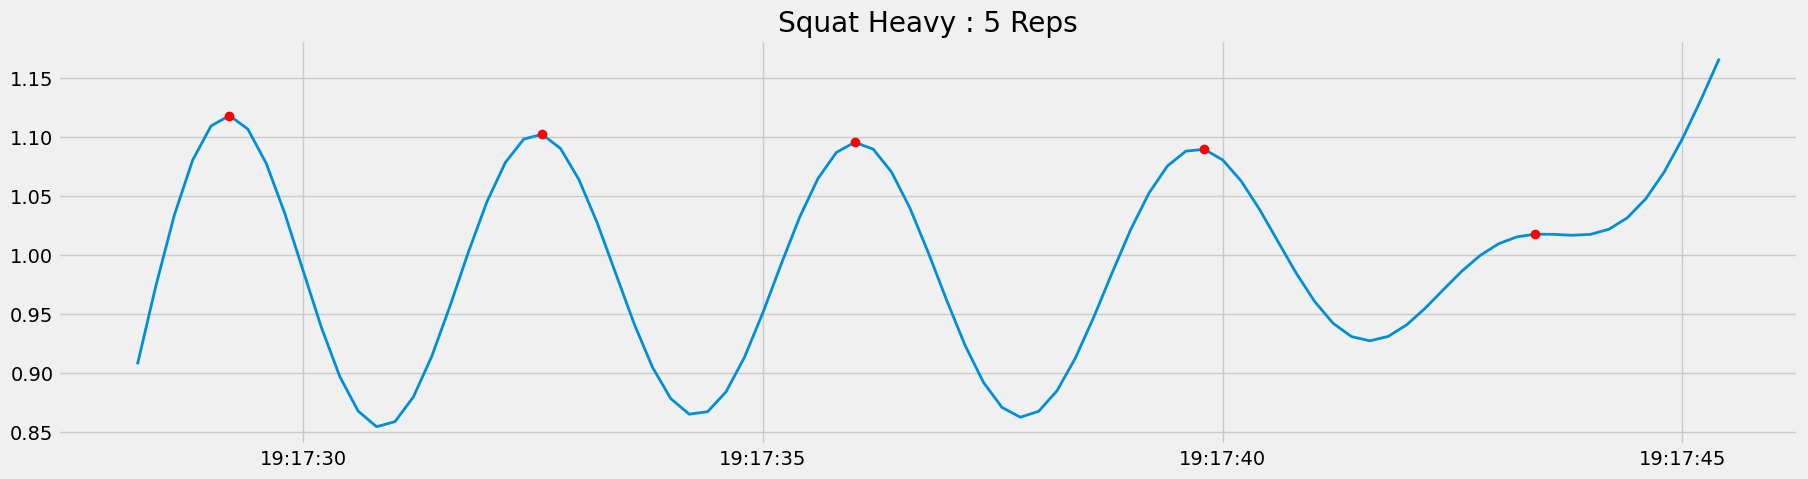

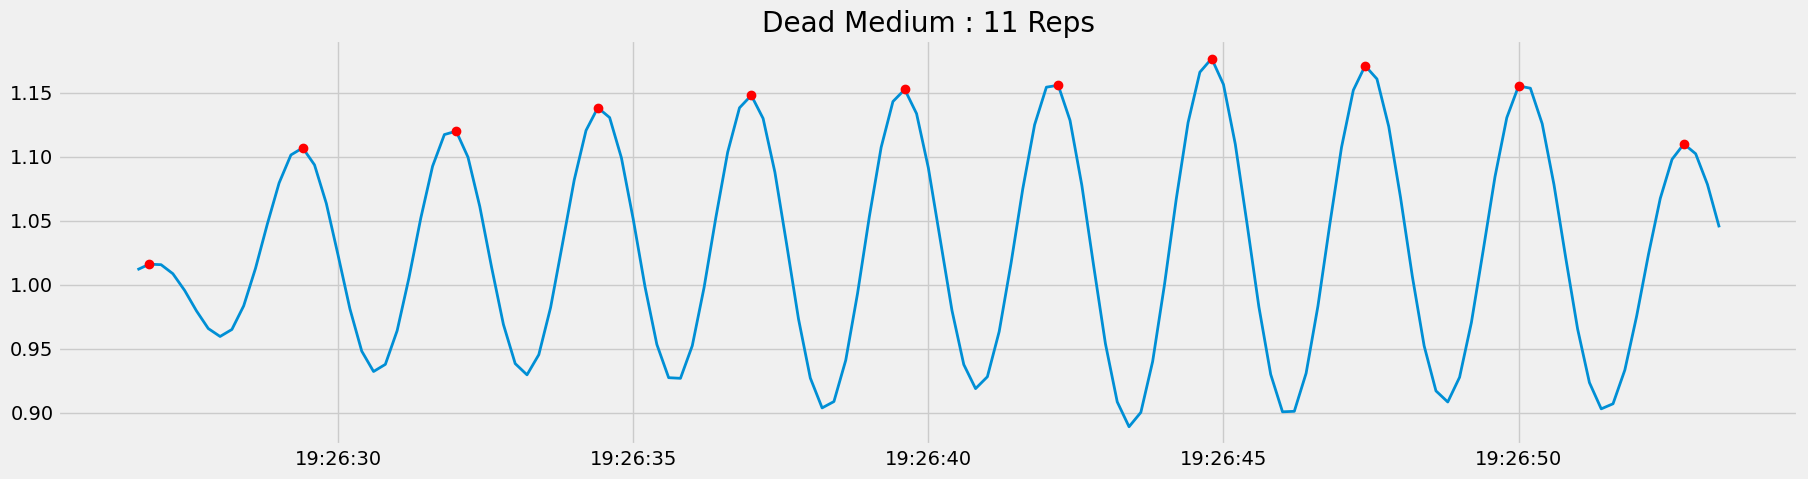

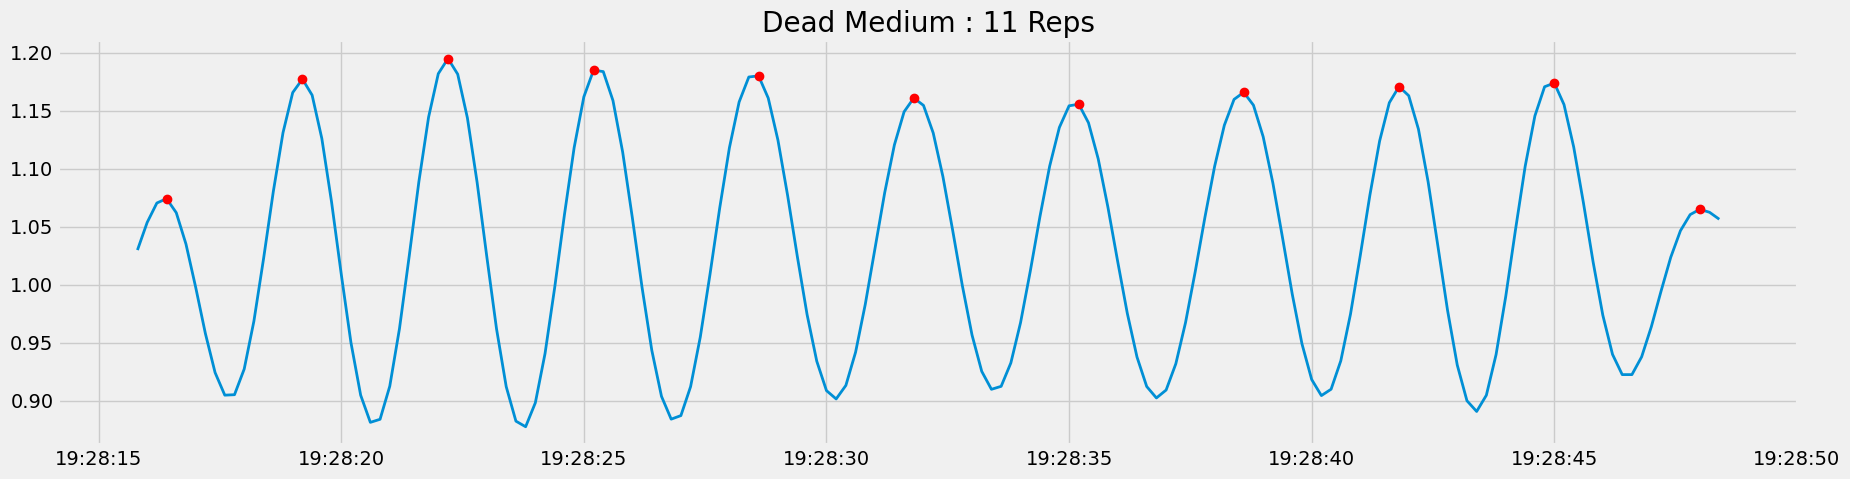

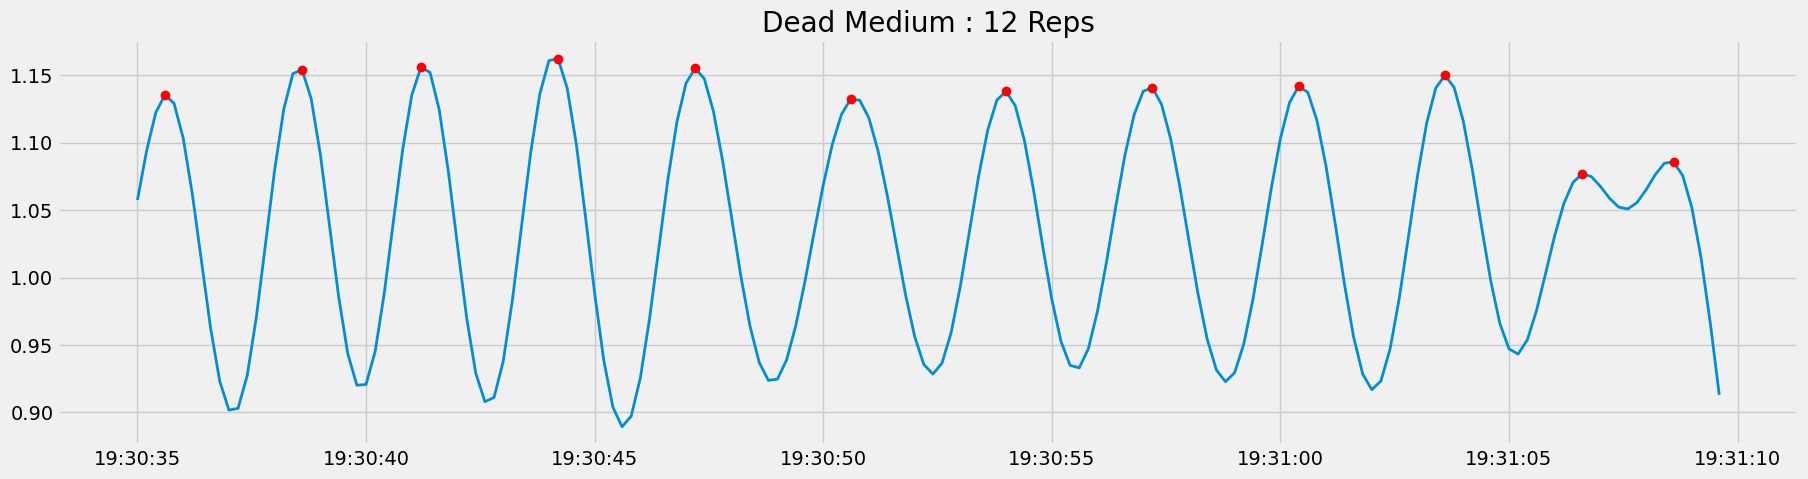

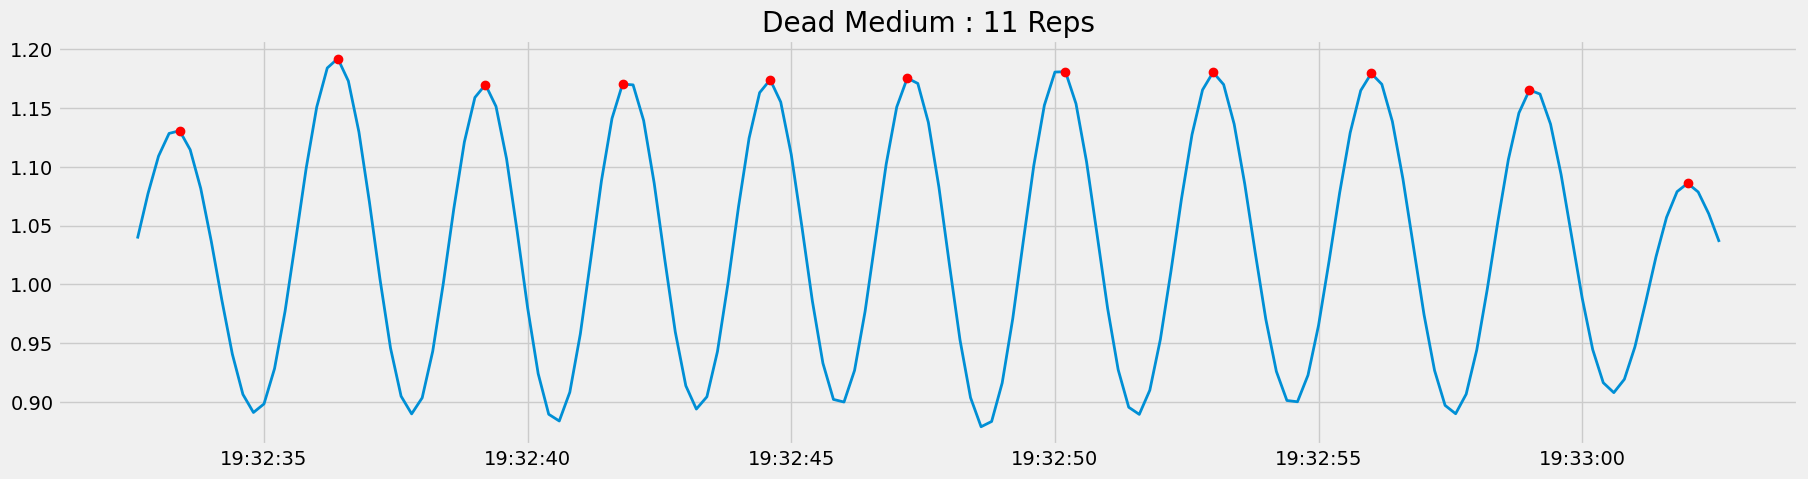

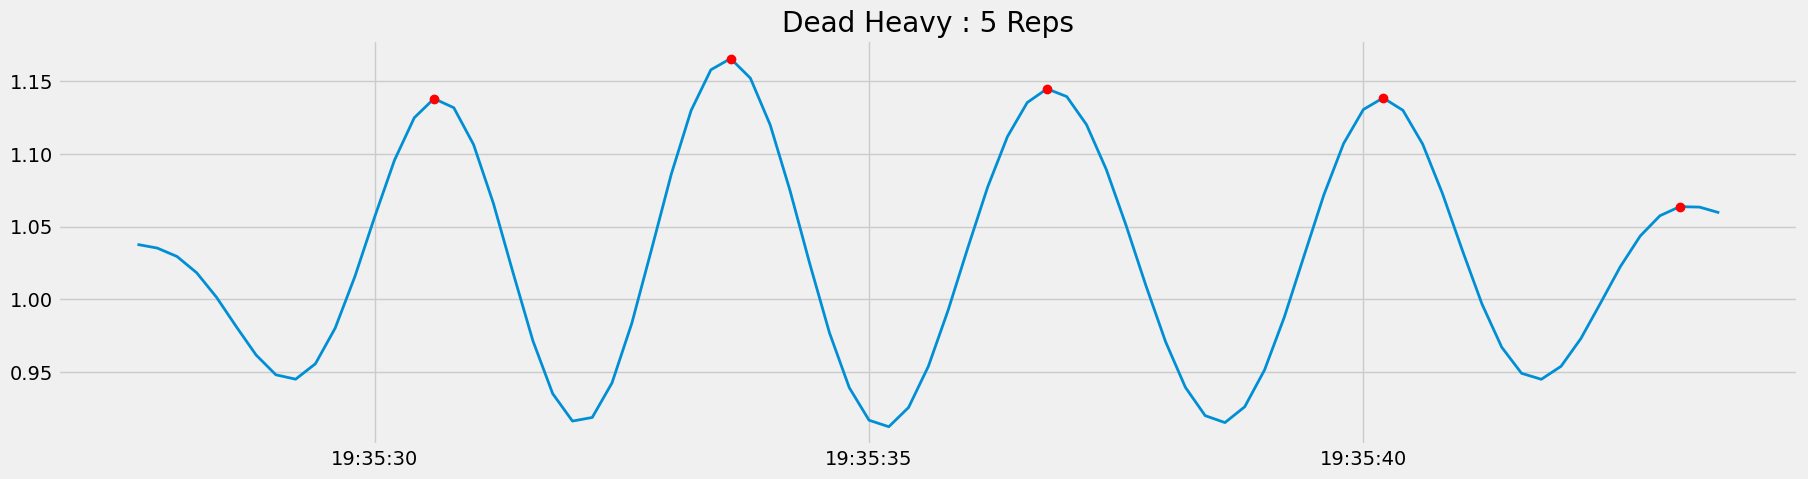

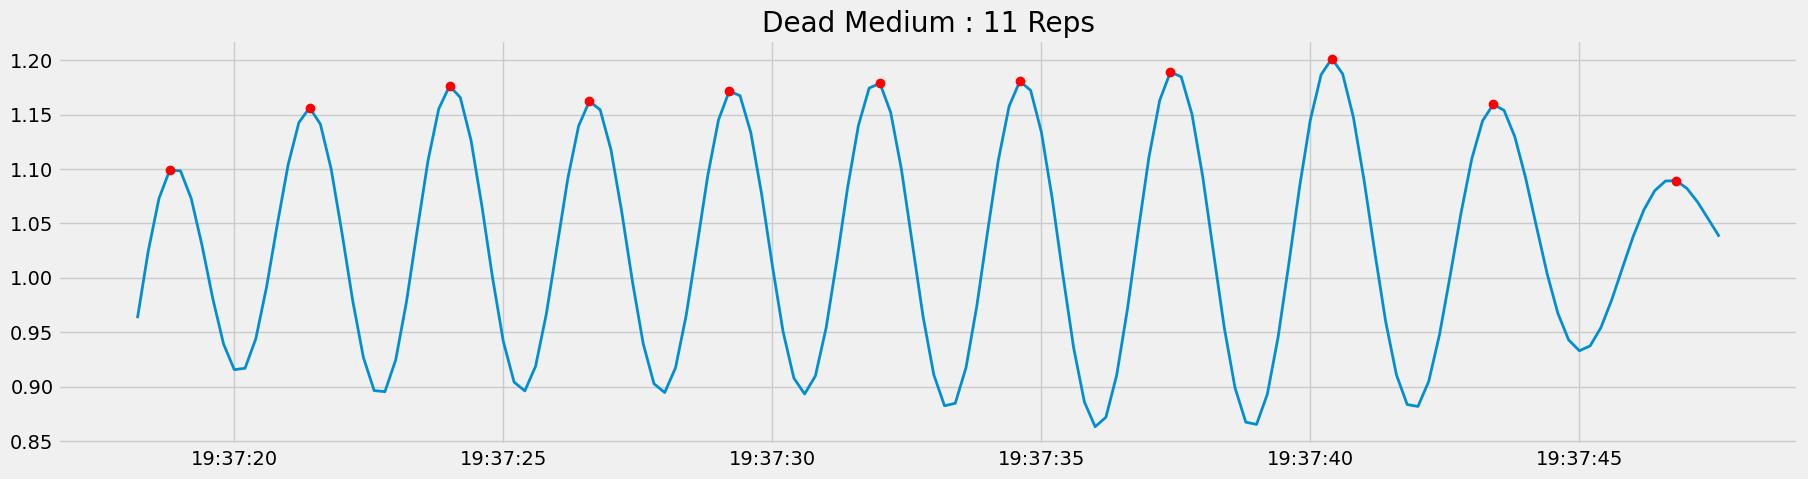

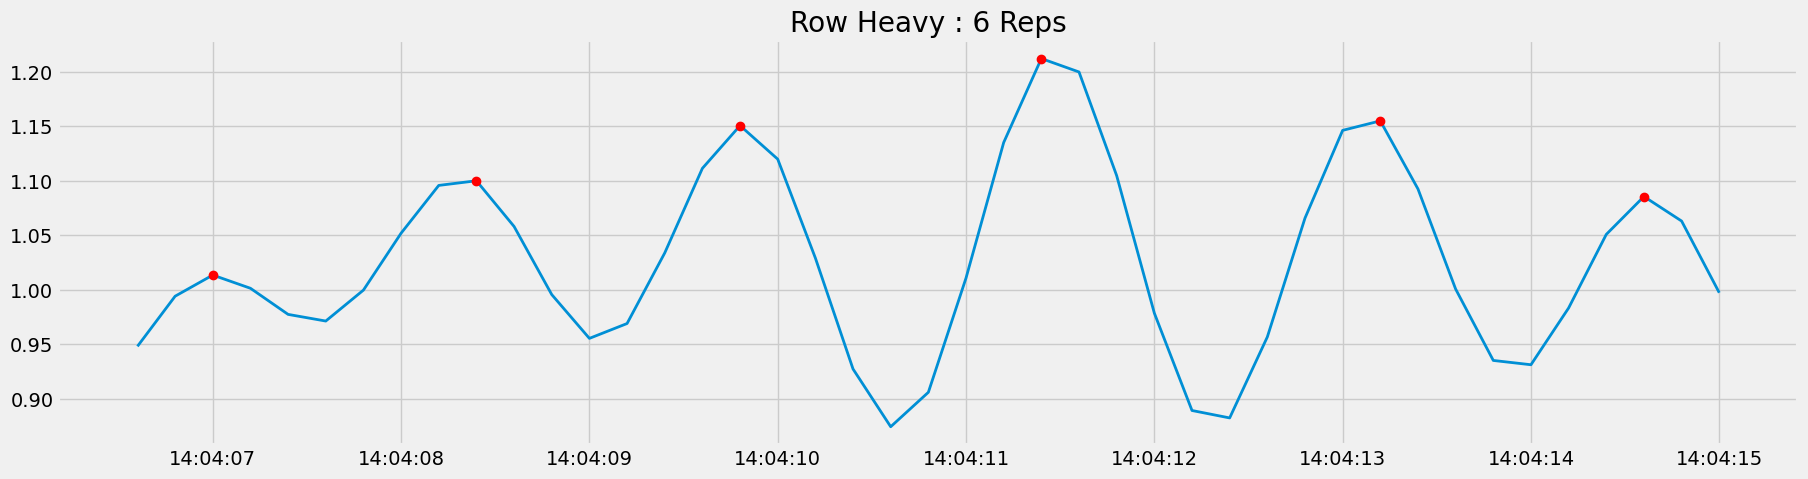

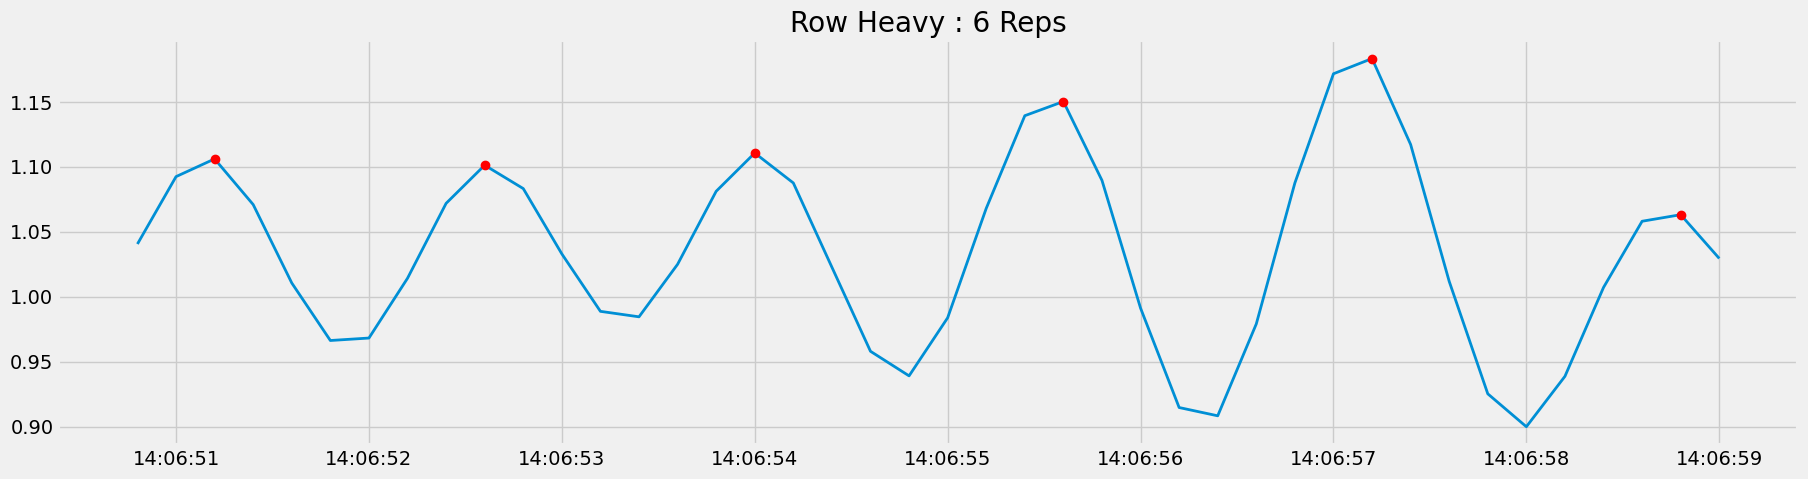

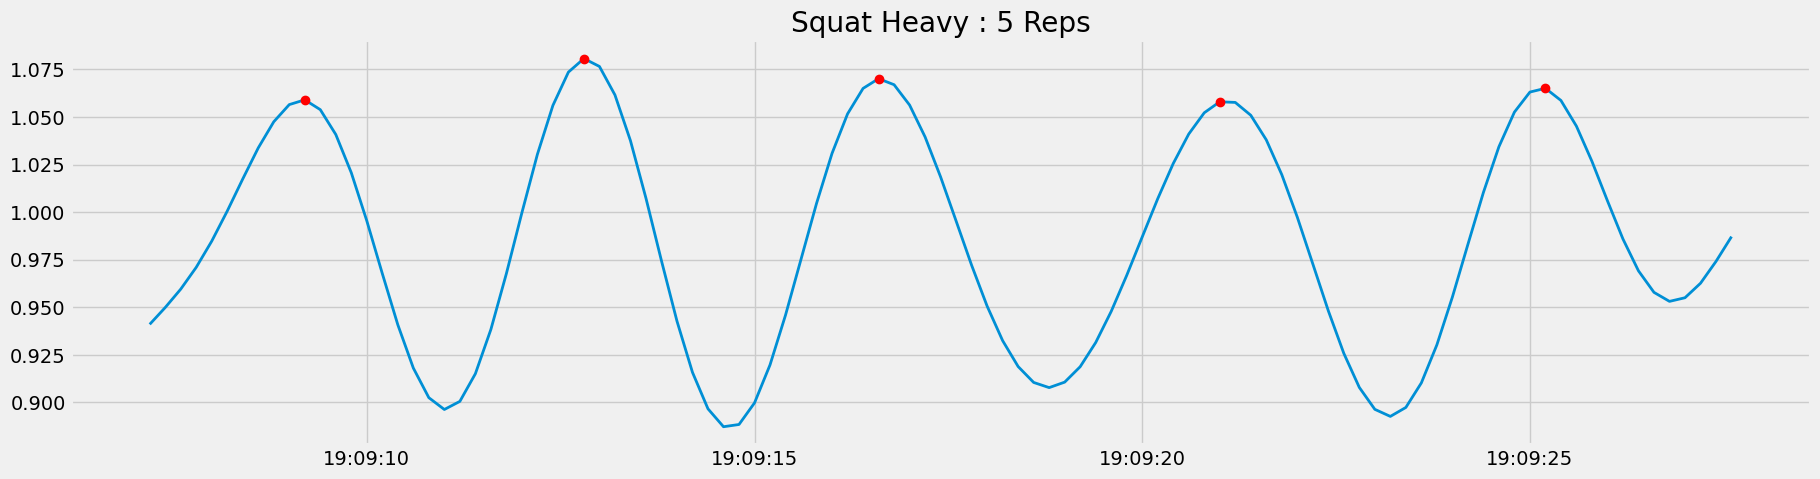

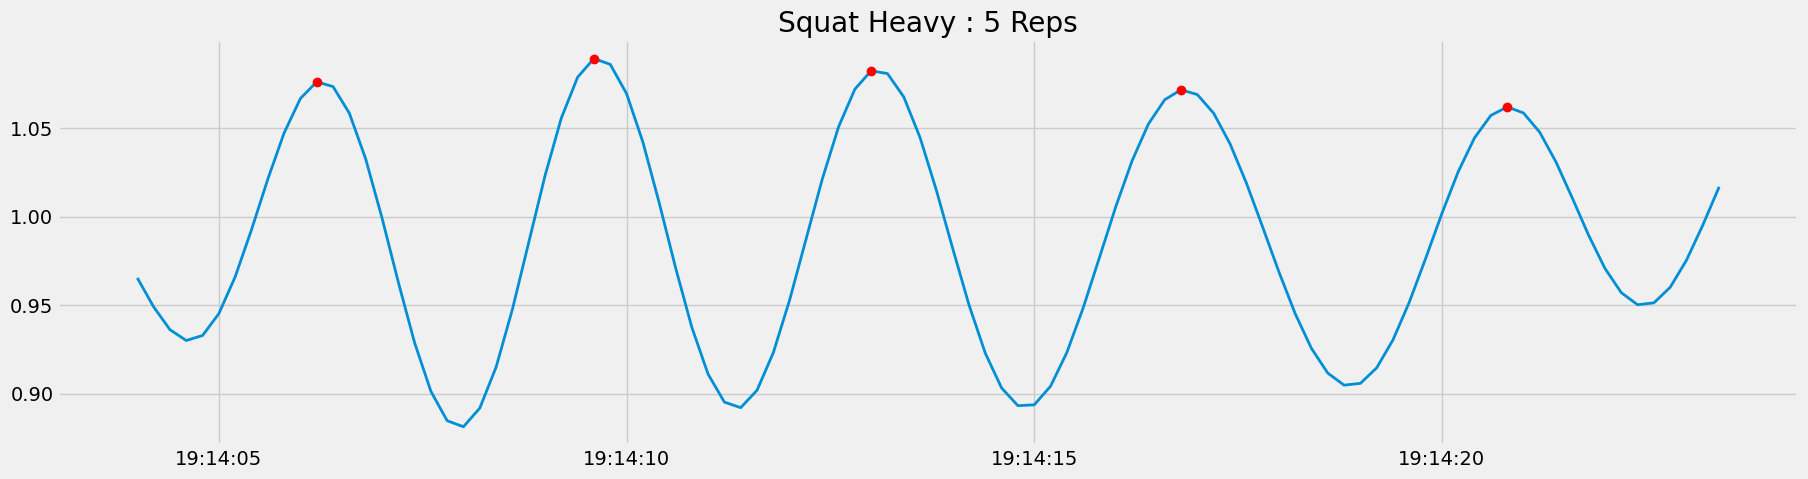

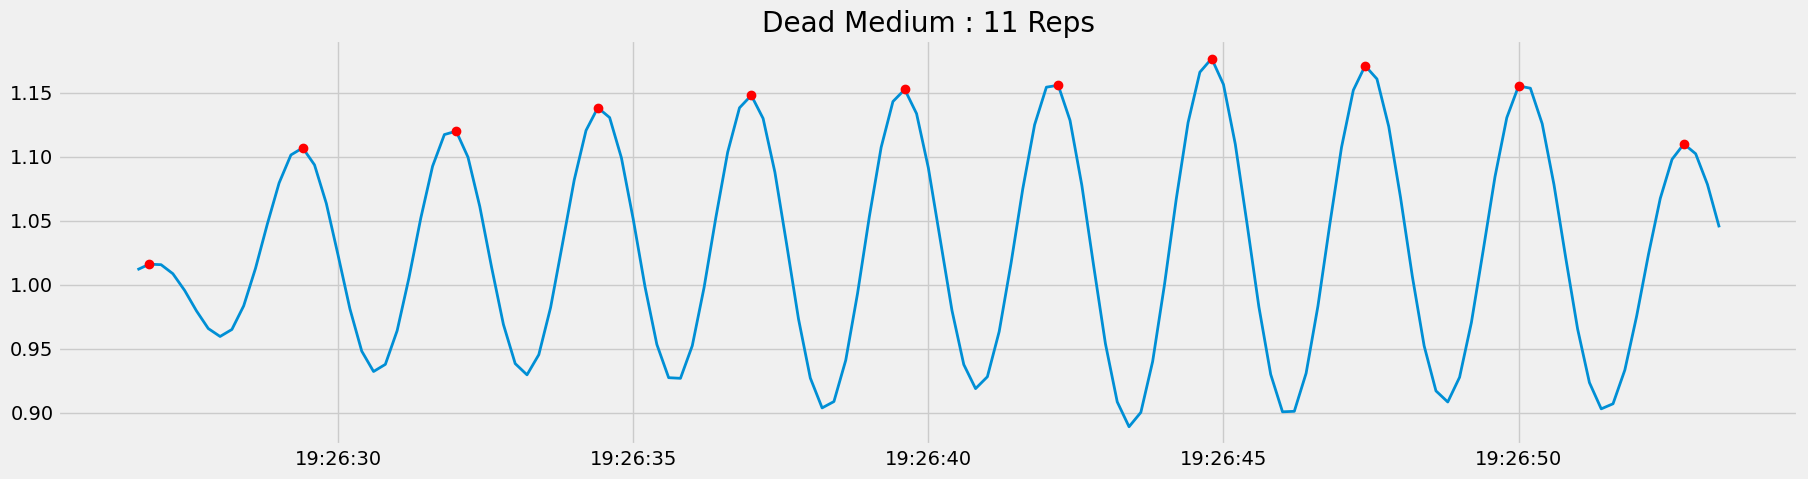

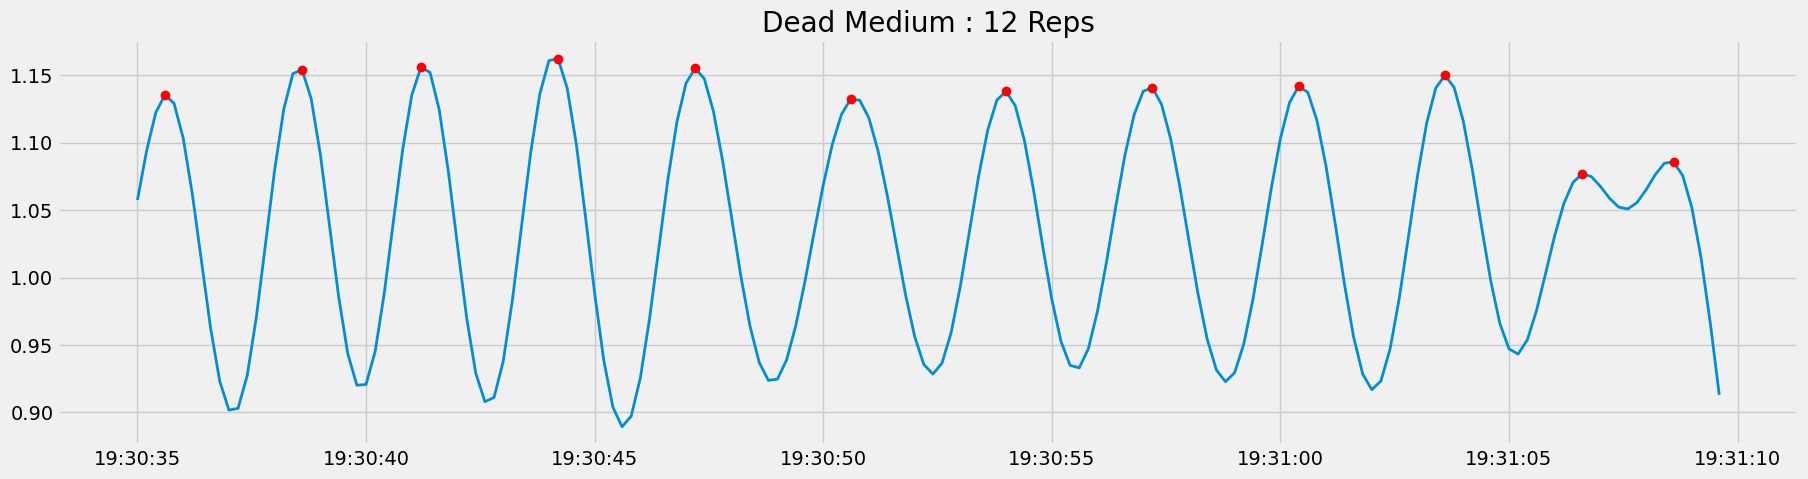

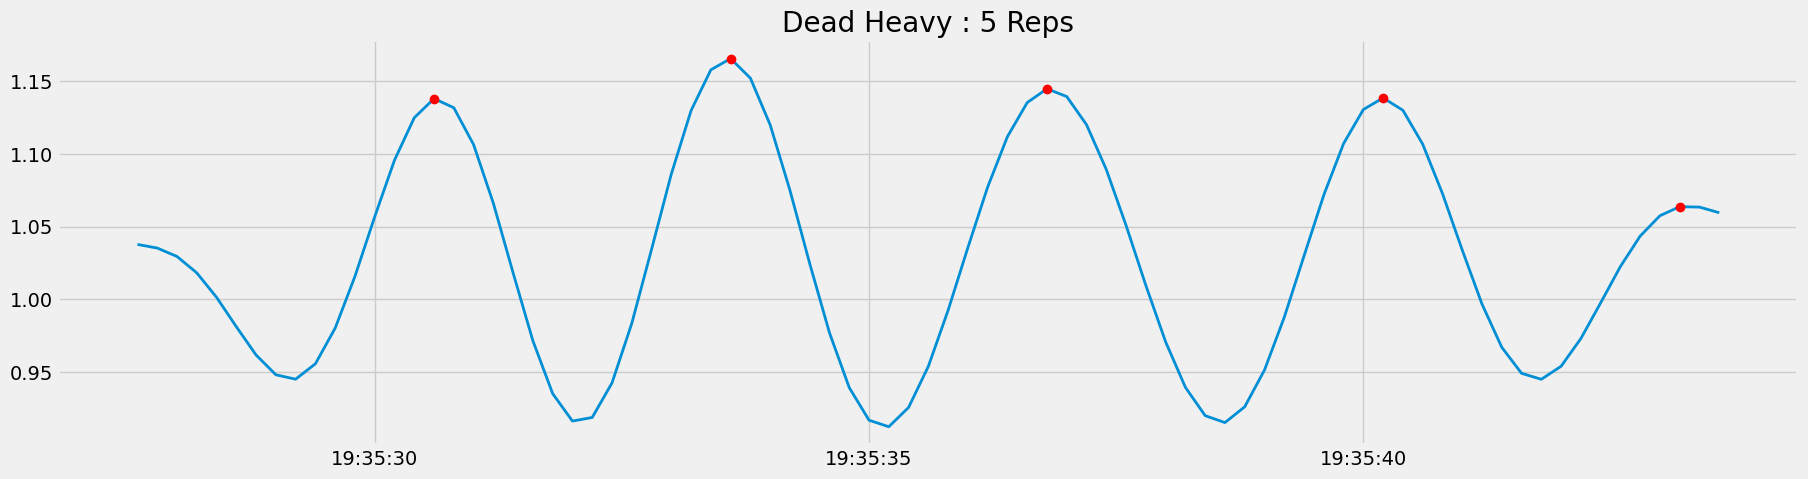

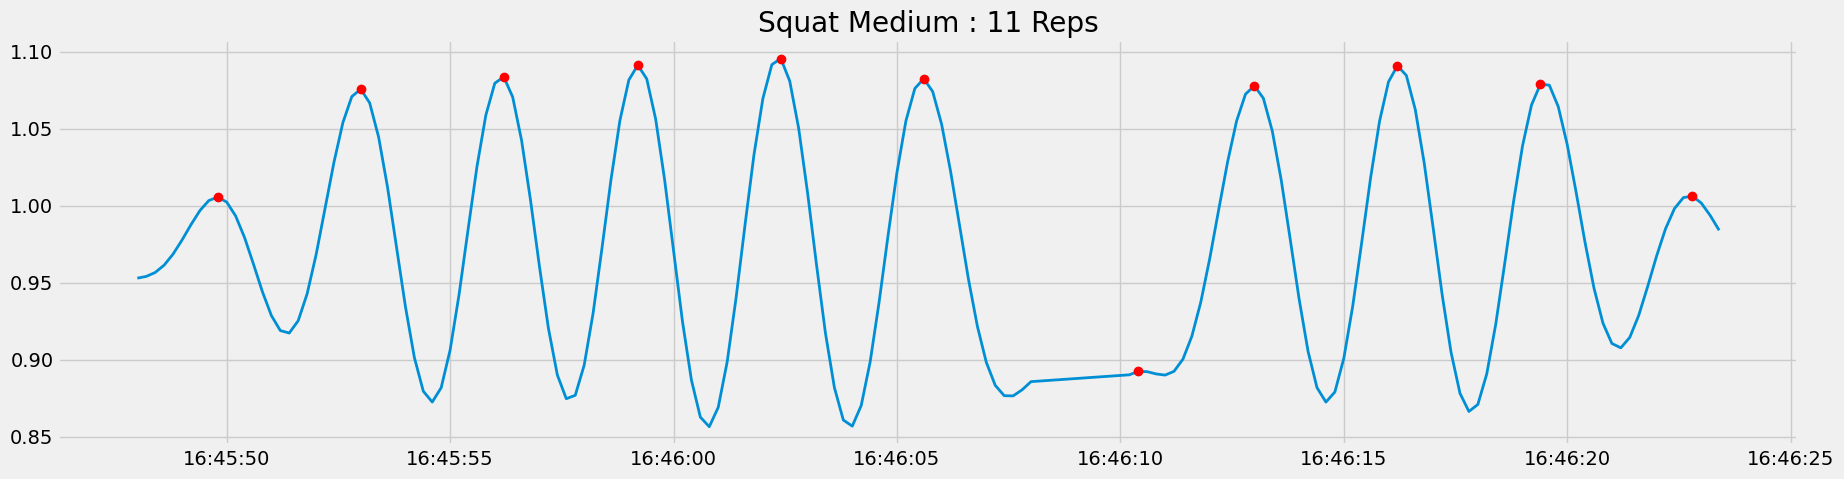

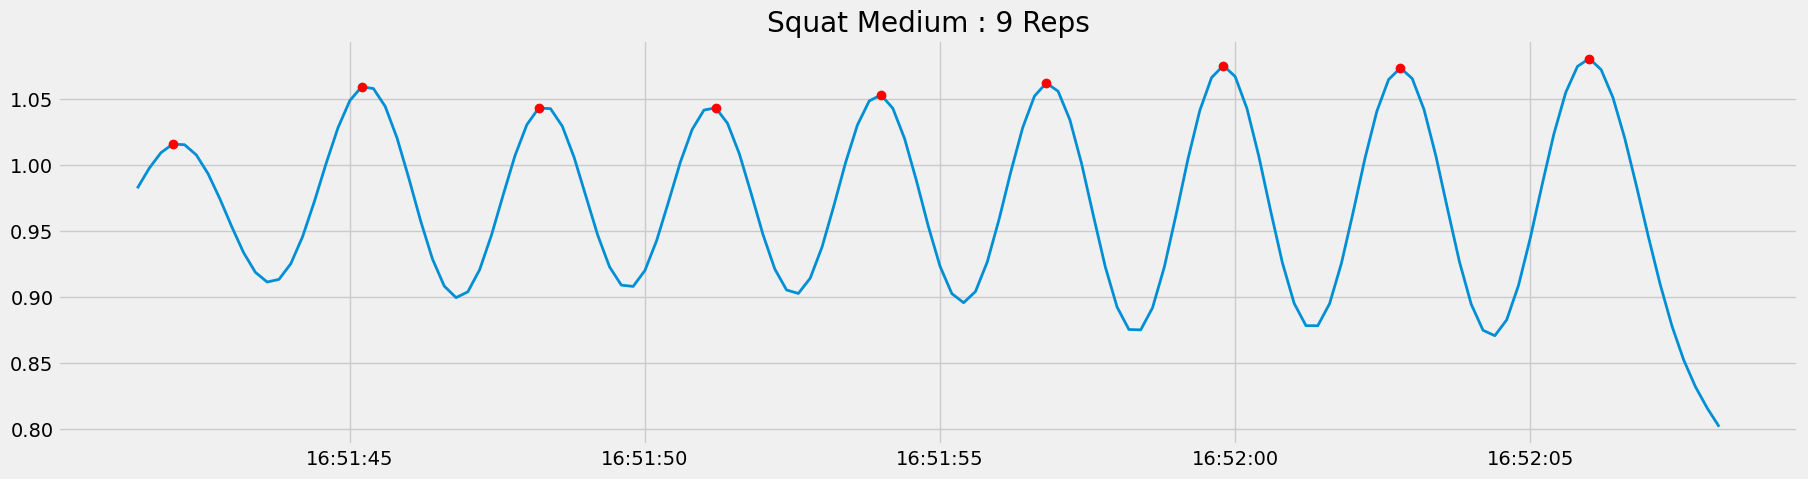

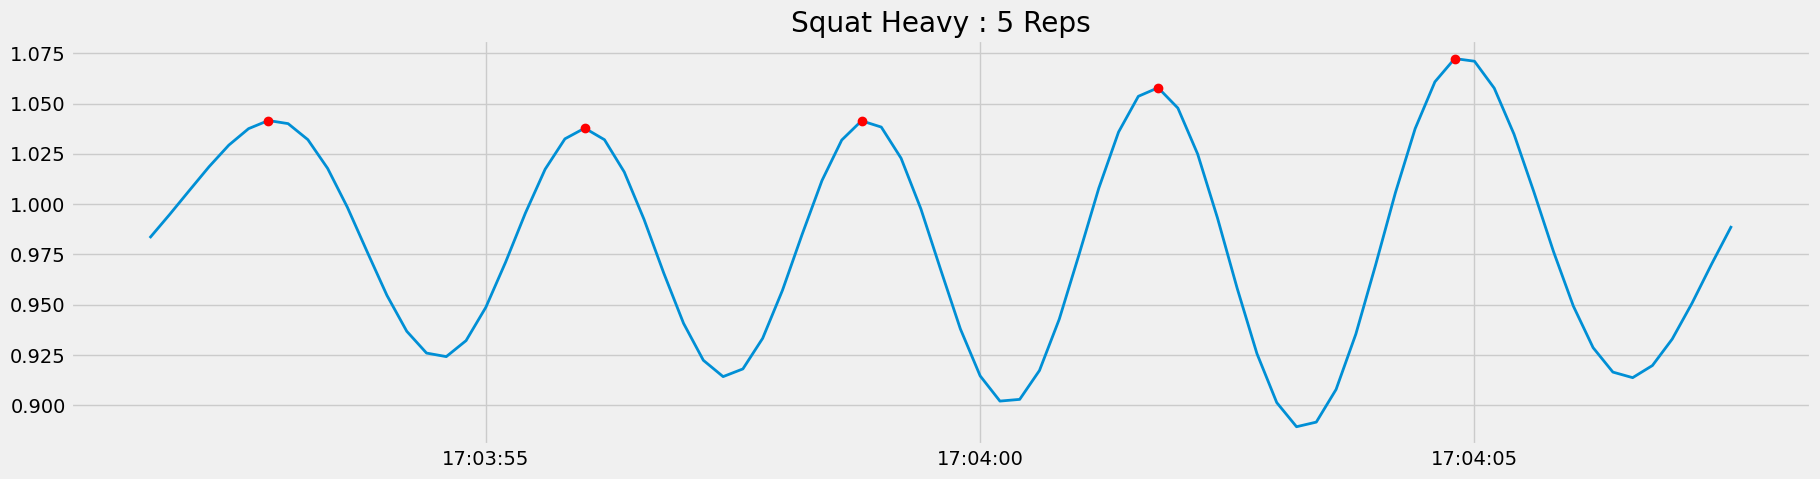

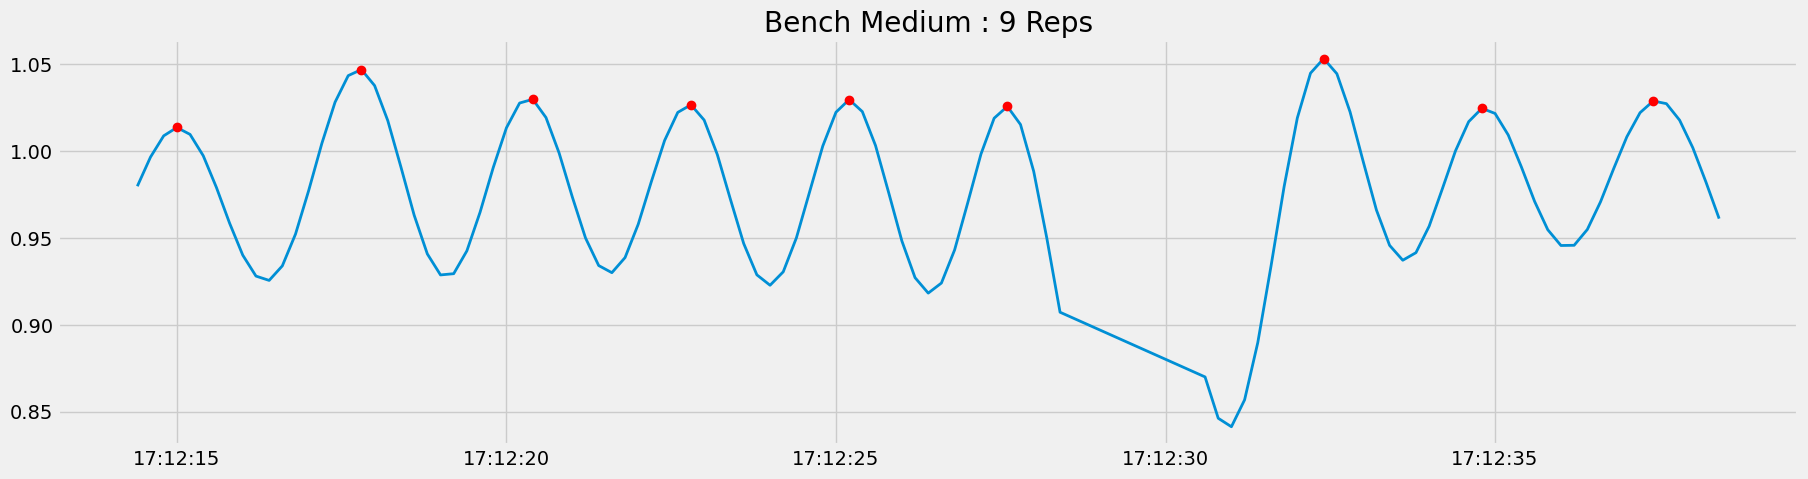

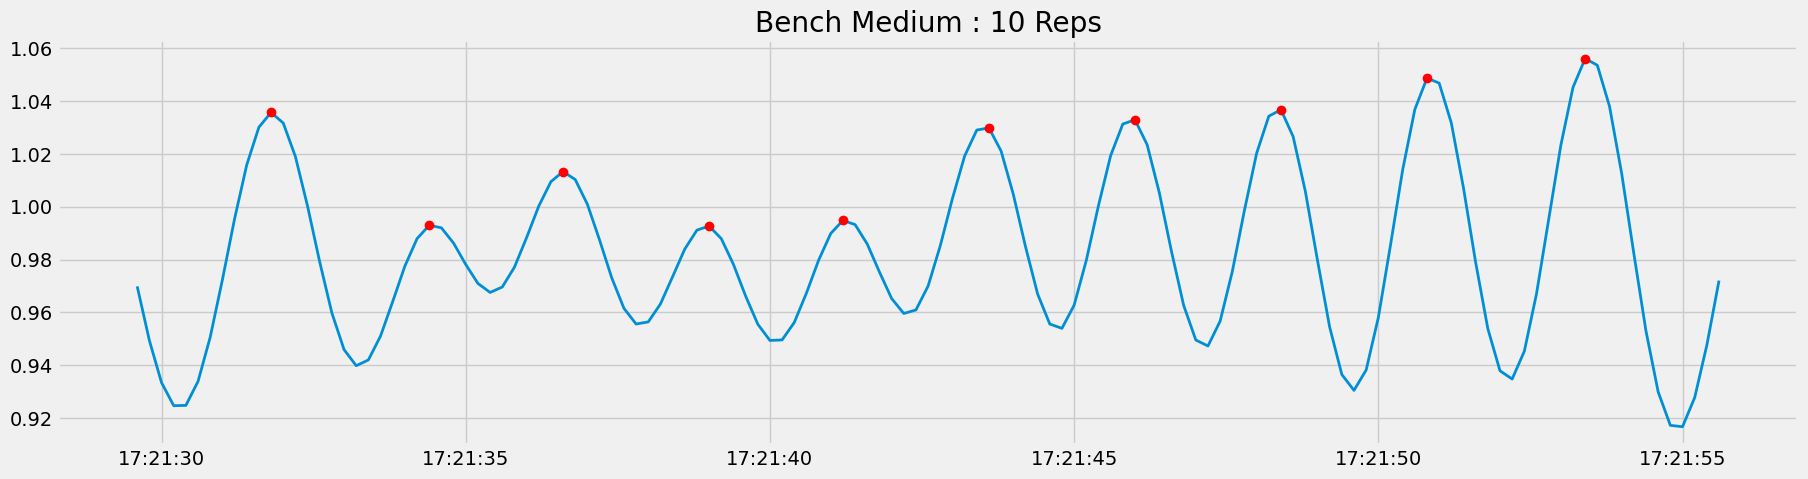

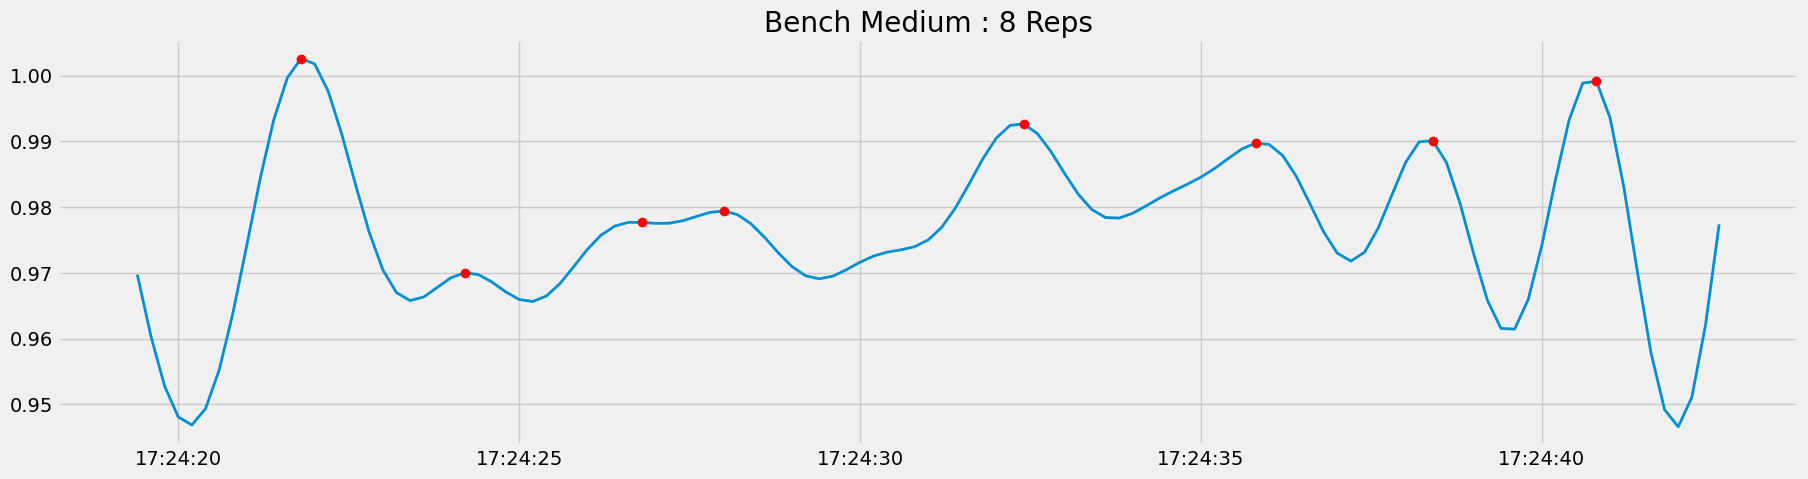

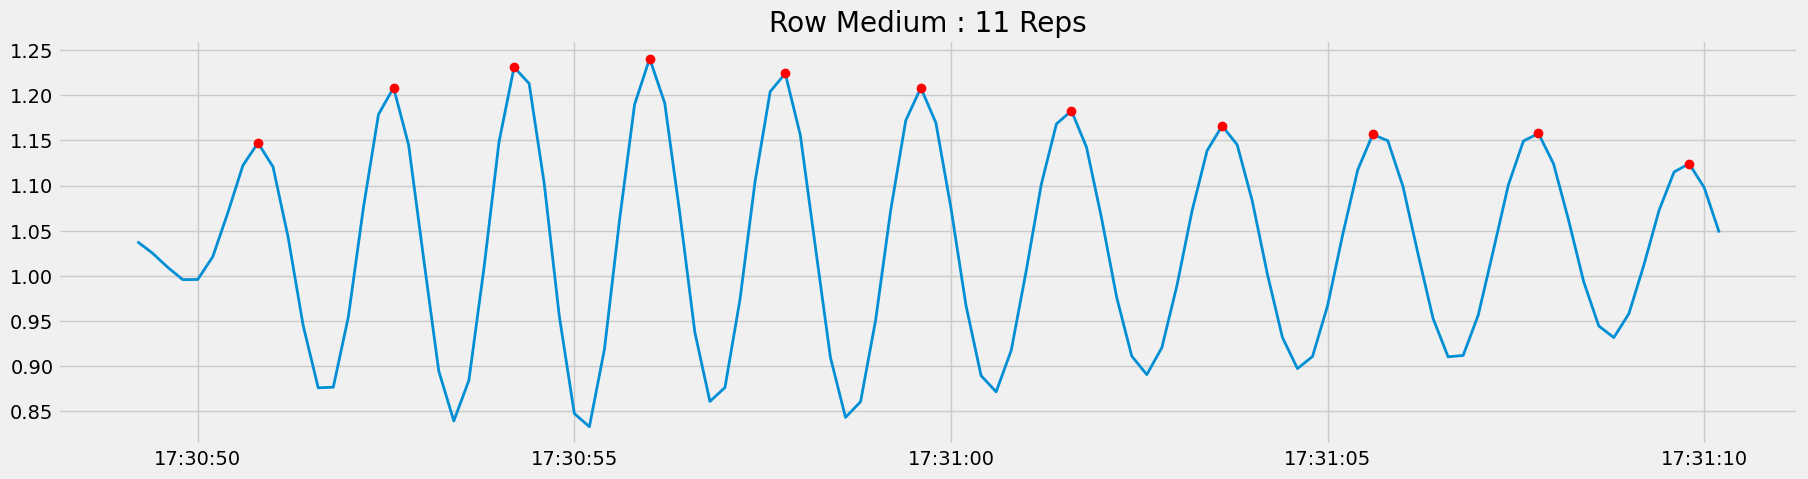

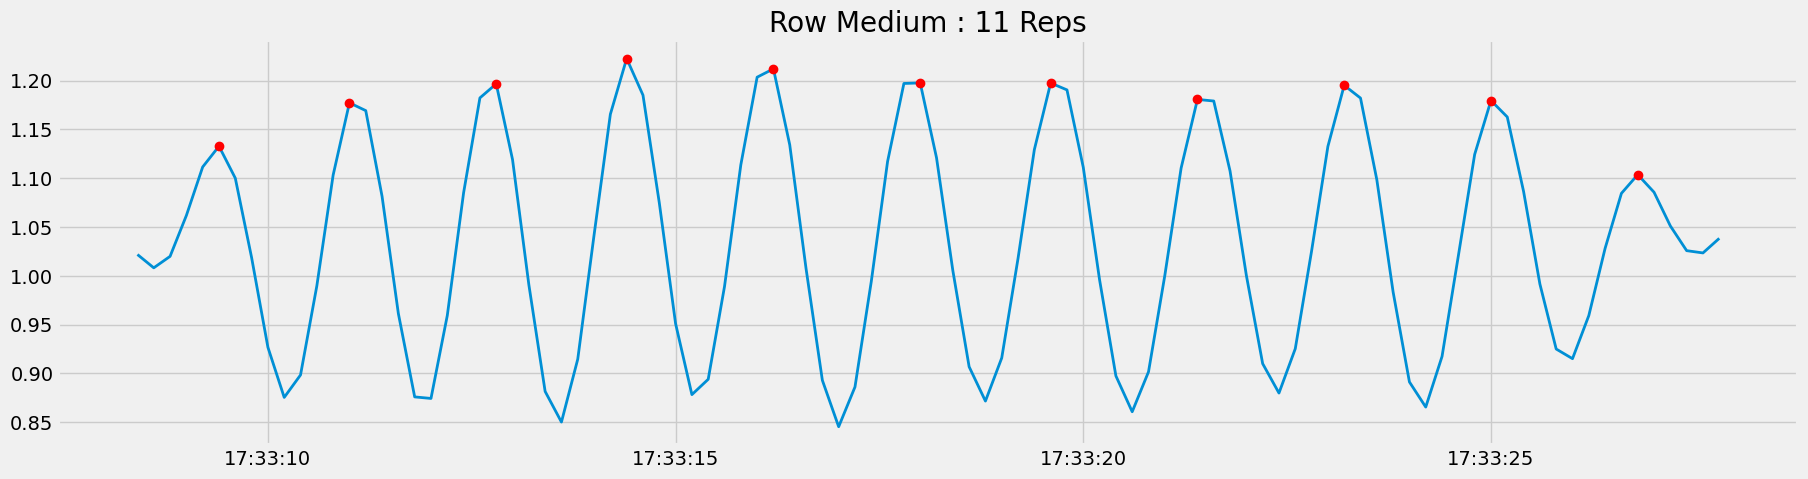

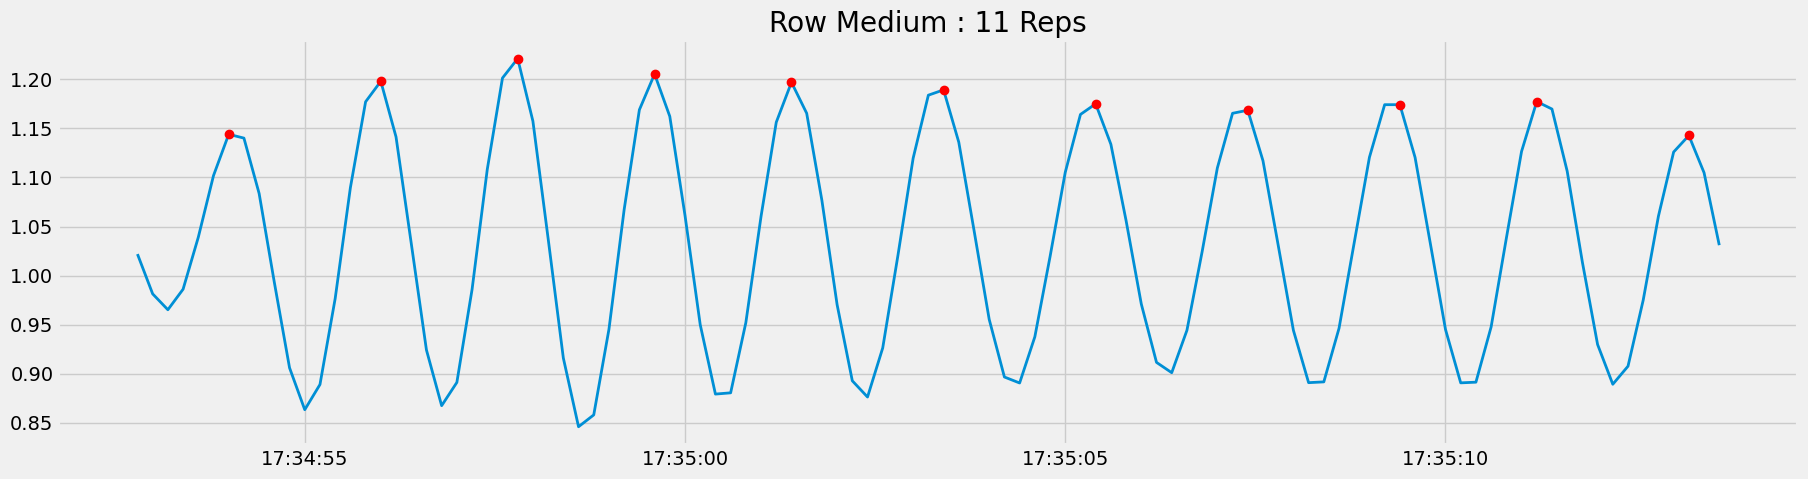

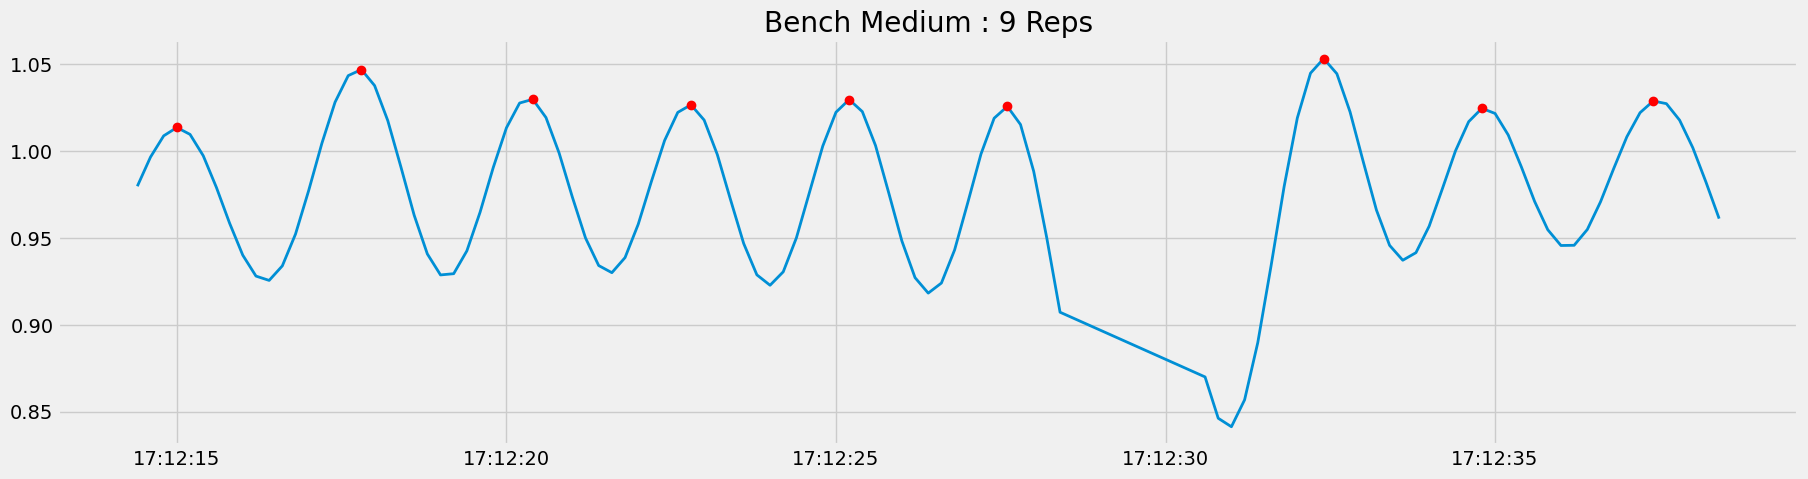

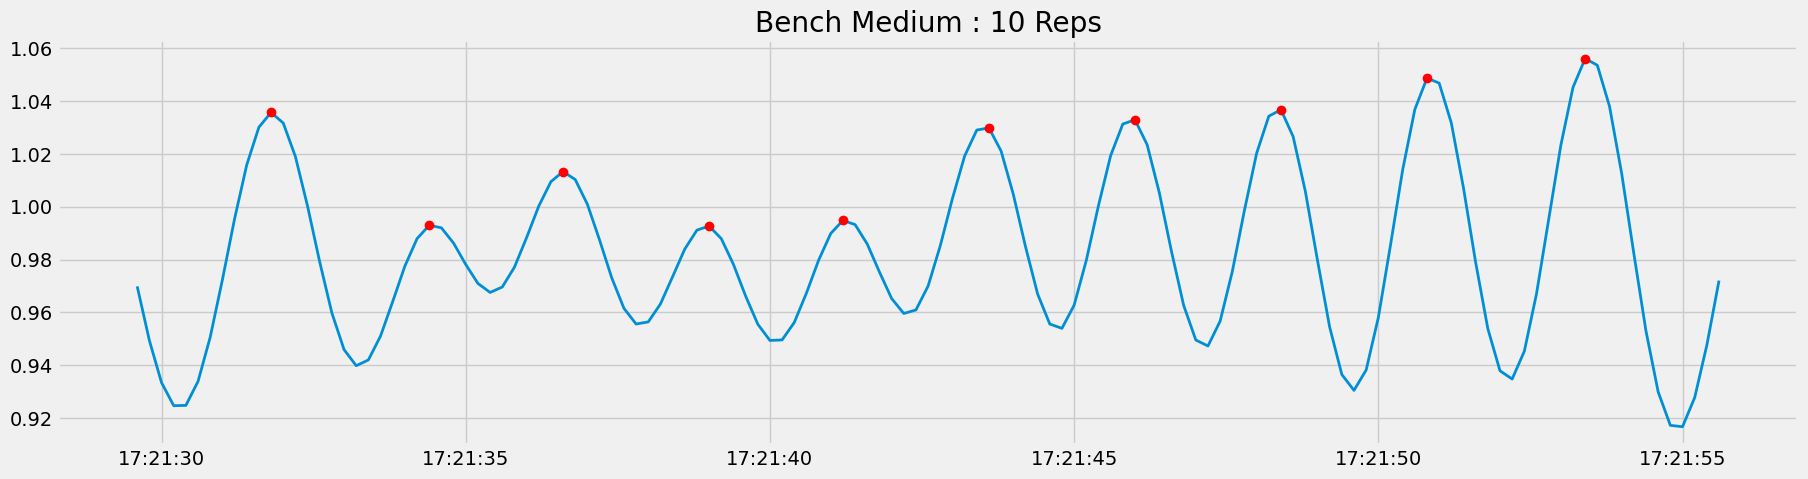

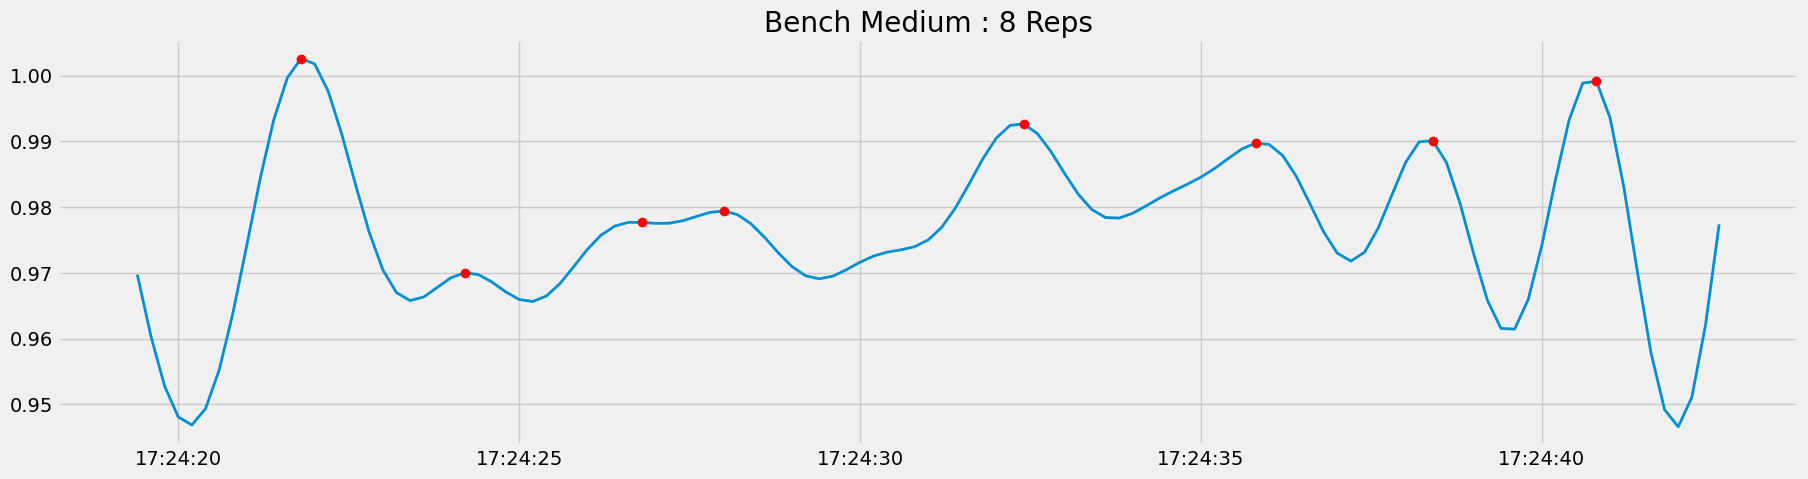

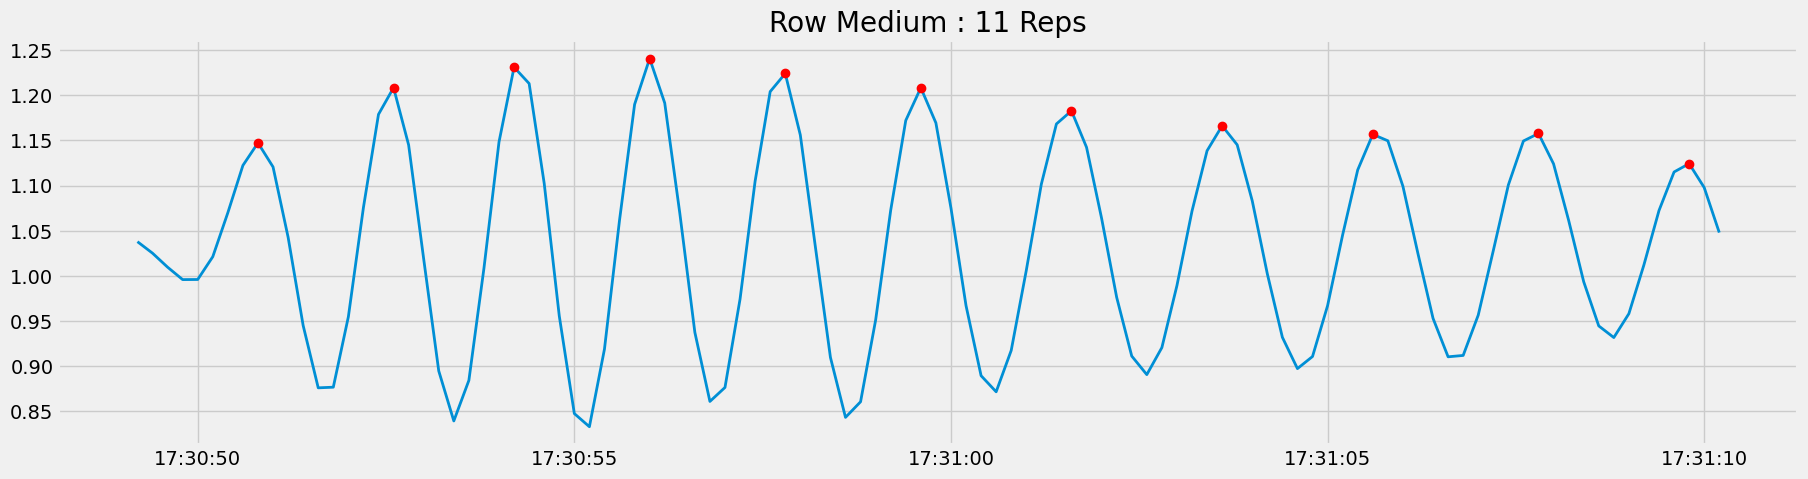

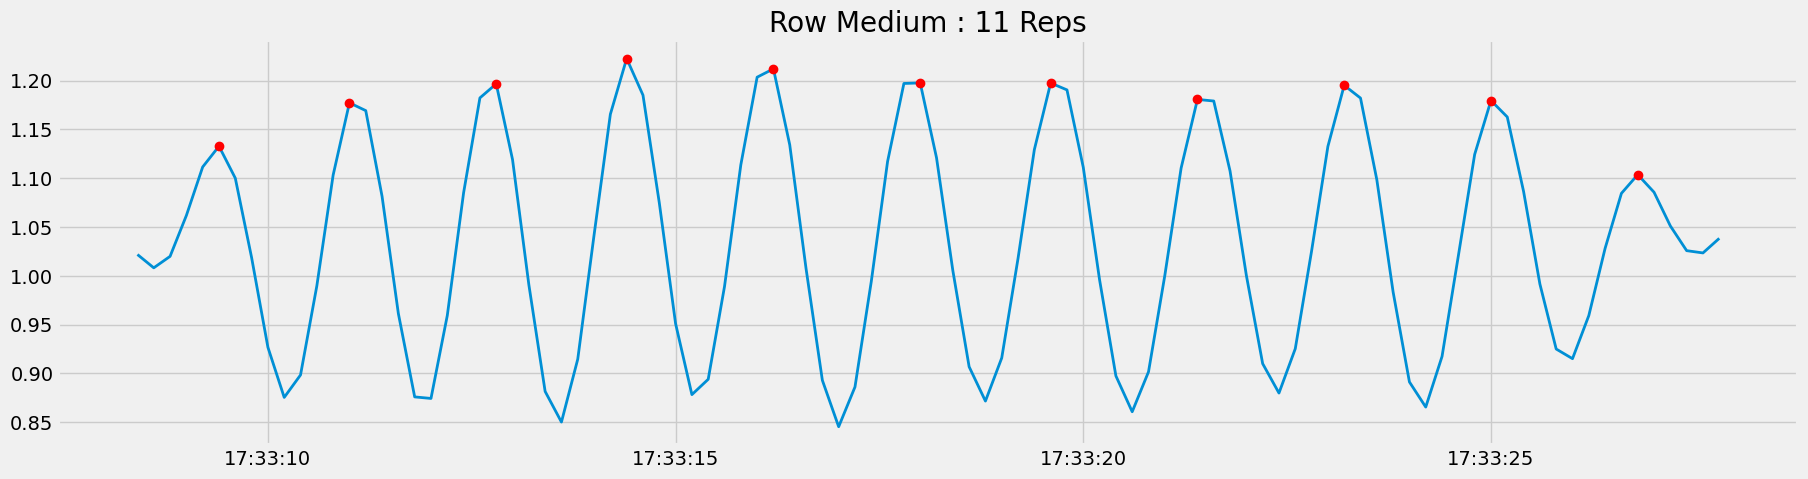

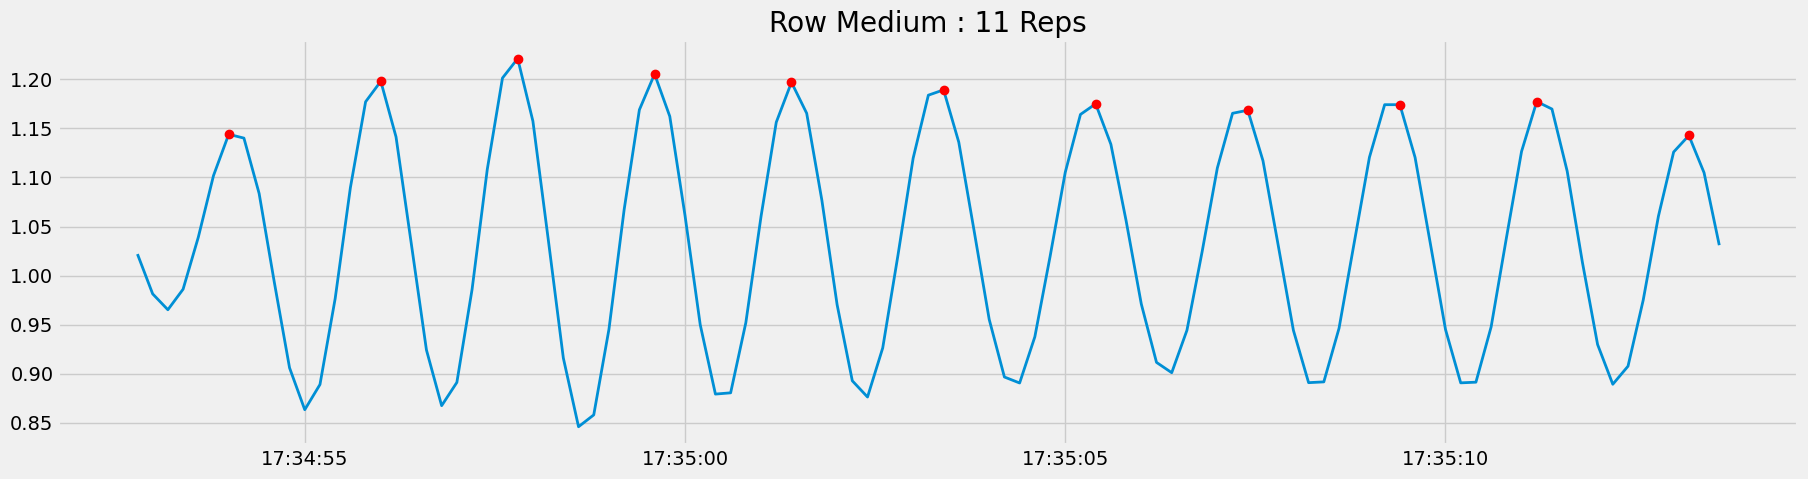

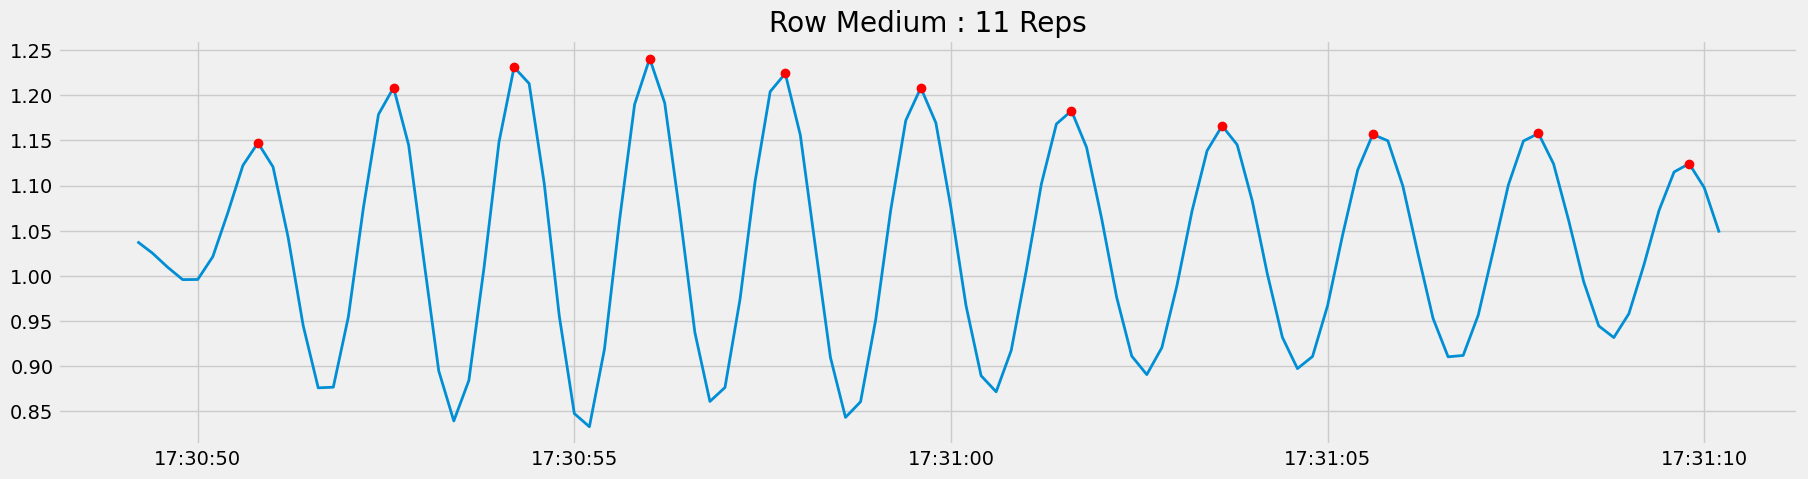

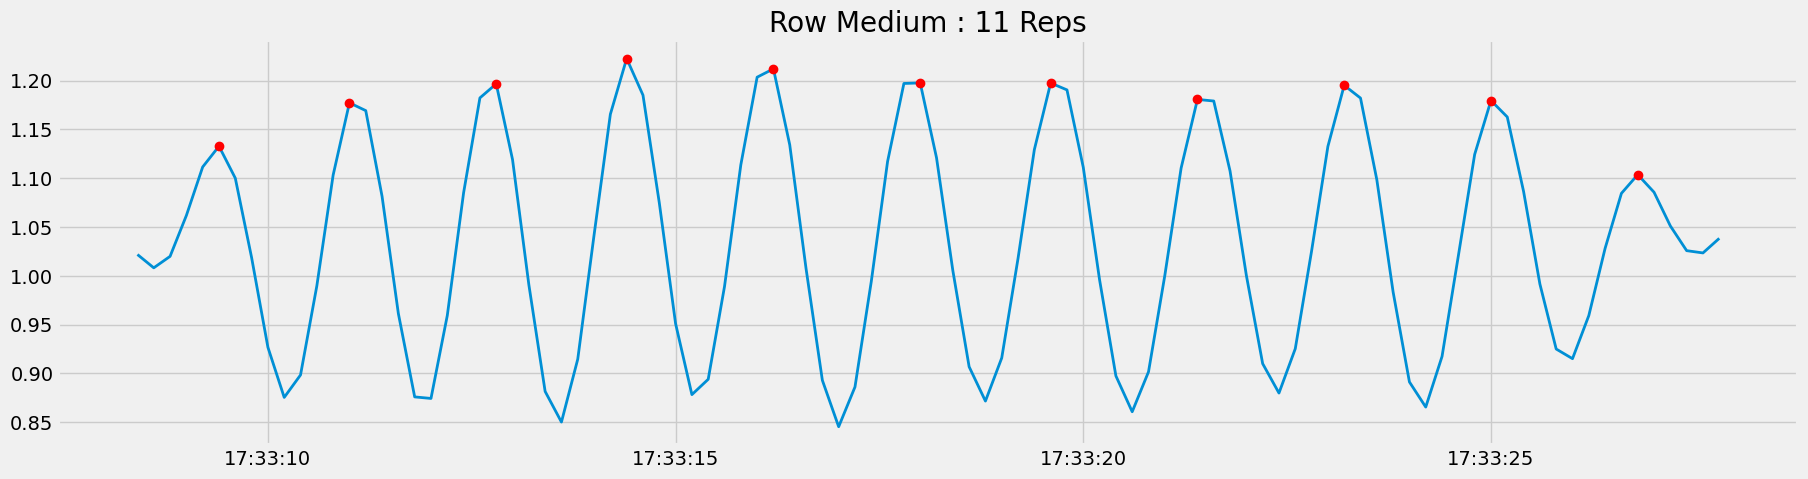

In [ ]:
rep_df["reps_pred"] = 0


for s in df["set"].unique():
    subset = df[df["set"] == s]

    column = "acc_r"
    cutoff = 0.4

    if subset["label"].iloc[0] == "squat":
        cutoff =0.35

    if subset["label"].iloc[0] == "row":
        cutoff = 0.65
        col = "gyr_x"

    if subset["label"].iloc[0] == "ohp":
        cutoff = 0.35

    reps = count_reps(subset,cutoff=cutoff,column=column)

    rep_df.loc[rep_df["set"] == s,"reps_pred"] = reps

In [ ]:
rep_df

label category  set  reps  reps_pred
0   bench    heavy    1     5          5
1   bench    heavy    2     5          4
2   bench    heavy    3     5          5
3   bench    heavy    4     5          5
4   bench    heavy   30     5          5
..    ...      ...  ...   ...        ...
80  squat   medium   28    10          8
81  squat   medium   29    10          8
82  squat   medium   38    10          7
83  squat   medium   63    10         11
84  squat   medium   64    10          9

[85 rows x 5 columns]

In [ ]:
error = mean_absolute_error(rep_df["reps"],rep_df["reps_pred"])

In [ ]:
error

1.0235294117647058